In [22]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from hampel import hampel
from scipy.signal import savgol_filter

In [23]:
assenza_rx1 = pd.read_csv('Dati_4_link/Assenzarx1.csv')
assenza_rx2= pd.read_csv('Dati_4_link/Assenzarx2.csv')

una_movimento_rx1=pd.read_csv('Dati_4_link/Una_movimentorx1.csv')
una_movimento_rx2=pd.read_csv('Dati_4_link/Una_movimentorx2.csv')

una_ferma_rx1=pd.read_csv('Dati_4_link/Una_fermarx1.csv')
una_ferma_rx2=pd.read_csv('Dati_4_link/Una_fermarx2.csv')

due_movimento_rx1=pd.read_csv('Dati_4_link/Due_movimentorx1.csv')
due_movimento_rx2=pd.read_csv('Dati_4_link/Due_movimentorx2.csv')

due_ferme_rx1=pd.read_csv('Dati_4_link/Due_fermerx1.csv')
due_ferme_rx2=pd.read_csv('Dati_4_link/Due_fermerx2.csv')

tre_ferme_rx1=pd.read_csv('Dati_4_link/Tre_fermerx1.csv')
tre_ferme_rx2=pd.read_csv('Dati_4_link/Tre_fermerx2.csv')

In [24]:
def unify_and_sort_data(rx1_data, rx2_data):
    """
    Unisce i dati dei due ricevitori (rx1 e rx2) utilizzando la colonna 'host_time_ms'
    come chiave, ordina i dati per timestamp e aggiunge un identificatore per ciascun ricevitore.
    
    :param rx1_data: DataFrame contenente i dati del primo ricevitore
    :param rx2_data: DataFrame contenente i dati del secondo ricevitore
    :return: DataFrame unificato e ordinato
    """
    
    # Converte la colonna 'host_time_ms' in formato datetime
    rx1_data['host_time_ms'] = pd.to_datetime(rx1_data['host_time_ms'])
    rx2_data['host_time_ms'] = pd.to_datetime(rx2_data['host_time_ms'])
    
    # Aggiungi un identificatore per il ricevitore
    rx1_data['rx'] = 'rx1'
    rx2_data['rx'] = 'rx2'
    
    # Unisce i due DataFrame usando la colonna 'host_time_ms'
    df_combined = pd.concat([rx1_data, rx2_data], ignore_index=True)
    
    # Ordina i dati in base al timestamp 'host_time_ms'
    df_combined.sort_values(by='host_time_ms', inplace=True)
    
    return df_combined

In [25]:
def convert_to_complex(csi_data):
    # Assumiamo che csi_data sia una lista con alternanza di I e Q
    complex_data = []
    for i in range(0, len(csi_data), 2):  # passo di 2 per prendere I e Q
        real = csi_data[i]
        imag = csi_data[i+1] if i+1 < len(csi_data) else 0
        complex_data.append(complex(real, imag))
    return complex_data

In [26]:
# convertiamo le stringhe in liste di numeri 

assenza_rx1['data'] = assenza_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
assenza_rx2['data'] = assenza_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

una_movimento_rx1['data'] = una_movimento_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
una_movimento_rx2['data'] = una_movimento_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    
una_ferma_rx1['data'] = una_ferma_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
una_ferma_rx2['data'] = una_ferma_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

due_movimento_rx1['data'] = due_movimento_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
due_movimento_rx2['data'] = due_movimento_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

due_ferme_rx1['data'] = due_ferme_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
due_ferme_rx2['data'] = due_ferme_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

tre_ferme_rx1['data'] = tre_ferme_rx1['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
tre_ferme_rx2['data'] = tre_ferme_rx2['data'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [27]:
#trasformo i dati in numeri complessi
assenza_rx1['data_complex'] = assenza_rx1['data'].apply(convert_to_complex)
assenza_rx2['data_complex'] = assenza_rx2['data'].apply(convert_to_complex)

una_movimento_rx1['data_complex'] = una_movimento_rx1['data'].apply(convert_to_complex)
una_movimento_rx2['data_complex'] = una_movimento_rx2['data'].apply(convert_to_complex)

una_ferma_rx1['data_complex'] = una_ferma_rx1['data'].apply(convert_to_complex)
una_ferma_rx2['data_complex'] = una_ferma_rx2['data'].apply(convert_to_complex)

due_movimento_rx1['data_complex'] = due_movimento_rx1['data'].apply(convert_to_complex)
due_movimento_rx2['data_complex'] = due_movimento_rx2['data'].apply(convert_to_complex)

due_ferme_rx1['data_complex'] = due_ferme_rx1['data'].apply(convert_to_complex)
due_ferme_rx2['data_complex'] = due_ferme_rx2['data'].apply(convert_to_complex)

tre_ferme_rx1['data_complex'] = tre_ferme_rx1['data'].apply(convert_to_complex)
tre_ferme_rx2['data_complex'] = tre_ferme_rx2['data'].apply(convert_to_complex)



In [28]:
# Seleziona solo le colonne di interesse
columns_to_keep = ['data_complex', 'host_time_ms', 'mac']

# Rimuovi tutte le altre colonne
assenza_rx1_cleaned = assenza_rx1[columns_to_keep]
assenza_rx2_cleaned = assenza_rx2[columns_to_keep]

una_movimento_rx1_cleaned = una_movimento_rx1[columns_to_keep]
una_movimento_rx2_cleaned = una_movimento_rx2[columns_to_keep]

una_ferma_rx1_cleaned = una_ferma_rx1[columns_to_keep]
una_ferma_rx2_cleaned = una_ferma_rx2[columns_to_keep]

due_movimento_rx1_cleaned = due_movimento_rx1[columns_to_keep]
due_movimento_rx2_cleaned = due_movimento_rx2[columns_to_keep]

due_ferme_rx1_cleaned = due_ferme_rx1[columns_to_keep]
due_ferme_rx2_cleaned = due_ferme_rx2[columns_to_keep]

tre_ferme_rx1_cleaned = tre_ferme_rx1[columns_to_keep]
tre_ferme_rx2_cleaned = tre_ferme_rx2[columns_to_keep]    

In [29]:
# Separiamo i numeri complessi in colonne direttamente nel DataFrame originale
assenza_rx1_cleaned[[f'{i}' for i in range(len(assenza_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(assenza_rx1_cleaned['data_complex'].tolist(), index=assenza_rx1_cleaned.index)
assenza_rx2_cleaned[[f'{i}' for i in range(len(assenza_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(assenza_rx2_cleaned['data_complex'].tolist(), index=assenza_rx2_cleaned.index)

una_movimento_rx1_cleaned[[f'{i}' for i in range(len(una_movimento_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_movimento_rx1_cleaned['data_complex'].tolist(), index=una_movimento_rx1_cleaned.index)
una_movimento_rx2_cleaned[[f'{i}' for i in range(len(una_movimento_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_movimento_rx2_cleaned['data_complex'].tolist(), index=una_movimento_rx2_cleaned.index)

una_ferma_rx1_cleaned[[f'{i}' for i in range(len(una_ferma_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_ferma_rx1_cleaned['data_complex'].tolist(), index=una_ferma_rx1_cleaned.index)
una_ferma_rx2_cleaned[[f'{i}' for i in range(len(una_ferma_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(una_ferma_rx2_cleaned['data_complex'].tolist(), index=una_ferma_rx2_cleaned.index)

due_movimento_rx1_cleaned[[f'{i}' for i in range(len(due_movimento_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_movimento_rx1_cleaned['data_complex'].tolist(), index=due_movimento_rx1_cleaned.index)
due_movimento_rx2_cleaned[[f'{i}' for i in range(len(due_movimento_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_movimento_rx2_cleaned['data_complex'].tolist(), index=due_movimento_rx2_cleaned.index)

due_ferme_rx1_cleaned[[f'{i}' for i in range(len(due_ferme_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_ferme_rx1_cleaned['data_complex'].tolist(), index=due_ferme_rx1_cleaned.index)
due_ferme_rx2_cleaned[[f'{i}' for i in range(len(due_ferme_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(due_ferme_rx2_cleaned['data_complex'].tolist(), index=due_ferme_rx2_cleaned.index)

tre_ferme_rx1_cleaned[[f'{i}' for i in range(len(tre_ferme_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(tre_ferme_rx1_cleaned['data_complex'].tolist(), index=tre_ferme_rx1_cleaned.index)
tre_ferme_rx2_cleaned[[f'{i}' for i in range(len(tre_ferme_rx2_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(tre_ferme_rx2_cleaned['data_complex'].tolist(), index=tre_ferme_rx2_cleaned.index)


C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\790311089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assenza_rx1_cleaned[[f'{i}' for i in range(len(assenza_rx1_cleaned['data_complex'].iloc[0]))]] = pd.DataFrame(assenza_rx1_cleaned['data_complex'].tolist(), index=assenza_rx1_cleaned.index)
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\790311089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assenza_rx1_cleaned[[f'{i}' for i in range(len(assenza_rx1_cleaned['data_complex'].iloc[0]))]] = pd

In [30]:
# Rimuoviamo la colonna originale dei numeri complessi che ora sono state separate in colonne individuali

assenza_rx1_cleaned= assenza_rx1_cleaned.drop(columns=['data_complex'])
assenza_rx2_cleaned= assenza_rx2_cleaned.drop(columns=['data_complex'])

una_movimento_rx1_cleaned= una_movimento_rx1_cleaned.drop(columns=['data_complex'])
una_movimento_rx2_cleaned= una_movimento_rx2_cleaned.drop(columns=['data_complex'])

una_ferma_rx1_cleaned= una_ferma_rx1_cleaned.drop(columns=['data_complex'])
una_ferma_rx2_cleaned= una_ferma_rx2_cleaned.drop(columns=['data_complex'])

due_movimento_rx1_cleaned= due_movimento_rx1_cleaned.drop(columns=['data_complex'])
due_movimento_rx2_cleaned= due_movimento_rx2_cleaned.drop(columns=['data_complex'])

due_ferme_rx1_cleaned= due_ferme_rx1_cleaned.drop(columns=['data_complex'])
due_ferme_rx2_cleaned= due_ferme_rx2_cleaned.drop(columns=['data_complex'])

tre_ferme_rx1_cleaned= tre_ferme_rx1_cleaned.drop(columns=['data_complex'])
tre_ferme_rx2_cleaned= tre_ferme_rx2_cleaned.drop(columns=['data_complex'])


In [31]:
def split_csi_dataset(df: pd.DataFrame):
    """
    Divide un DataFrame CSI in due dataset separati:
      - LLTF (0..63)
      - HT-LTF (-64..-1, 0..63)
    
    Restituisce:
      lltf_data_df, htltf_data_df
    """
    # --- 0) Meta colonne da tenere (solo quelle presenti davvero) ---
    candidate_meta = ["rx", "host_time_ms", "mac"]
    meta_cols = [c for c in candidate_meta if c in df.columns]

    # --- 1) Mappa colonne 'numeric-like' -> interi ---
    numlike_map = {}
    for c in df.columns:
        try:
            ci = int(c)
            numlike_map[c] = ci
        except Exception:
            pass
    if numlike_map:
        df = df.rename(columns=numlike_map)

    # --- 2) Se NON abbiamo le 192 colonne 0..191, prova da 'data_complex' ---
    needed_cols = list(range(192))
    missing_numeric = [c for c in needed_cols if c not in df.columns]

    if missing_numeric:
        if "data_complex" not in df.columns:
            raise ValueError("Non trovo né le colonne 0..191 né la colonna 'data_complex'.")
        expanded = pd.DataFrame(
            df["data_complex"].apply(
                lambda x: list(x) if isinstance(x, (list, tuple, np.ndarray)) else np.nan
            ).tolist(),
            index=df.index
        )
        expanded.columns = list(range(expanded.shape[1]))
        if expanded.shape[1] < 192:
            raise ValueError(f"'data_complex' non ha 192 elementi (ne ha {expanded.shape[1]}).")
        expanded = expanded[needed_cols]
        for c in needed_cols:
            if c not in df.columns:
                df[c] = expanded[c]

    # --- 3) Indici sorgente ---
    lltf_src   = list(range(0, 64))       # 0..63
    ht_pos_src = list(range(64, 128))     # 64..127
    ht_neg_src = list(range(128, 192))    # 128..191

    # --- 4) Costruisci i due dataset ---
    lltf_df = pd.concat([df[meta_cols], df[lltf_src]], axis=1)

    htltf_part = pd.concat([df[ht_pos_src], df[ht_neg_src]], axis=1)
    htltf_part.columns = list(range(0, 64)) + list(range(-64, 0))
    ordered = list(range(-64, 0)) + list(range(0, 64))
    htltf_df = pd.concat([df[meta_cols], htltf_part[ordered]], axis=1)

    # --- 5) Rimuovi colonne sempre 0 ---
    def clean_zero_only(data_df):
        data_cols = [c for c in data_df.columns if c not in meta_cols]
        vals = data_df[data_cols].applymap(
            lambda z: 0+0j if (z is None or (isinstance(z, float) and np.isnan(z))) else complex(z)
        )
        mask_keep = (vals.to_numpy() != 0).any(axis=0)
        cols_to_keep = [col for col, keep in zip(data_cols, mask_keep) if keep]
        return pd.concat([data_df[meta_cols], data_df[cols_to_keep]], axis=1)

    lltf_cleaned = clean_zero_only(lltf_df)
    htltf_cleaned = clean_zero_only(htltf_df)

    return lltf_cleaned, htltf_cleaned


In [32]:
lltf_assenza_rx1, htltf_assenza_rx1 = split_csi_dataset(assenza_rx1_cleaned)
lltf_assenza_rx2, htltf_assenza_rx2 = split_csi_dataset(assenza_rx2_cleaned)

lltf_una_movimento_rx1, htltf_una_movimento_rx1 = split_csi_dataset(una_movimento_rx1_cleaned)
lltf_una_movimento_rx2, htltf_una_movimento_rx2 = split_csi_dataset(una_movimento_rx2_cleaned)

lltf_una_ferma_rx1, htltf_una_ferma_rx1 = split_csi_dataset(una_ferma_rx1_cleaned)
lltf_una_ferma_rx2, htltf_una_ferma_rx2 = split_csi_dataset(una_ferma_rx2_cleaned)

lltf_due_movimento_rx1, htltf_due_movimento_rx1 = split_csi_dataset(due_movimento_rx1_cleaned)
lltf_due_movimento_rx2, htltf_due_movimento_rx2 = split_csi_dataset(due_movimento_rx2_cleaned)

lltf_due_ferme_rx1, htltf_due_ferme_rx1 = split_csi_dataset(due_ferme_rx1_cleaned)
lltf_due_ferme_rx2, htltf_due_ferme_rx2 = split_csi_dataset(due_ferme_rx2_cleaned)

lltf_tre_ferme_rx1, htltf_tre_ferme_rx1 = split_csi_dataset(tre_ferme_rx1_cleaned)
lltf_tre_ferme_rx2, htltf_tre_ferme_rx2 = split_csi_dataset(tre_ferme_rx2_cleaned)


C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\1148539549.py:62: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  vals = data_df[data_cols].applymap(
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\1148539549

In [33]:
#levo le sottoportanti pilota  -53, -25, -11, +11, +25, +53, queste sono indicate nel documento esp 
def remove_pilot_subcarriers(df):
    pilot_indices = [-53, -25, -11, 11, 25, 53]
    cols_to_remove = [col for col in pilot_indices if col in df.columns]
    df_cleaned = df.drop(columns=cols_to_remove)
    return df_cleaned

htltf_assenza_rx1 = remove_pilot_subcarriers(htltf_assenza_rx1)
htltf_assenza_rx2 = remove_pilot_subcarriers(htltf_assenza_rx2)

htltf_due_movimento_rx1 = remove_pilot_subcarriers(htltf_due_movimento_rx1)
htltf_due_movimento_rx2 = remove_pilot_subcarriers(htltf_due_movimento_rx2)

htltf_due_ferme_rx1 = remove_pilot_subcarriers(htltf_due_ferme_rx1)
htltf_due_ferme_rx2 = remove_pilot_subcarriers(htltf_due_ferme_rx2)

htltf_una_movimento_rx1 = remove_pilot_subcarriers(htltf_una_movimento_rx1)
htltf_una_movimento_rx2 = remove_pilot_subcarriers(htltf_una_movimento_rx2)

htltf_una_ferma_rx1 = remove_pilot_subcarriers(htltf_una_ferma_rx1)
htltf_una_ferma_rx2 = remove_pilot_subcarriers(htltf_una_ferma_rx2)

htltf_tre_ferme_rx1 = remove_pilot_subcarriers(htltf_tre_ferme_rx1)
htltf_tre_ferme_rx2 = remove_pilot_subcarriers(htltf_tre_ferme_rx2)


In [34]:
#recupero gli indici delle sottoportanti 
subcarriers_htltf = [col for col in htltf_assenza_rx1.columns if col not in ['host_time_ms','rx','mac']]

subcarriers_lltf=[col for col in lltf_assenza_rx1.columns if col not in ['host_time_ms','rx','mac']]

#calcolo quante sono 
num_subcarriers_htltf = len(subcarriers_htltf)

num_subcarriers_lltf = len(subcarriers_lltf)    

In [35]:
subcarriers_lltf

[6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58]

In [36]:
def drop_time_window(df, time_col='local_timestamp', seconds=60, mode='head'):
    """
    Rimuove dal DataFrame tutte le righe dei primi o ultimi `seconds` secondi,
    sulla base della colonna temporale `time_col`.
    - mode='head' rimuove i primi N secondi
    - mode='tail' rimuove gli ultimi N secondi
    """
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])
    if mode == 'head':
        t0 = df[time_col].min()
        mask = df[time_col] >= (t0 + pd.Timedelta(seconds=seconds))
    elif mode == 'tail':
        t_end = df[time_col].max()
        mask = df[time_col] <= (t_end - pd.Timedelta(seconds=seconds))
    else:
        raise ValueError("mode deve essere 'head' oppure 'tail'")
    return df[mask].reset_index(drop=True)

In [37]:
# in questa sezione tolgo i primi e gli ultimi secondi di ogni acquisizione per eliminare i momenti in cui le persone non fanno il training
# QUESTO PER LE LLTF
lltf_assenza_rx1 = drop_time_window(lltf_assenza_rx1, time_col='host_time_ms', seconds=180, mode='head')
lltf_assenza_rx2 = drop_time_window(lltf_assenza_rx2, time_col='host_time_ms', seconds=180, mode='head')

lltf_due_movimento_rx1 = drop_time_window(lltf_due_movimento_rx1, time_col='host_time_ms', seconds=30, mode='head') 
lltf_due_movimento_rx2 = drop_time_window(lltf_due_movimento_rx2, time_col='host_time_ms', seconds=30, mode='head')

lltf_due_ferme_rx1 = drop_time_window(lltf_due_ferme_rx1, time_col='host_time_ms', seconds=60, mode='head')
lltf_due_ferme_rx2 = drop_time_window(lltf_due_ferme_rx2, time_col='host_time_ms', seconds=60, mode='head')

lltf_una_movimento_rx1 = drop_time_window(lltf_una_movimento_rx1, time_col='host_time_ms', seconds=30, mode='head')
lltf_una_movimento_rx2 = drop_time_window(lltf_una_movimento_rx2, time_col='host_time_ms', seconds=30, mode='head')

lltf_una_ferma_rx1 = drop_time_window(lltf_una_ferma_rx1, time_col='host_time_ms', seconds=60, mode='head')
lltf_una_ferma_rx2 = drop_time_window(lltf_una_ferma_rx2, time_col='host_time_ms', seconds=60, mode='head')

lltf_tre_ferme_rx1 = drop_time_window(lltf_tre_ferme_rx1, time_col='host_time_ms', seconds=120, mode='head')
lltf_tre_ferme_rx2 = drop_time_window(lltf_tre_ferme_rx2, time_col='host_time_ms', seconds=120, mode='head')

lltf_assenza_rx1 = drop_time_window(lltf_assenza_rx1, time_col='host_time_ms', seconds=120, mode='tail')
lltf_assenza_rx2 = drop_time_window(lltf_assenza_rx2, time_col='host_time_ms', seconds=120, mode='tail')

lltf_due_movimento_rx1 = drop_time_window(lltf_due_movimento_rx1, time_col='host_time_ms', seconds=30, mode='tail') 
lltf_due_movimento_rx2 = drop_time_window(lltf_due_movimento_rx2, time_col='host_time_ms', seconds=30, mode='tail')

lltf_due_ferme_rx1 = drop_time_window(lltf_due_ferme_rx1, time_col='host_time_ms', seconds=60, mode='tail')
lltf_due_ferme_rx2 = drop_time_window(lltf_due_ferme_rx2, time_col='host_time_ms', seconds=60, mode='tail')

lltf_una_movimento_rx1 = drop_time_window(lltf_una_movimento_rx1, time_col='host_time_ms', seconds=30, mode='tail')
lltf_una_movimento_rx2 = drop_time_window(lltf_una_movimento_rx2, time_col='host_time_ms', seconds=30, mode='tail')

lltf_una_ferma_rx1 = drop_time_window(lltf_una_ferma_rx1, time_col='host_time_ms', seconds=60, mode='tail')
lltf_una_ferma_rx2 = drop_time_window(lltf_una_ferma_rx2, time_col='host_time_ms', seconds=60, mode='tail')

lltf_tre_ferme_rx1 = drop_time_window(lltf_tre_ferme_rx1, time_col='host_time_ms', seconds=60, mode='tail')
lltf_tre_ferme_rx2 = drop_time_window(lltf_tre_ferme_rx2, time_col='host_time_ms', seconds=60, mode='tail')

In [38]:
# in questa sezione tolgo i primi e gli ultimi secondi di ogni acquisizione per eliminare i momenti in cui le persone non fanno il training
# QUESTO PER LE HTLTF

htltf_assenza_rx1 = drop_time_window(htltf_assenza_rx1, time_col='host_time_ms', seconds=120, mode='head')
htltf_assenza_rx2 = drop_time_window(htltf_assenza_rx2, time_col='host_time_ms', seconds=120, mode='head')

htltf_due_movimento_rx1 = drop_time_window(htltf_due_movimento_rx1, time_col='host_time_ms', seconds=30, mode='head') 
htltf_due_movimento_rx2 = drop_time_window(htltf_due_movimento_rx2, time_col='host_time_ms', seconds=30, mode='head')

htltf_due_ferme_rx1 = drop_time_window(htltf_due_ferme_rx1, time_col='host_time_ms', seconds=60, mode='head')
htltf_due_ferme_rx2 = drop_time_window(htltf_due_ferme_rx2, time_col='host_time_ms', seconds=60, mode='head')

htltf_una_movimento_rx1 = drop_time_window(htltf_una_movimento_rx1, time_col='host_time_ms', seconds=30, mode='head')
htltf_una_movimento_rx2 = drop_time_window(htltf_una_movimento_rx2, time_col='host_time_ms', seconds=30, mode='head')

htltf_una_ferma_rx1 = drop_time_window(htltf_una_ferma_rx1, time_col='host_time_ms', seconds=60, mode='head')
htltf_una_ferma_rx2 = drop_time_window(htltf_una_ferma_rx2, time_col='host_time_ms', seconds=60, mode='head')

htltf_tre_ferme_rx1 = drop_time_window(htltf_tre_ferme_rx1, time_col='host_time_ms', seconds=120, mode='head')
htltf_tre_ferme_rx2 = drop_time_window(htltf_tre_ferme_rx2, time_col='host_time_ms', seconds=120, mode='head')

htltf_assenza_rx1 = drop_time_window(htltf_assenza_rx1, time_col='host_time_ms', seconds=120, mode='tail')
htltf_assenza_rx2 = drop_time_window(htltf_assenza_rx2, time_col='host_time_ms', seconds=120, mode='tail')

htltf_due_movimento_rx1 = drop_time_window(htltf_due_movimento_rx1, time_col='host_time_ms', seconds=30, mode='tail') 
htltf_due_movimento_rx2 = drop_time_window(htltf_due_movimento_rx2, time_col='host_time_ms', seconds=30, mode='tail')

htltf_due_ferme_rx1 = drop_time_window(htltf_due_ferme_rx1, time_col='host_time_ms', seconds=60, mode='tail')
htltf_due_ferme_rx2 = drop_time_window(htltf_due_ferme_rx2, time_col='host_time_ms', seconds=60, mode='tail')

htltf_una_movimento_rx1 = drop_time_window(htltf_una_movimento_rx1, time_col='host_time_ms', seconds=30, mode='tail')
htltf_una_movimento_rx2 = drop_time_window(htltf_una_movimento_rx2, time_col='host_time_ms', seconds=30, mode='tail')

htltf_una_ferma_rx1 = drop_time_window(htltf_una_ferma_rx1, time_col='host_time_ms', seconds=60, mode='tail')
htltf_una_ferma_rx2 = drop_time_window(htltf_una_ferma_rx2, time_col='host_time_ms', seconds=60, mode='tail')

htltf_tre_fermerx1 = drop_time_window(htltf_tre_ferme_rx1, time_col='host_time_ms', seconds=60, mode='tail')
htltf_tre_ferme_rx2 = drop_time_window(htltf_tre_ferme_rx2, time_col='host_time_ms', seconds=60, mode='tail')

In [39]:
def apply_abs_to_subcarriers(df, subcarrier_cols):
    """
    Restituisce una copia del DataFrame con il modulo applicato solo alle colonne dei subcarrier.
    Non tocca eventuali colonne identificative (es: 'mac', timestamp, ecc).
    """
    df_mod = df.copy()
    df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
    return df_mod

In [40]:
subcarriers_lltf

[6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58]

In [41]:
lltf_assenza_rx1

host_time_ms                mac           6           7  \
0     2025-09-09 11:40:37.589  34:85:18:a1:40:f0  -9.0+ 3.0j  -8.0+ 3.0j   
1     2025-09-09 11:40:37.603  34:85:18:a1:3f:08  10.0+ 1.0j  11.0+ 1.0j   
2     2025-09-09 11:40:37.618  34:85:18:a1:3f:08   8.0- 8.0j   9.0- 8.0j   
3     2025-09-09 11:40:37.633  34:85:18:a1:40:f0   0.0-10.0j   0.0- 9.0j   
4     2025-09-09 11:40:37.650  34:85:18:a1:3f:08 -12.0- 1.0j -12.0- 1.0j   
...                       ...                ...         ...         ...   
39034 2025-09-09 11:50:47.183  34:85:18:a1:3f:08 -11.0+ 4.0j -10.0+ 4.0j   
39035 2025-09-09 11:50:47.198  34:85:18:a1:40:f0  -9.0- 4.0j  -8.0- 4.0j   
39036 2025-09-09 11:50:47.214  34:85:18:a1:40:f0  -3.0- 9.0j  -3.0- 9.0j   
39037 2025-09-09 11:50:47.229  34:85:18:a1:40:f0  -1.0+ 8.0j  -1.0+ 8.0j   
39038 2025-09-09 11:50:47.244  34:85:18:a1:3f:08   6.0-10.0j   6.0-10.0j   

                8           9          10          11          12          13  \
0      -8.0+ 3.0j  -8.0+ 3.0j  -7.0+ 3.0j  -7.0+ 3.0j  -6.0+ 3.0j  -6.0+ 3.0j   
1      10.0+ 1.0j  11.0+ 2.0j  10.0+ 1.0j  10.0+ 2.0j   9.0+ 1.0j   9.0+ 1.0j   
2       8.0- 8.0j   8.0- 7.0j   8.0- 7.0j   8.0- 7.0j   7.0- 6.0j   7.0- 6.0j   
3       0.0- 9.0j   0.0- 9.0j   0.0- 8.0j   0.0- 8.0j  -1.0- 7.0j  -1.0- 7.0j   
4     -12.0- 1.0j -12.0- 2.0j -11.0- 2.0j -10.0- 2.0j -10.0- 2.0j -10.0- 2.0j   
...           ...         ...         ...         ...         ...         ...   
39034 -11.0+ 4.0j -11.0+ 3.0j -10.0+ 3.0j -10.0+ 3.0j -10.0+ 3.0j  -9.0+ 2.0j   
39035  -8.0- 3.0j  -8.0- 4.0j  -7.0- 3.0j  -7.0- 3.0j  -7.0- 3.0j  -6.0- 3.0j   
39036  -3.0- 9.0j  -3.0- 8.0j  -3.0- 8.0j  -3.0- 7.0j  -3.0- 7.0j  -3.0- 7.0j   
39037   0.0+ 8.0j  -1.0+ 8.0j   0.0+ 7.0j   0.0+ 7.0j   0.0+ 6.0j   0.0+ 6.0j   
39038   5.0- 9.0j   6.0- 9.0j   5.0- 8.0j   6.0- 8.0j   5.0- 8.0j   5.0- 8.0j   

       ...        49        50        51        52        53        54  \
0      ... -4.0+6.0j -4.0+6.0j -4.0+5.0j -4.0+5.0j -5.0+5.0j -5.0+4.0j   
1      ...  4.0+0.0j  4.0-1.0j  4.0-1.0j  4.0-1.0j  4.0+0.0j  3.0+0.0j   
2      ...  2.0-4.0j  3.0-4.0j  2.0-4.0j  2.0-4.0j  3.0-3.0j  2.0-3.0j   
3      ... -5.0-6.0j -5.0-6.0j -4.0-6.0j -4.0-6.0j -4.0-7.0j -3.0-6.0j   
4      ... -5.0+0.0j -5.0+0.0j -5.0+0.0j -5.0+0.0j -5.0-1.0j -4.0-1.0j   
...    ...       ...       ...       ...       ...       ...       ...   
39034  ... -4.0+1.0j -5.0+1.0j -4.0+1.0j -4.0+1.0j -4.0+1.0j -4.0+1.0j   
39035  ... -7.0+2.0j -7.0+2.0j -7.0+1.0j -7.0+1.0j -7.0+0.0j -7.0+0.0j   
39036  ... -6.0-5.0j -6.0-5.0j -6.0-5.0j -5.0-5.0j -5.0-6.0j -5.0-6.0j   
39037  ...  4.0+5.0j  4.0+5.0j  3.0+5.0j  3.0+5.0j  3.0+5.0j  2.0+5.0j   
39038  ...  1.0-4.0j  1.0-4.0j  1.0-4.0j  1.0-4.0j  2.0-4.0j  1.0-4.0j   

             55        56        57        58  
0     -5.0+4.0j -5.0+4.0j -6.0+3.0j -6.0+3.0j  
1      3.0+0.0j  3.0+0.0j  3.0+0.0j  3.0+0.0j  
2      2.0-3.0j  2.0-3.0j  3.0-3.0j  3.0-3.0j  
3     -3.0-7.0j -3.0-7.0j -2.0-7.0j -1.0-7.0j  
4     -4.0-1.0j -4.0-1.0j -4.0-1.0j -4.0-1.0j  
...         ...       ...       ...       ...  
39034 -4.0+1.0j -4.0+1.0j -4.0+0.0j -4.0+0.0j  
39035 -7.0+0.0j -7.0+0.0j -7.0-1.0j -6.0-1.0j  
39036 -5.0-6.0j -5.0-6.0j -4.0-6.0j -3.0-6.0j  
39037  2.0+5.0j  2.0+6.0j  1.0+6.0j  1.0+5.0j  
39038  1.0-3.0j  1.0-4.0j  2.0-3.0j  2.0-3.0j  

[39039 rows x 54 columns]

In [42]:
modulo_assenza_lltf_rx1 = apply_abs_to_subcarriers(lltf_assenza_rx1, subcarriers_lltf)
modulo_assenza_lltf_rx2 = apply_abs_to_subcarriers(lltf_assenza_rx2, subcarriers_lltf)

modulo_due_movimento_lltf_rx1 = apply_abs_to_subcarriers(lltf_due_movimento_rx1, subcarriers_lltf)
modulo_due_movimento_lltf_rx2 = apply_abs_to_subcarriers(lltf_due_movimento_rx2, subcarriers_lltf)

modulo_due_ferme_lltf_rx1 = apply_abs_to_subcarriers(lltf_due_ferme_rx1, subcarriers_lltf)
modulo_due_ferme_lltf_rx2 = apply_abs_to_subcarriers(lltf_due_ferme_rx2, subcarriers_lltf)

modulo_una_movimento_lltf_rx1 = apply_abs_to_subcarriers(lltf_una_movimento_rx1, subcarriers_lltf)
modulo_una_movimento_lltf_rx2 = apply_abs_to_subcarriers(lltf_una_movimento_rx2, subcarriers_lltf)

modulo_una_ferma_lltf_rx1 = apply_abs_to_subcarriers(lltf_una_ferma_rx1, subcarriers_lltf)
modulo_una_ferma_lltf_rx2 = apply_abs_to_subcarriers(lltf_una_ferma_rx2, subcarriers_lltf)

modulo_tre_ferme_lltf_rx1 = apply_abs_to_subcarriers(lltf_tre_ferme_rx1, subcarriers_lltf)
modulo_tre_ferme_lltf_rx2 = apply_abs_to_subcarriers(lltf_tre_ferme_rx2, subcarriers_lltf)

C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use Da

In [43]:
modulo_assenza_htltf_rx1 = apply_abs_to_subcarriers(htltf_assenza_rx1, subcarriers_htltf)
modulo_assenza_htltf_rx2 = apply_abs_to_subcarriers(htltf_assenza_rx2, subcarriers_htltf)

modulo_due_movimento_htltf_rx1 = apply_abs_to_subcarriers(htltf_due_movimento_rx1, subcarriers_htltf)
modulo_due_movimento_htltf_rx2 = apply_abs_to_subcarriers(htltf_due_movimento_rx2, subcarriers_htltf)

modulo_due_ferme_htltf_rx1 = apply_abs_to_subcarriers(htltf_due_ferme_rx1, subcarriers_htltf)
modulo_due_ferme_htltf_rx2 = apply_abs_to_subcarriers(htltf_due_ferme_rx2, subcarriers_htltf)

modulo_una_movimento_htltf_rx1 = apply_abs_to_subcarriers(htltf_una_movimento_rx1, subcarriers_htltf)
modulo_una_movimento_htltf_rx2 = apply_abs_to_subcarriers(htltf_una_movimento_rx2, subcarriers_htltf)

modulo_una_ferma_htltf_rx1 = apply_abs_to_subcarriers(htltf_una_ferma_rx1, subcarriers_htltf)
modulo_una_ferma_htltf_rx2 = apply_abs_to_subcarriers(htltf_una_ferma_rx2, subcarriers_htltf)

modulo_tre_ferme_htltf_rx1 = apply_abs_to_subcarriers(htltf_tre_ferme_rx1, subcarriers_htltf)
modulo_tre_ferme_htltf_rx2 = apply_abs_to_subcarriers(htltf_tre_ferme_rx2, subcarriers_htltf)


C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_mod[subcarrier_cols] = df_mod[subcarrier_cols].applymap(np.abs)
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\4186253929.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use Da

In [44]:
#aggiungo la colonna rx che si chiama rx1 o rx2 per tenere traccia del ricevitore
modulo_assenza_lltf_rx1['rx'] = 'rx1'
modulo_assenza_lltf_rx2['rx'] = 'rx2'
modulo_due_movimento_lltf_rx1['rx'] = 'rx1'
modulo_due_movimento_lltf_rx2['rx'] = 'rx2'
modulo_due_ferme_lltf_rx1['rx'] = 'rx1'
modulo_due_ferme_lltf_rx2['rx'] = 'rx2'
modulo_una_movimento_lltf_rx1['rx'] = 'rx1'
modulo_una_movimento_lltf_rx2['rx'] = 'rx2'
modulo_una_ferma_lltf_rx1['rx'] = 'rx1'
modulo_una_ferma_lltf_rx2['rx'] = 'rx2'
modulo_tre_ferme_lltf_rx1['rx'] = 'rx1'
modulo_tre_ferme_lltf_rx2['rx'] = 'rx2'    

modulo_assenza_htltf_rx1['rx'] = 'rx1'
modulo_assenza_htltf_rx2['rx'] = 'rx2'
modulo_due_movimento_htltf_rx1['rx'] = 'rx1'
modulo_due_movimento_htltf_rx2['rx'] = 'rx2'
modulo_due_ferme_htltf_rx1['rx'] = 'rx1'
modulo_due_ferme_htltf_rx2['rx'] = 'rx2'
modulo_una_movimento_htltf_rx1['rx'] = 'rx1'
modulo_una_movimento_htltf_rx2['rx'] = 'rx2'
modulo_una_ferma_htltf_rx1['rx'] = 'rx1'
modulo_una_ferma_htltf_rx2['rx'] = 'rx2'
modulo_tre_ferme_htltf_rx1['rx'] = 'rx1'
modulo_tre_ferme_htltf_rx2['rx'] = 'rx2'

C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\606605056.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  modulo_assenza_htltf_rx1['rx'] = 'rx1'
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\606605056.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  modulo_assenza_htltf_rx2['rx'] = 'rx2'
C:\Users\mariu\AppData\Local\Temp\ipykernel_10476\606605056.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

In [45]:
def segment_csi_data_multilink(
    df, 
    time_col='host_time_ms', 
    subcarrier_cols=None, 
    window_sec=6, 
    overlap_sec=3,
    mac_col='mac',
    rx_col='rx'
):
    """
    Segmenta i dati CSI in finestre temporali sovrapposte, separatamente per ogni link (mac, rx_mac).
    - df: DataFrame con almeno timestamp, mac, (rx_mac opz.), subcarrier_cols.
    - time_col: nome colonna timestamp.
    - subcarrier_cols: lista colonne sottoportanti (se None, autodetect numeriche).
    - mac_col: nome colonna mac address trasmettitore.
    - rx_mac_col: nome colonna mac address ricevitore (opzionale, se None non si usa).
    - window_sec: durata finestra (sec).
    - overlap_sec: overlap tra finestre (sec).
    Ritorna: dict { (mac, rx_mac): [bundle, ...] }
    """
    df = df.copy()
    df[time_col] = pd.to_datetime(df[time_col])
    if subcarrier_cols is None:
        # Prendi solo colonne numeriche che non siano timestamp/mac
        exclude = [time_col, mac_col]
        if rx_col: 
            exclude.append(rx_col)
        subcarrier_cols = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number) and col not in exclude]
    
    # Raggruppa per link
    if rx_col:
        group_cols = [mac_col, rx_col]
    else:
        group_cols = [mac_col]
    
    bundles_dict = {}
    grouped = df.groupby(group_cols)
    for link_id, group in grouped:
        group = group.sort_values(time_col).reset_index(drop=True)
        times = group[time_col].values.astype('datetime64[s]')
        if len(times) == 0:
            continue
        start_time = times[0]
        end_time = times[-1]
        window = np.timedelta64(window_sec, 's')
        step = np.timedelta64(window_sec - overlap_sec, 's')
        bundles = []
        current_start = start_time
        while current_start + window <= end_time:
            current_end = current_start + window
            mask = (times >= current_start) & (times < current_end)
            bundle = group.loc[mask, subcarrier_cols].values
            if len(bundle) > 0:
                bundles.append(bundle)
            current_start += step
        bundles_dict[link_id] = bundles
    return bundles_dict

In [46]:
bundles_assenza_htltf_rx1  = segment_csi_data_multilink(modulo_assenza_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_assenza_htltf_rx2  = segment_csi_data_multilink(modulo_assenza_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_due_movimento_htltf_rx1  = segment_csi_data_multilink(modulo_due_movimento_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_due_movimento_htltf_rx2  = segment_csi_data_multilink(modulo_due_movimento_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_due_ferme_htltf_rx1  = segment_csi_data_multilink(modulo_due_ferme_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_due_ferme_htltf_rx2  = segment_csi_data_multilink(modulo_due_ferme_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_una_movimento_htltf_rx1  = segment_csi_data_multilink(modulo_una_movimento_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_una_movimento_htltf_rx2  = segment_csi_data_multilink(modulo_una_movimento_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_una_ferma_htltf_rx1  = segment_csi_data_multilink(modulo_una_ferma_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_una_ferma_htltf_rx2  = segment_csi_data_multilink(modulo_una_ferma_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_tre_ferme_htltf_rx1  = segment_csi_data_multilink(modulo_tre_ferme_htltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)
bundles_tre_ferme_htltf_rx2  = segment_csi_data_multilink(modulo_tre_ferme_htltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_htltf, window_sec=6, overlap_sec=3)

bundles_assenza_lltf_rx1  = segment_csi_data_multilink(modulo_assenza_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_assenza_lltf_rx2  = segment_csi_data_multilink(modulo_assenza_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_due_movimento_lltf_rx1  = segment_csi_data_multilink(modulo_due_movimento_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_due_movimento_lltf_rx2  = segment_csi_data_multilink(modulo_due_movimento_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_due_ferme_lltf_rx1  = segment_csi_data_multilink(modulo_due_ferme_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_due_ferme_lltf_rx2  = segment_csi_data_multilink(modulo_due_ferme_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_una_movimento_lltf_rx1  = segment_csi_data_multilink(modulo_una_movimento_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_una_movimento_lltf_rx2  = segment_csi_data_multilink(modulo_una_movimento_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)

bundles_una_ferma_lltf_rx1  = segment_csi_data_multilink(modulo_una_ferma_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_una_ferma_lltf_rx2  = segment_csi_data_multilink(modulo_una_ferma_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)   

bundles_tre_ferme_lltf_rx1  = segment_csi_data_multilink(modulo_tre_ferme_lltf_rx1, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)
bundles_tre_ferme_lltf_rx2  = segment_csi_data_multilink(modulo_tre_ferme_lltf_rx2, time_col='host_time_ms', subcarrier_cols=subcarriers_lltf, window_sec=6, overlap_sec=3)    


In [47]:
def split_bundles(bundles_rx1, bundles_rx2, mac1="34:85:18:a1:3f:08", mac2="34:85:18:a1:40:f0"):
    """
    Estrae direttamente i 4 dataset dai bundles, separando i link per RX1 e RX2.

    Parametri
    ---------
    bundles_rx1 : dict
        Dizionario dei bundle con chiavi tipo (mac, 'rx1')
    bundles_rx2 : dict
        Dizionario dei bundle con chiavi tipo (mac, 'rx2')
    mac1 : str
        MAC address del primo TX (default quello che hai usato)
    mac2 : str
        MAC address del secondo TX

    Ritorna
    -------
    tuple : (rx1_link1, rx1_link2, rx2_link1, rx2_link2)
    """
    rx1_link1 = bundles_rx1[(mac1, "rx1")]
    rx1_link2 = bundles_rx1[(mac2, "rx1")]
    rx2_link1 = bundles_rx2[(mac1, "rx2")]
    rx2_link2 = bundles_rx2[(mac2, "rx2")]

    return rx1_link1, rx1_link2, rx2_link1, rx2_link2


In [48]:
bundles_assenza_htltf_rx1_link1, \
bundles_assenza_htltf_rx1_link2, \
bundles_assenza_htltf_rx2_link1, \
bundles_assenza_htltf_rx2_link2 = split_bundles(
    bundles_assenza_htltf_rx1, bundles_assenza_htltf_rx2
)

bundles_due_movimento_htltf_rx1_link1, \
bundles_due_movimento_htltf_rx1_link2, \
bundles_due_movimento_htltf_rx2_link1, \
bundles_due_movimento_htltf_rx2_link2 = split_bundles(
    bundles_due_movimento_htltf_rx1, bundles_due_movimento_htltf_rx2
)

bundles_due_ferme_htltf_rx1_link1, \
bundles_due_ferme_htltf_rx1_link2, \
bundles_due_ferme_htltf_rx2_link1, \
bundles_due_ferme_htltf_rx2_link2 = split_bundles(
    bundles_due_ferme_htltf_rx1, bundles_due_ferme_htltf_rx2
)

bundles_una_movimento_htltf_rx1_link1, \
bundles_una_movimento_htltf_rx1_link2, \
bundles_una_movimento_htltf_rx2_link1, \
bundles_una_movimento_htltf_rx2_link2 = split_bundles(
    bundles_una_movimento_htltf_rx1, bundles_una_movimento_htltf_rx2
)
bundles_una_ferma_htltf_rx1_link1, \
bundles_una_ferma_htltf_rx1_link2, \
bundles_una_ferma_htltf_rx2_link1, \
bundles_una_ferma_htltf_rx2_link2 = split_bundles(
    bundles_una_ferma_htltf_rx1, bundles_una_ferma_htltf_rx2
)

bundles_tre_ferme_htltf_rx1_link1, \
bundles_tre_ferme_htltf_rx1_link2, \
bundles_tre_ferme_htltf_rx2_link1, \
bundles_tre_ferme_htltf_rx2_link2 = split_bundles(
    bundles_tre_ferme_htltf_rx1, bundles_tre_ferme_htltf_rx2
)

In [49]:
bundles_assenza_lltf_rx1_link1, \
bundles_assenza_lltf_rx1_link2, \
bundles_assenza_lltf_rx2_link1, \
bundles_assenza_lltf_rx2_link2 = split_bundles(
    bundles_assenza_lltf_rx1, bundles_assenza_lltf_rx2
)

bundles_due_movimento_lltf_rx1_link1, \
bundles_due_movimento_lltf_rx1_link2, \
bundles_due_movimento_lltf_rx2_link1, \
bundles_due_movimento_lltf_rx2_link2 = split_bundles(
    bundles_due_movimento_lltf_rx1, bundles_due_movimento_lltf_rx2
)

bundles_due_ferme_lltf_rx1_link1, \
bundles_due_ferme_lltf_rx1_link2, \
bundles_due_ferme_lltf_rx2_link1, \
bundles_due_ferme_lltf_rx2_link2 = split_bundles(
    bundles_due_ferme_lltf_rx1, bundles_due_ferme_lltf_rx2
)

bundles_una_movimento_lltf_rx1_link1, \
bundles_una_movimento_lltf_rx1_link2, \
bundles_una_movimento_lltf_rx2_link1, \
bundles_una_movimento_lltf_rx2_link2 = split_bundles(
    bundles_una_movimento_lltf_rx1, bundles_una_movimento_lltf_rx2
)
bundles_una_ferma_lltf_rx1_link1, \
bundles_una_ferma_lltf_rx1_link2, \
bundles_una_ferma_lltf_rx2_link1, \
bundles_una_ferma_lltf_rx2_link2 = split_bundles(
    bundles_una_ferma_lltf_rx1, bundles_una_ferma_lltf_rx2
)

bundles_tre_ferme_lltf_rx1_link1, \
bundles_tre_ferme_lltf_rx1_link2, \
bundles_tre_ferme_lltf_rx2_link1, \
bundles_tre_ferme_lltf_rx2_link2 = split_bundles(
    bundles_tre_ferme_lltf_rx1, bundles_tre_ferme_lltf_rx2
)

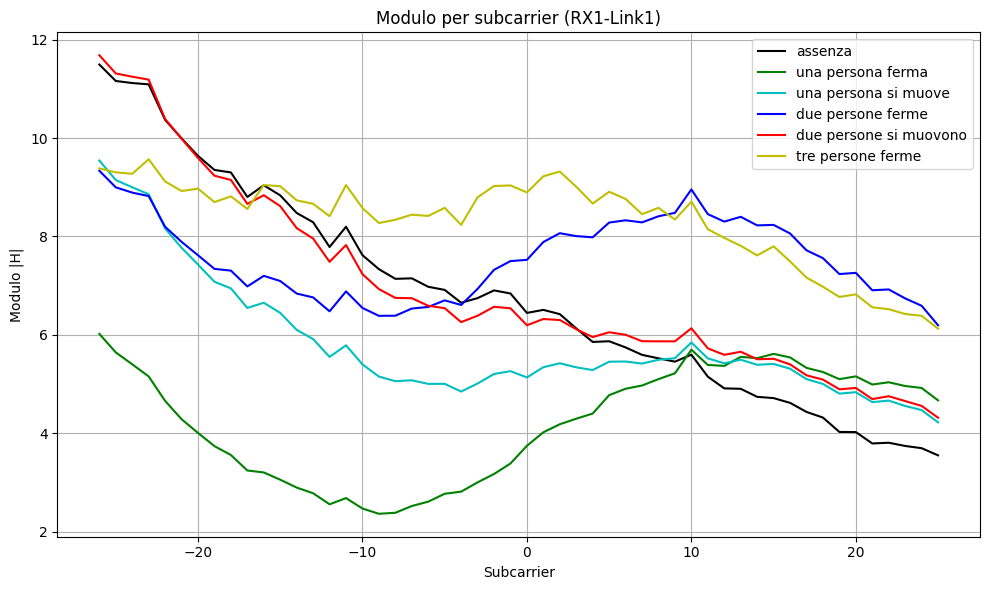

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Supponiamo che tu abbia un singolo canale (es. RX1-Link1) per ognuno degli scenari:
assenza = np.mean(np.concatenate(bundles_assenza_lltf_rx1_link1, axis=0), axis=0)
unapersonaferma = np.mean(np.concatenate(bundles_una_ferma_lltf_rx1_link1, axis=0), axis=0)
unapersonachesimuove = np.mean(np.concatenate(bundles_una_movimento_lltf_rx1_link1, axis=0), axis=0)
duepersoneferme = np.mean(np.concatenate(bundles_due_ferme_lltf_rx1_link1, axis=0), axis=0)
duepersonesimuovono = np.mean(np.concatenate(bundles_due_movimento_lltf_rx1_link1, axis=0), axis=0)
trepersoneferme = np.mean(np.concatenate(bundles_tre_ferme_lltf_rx1_link1, axis=0), axis=0)

# (puoi togliere o aggiungere scenari in base ai tuoi dati reali)

subcarriers = np.arange(-26, 26)  # oppure np.arange(52) se non vuoi simmetria

plt.figure(figsize=(10, 6))

plt.plot(subcarriers, assenza, 'k-', label='assenza')
plt.plot(subcarriers, unapersonaferma, 'g-', label='una persona ferma')
plt.plot(subcarriers, unapersonachesimuove, 'c-', label='una persona si muove')
plt.plot(subcarriers, duepersoneferme, 'b-', label='due persone ferme')
plt.plot(subcarriers, duepersonesimuovono, 'r-', label='due persone si muovono')
plt.plot(subcarriers, trepersoneferme, 'y-', label='tre persone ferme')

plt.title("Modulo per subcarrier (RX1-Link1)")
plt.xlabel("Subcarrier")
plt.ylabel("Modulo |H|")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Hampel


In [51]:
def apply_hampel_to_bundle(bundle, window_size=5, n_sigma=3.0):
    # bundle shape: (n_packets, n_subcarriers)
    n_packets, n_subcarriers = bundle.shape
    filtered = np.zeros_like(bundle)
    for i in range(n_subcarriers):
        res = hampel(bundle[:, i], window_size=window_size, n_sigma=n_sigma)
        filtered[:, i] = res.filtered_data
    return filtered

In [52]:
Hampel_assenza_htltf_rx1_link1 = [apply_hampel_to_bundle(b) for b in bundles_assenza_htltf_rx1_link1]
Hampel_assenza_htltf_rx1_link2 = [apply_hampel_to_bundle(b) for b in bundles_assenza_htltf_rx1_link2]
Hampel_assenza_htltf_rx2_link1 = [apply_hampel_to_bundle(b) for b in bundles_assenza_htltf_rx2_link1]
Hampel_assenza_htltf_rx2_link2 = [apply_hampel_to_bundle(b) for b in bundles_assenza_htltf_rx2_link2]

Hampel_due_movimento_htltf_rx1_link1 = [apply_hampel_to_bundle(b) for b in bundles_due_movimento_htltf_rx1_link1]
Hampel_due_movimento_htltf_rx1_link2 = [apply_hampel_to_bundle(b) for b in bundles_due_movimento_htltf_rx1_link2]
Hampel_due_movimento_htltf_rx2_link1 = [apply_hampel_to_bundle(b) for b in bundles_due_movimento_htltf_rx2_link1]
Hampel_due_movimento_htltf_rx2_link2 = [apply_hampel_to_bundle(b) for b in bundles_due_movimento_htltf_rx2_link2]

Hampel_due_ferme_htltf_rx1_link1 = [apply_hampel_to_bundle(b) for b in bundles_due_ferme_htltf_rx1_link1]
Hampel_due_ferme_htltf_rx1_link2 = [apply_hampel_to_bundle(b) for b in bundles_due_ferme_htltf_rx1_link2]
Hampel_due_ferme_htltf_rx2_link1 = [apply_hampel_to_bundle(b) for b in bundles_due_ferme_htltf_rx2_link1]
Hampel_due_ferme_htltf_rx2_link2 = [apply_hampel_to_bundle(b) for b in bundles_due_ferme_htltf_rx2_link2]

Hampel_una_movimento_htltf_rx1_link1 = [apply_hampel_to_bundle(b) for b in bundles_una_movimento_htltf_rx1_link1]
Hampel_una_movimento_htltf_rx1_link2 = [apply_hampel_to_bundle(b) for b in bundles_una_movimento_htltf_rx1_link2]
Hampel_una_movimento_htltf_rx2_link1 = [apply_hampel_to_bundle(b) for b in bundles_una_movimento_htltf_rx2_link1]
Hampel_una_movimento_htltf_rx2_link2 = [apply_hampel_to_bundle(b) for b in bundles_una_movimento_htltf_rx2_link2]

Hampel_una_ferma_htltf_rx1_link1 = [apply_hampel_to_bundle(b) for b in bundles_una_ferma_htltf_rx1_link1]
Hampel_una_ferma_htltf_rx1_link2 = [apply_hampel_to_bundle(b) for b in bundles_una_ferma_htltf_rx1_link2]
Hampel_una_ferma_htltf_rx2_link1 = [apply_hampel_to_bundle(b) for b in bundles_una_ferma_htltf_rx2_link1]
Hampel_una_ferma_htltf_rx2_link2 = [apply_hampel_to_bundle(b) for b in bundles_una_ferma_htltf_rx2_link2]

Hampel_tre_ferme_htltf_rx1_link1 = [apply_hampel_to_bundle(b) for b in bundles_tre_ferme_htltf_rx1_link1]
Hampel_tre_ferme_htltf_rx1_link2 = [apply_hampel_to_bundle(b) for b in bundles_tre_ferme_htltf_rx1_link2]
Hampel_tre_ferme_htltf_rx2_link1 = [apply_hampel_to_bundle(b) for b in bundles_tre_ferme_htltf_rx2_link1]
Hampel_tre_ferme_htltf_rx2_link2 = [apply_hampel_to_bundle(b) for b in bundles_tre_ferme_htltf_rx2_link2]


In [53]:
Hampel_assenza_lltf_rx1_link1 = [apply_hampel_to_bundle(b) for b in bundles_assenza_lltf_rx1_link1]
Hampel_assenza_lltf_rx1_link2 = [apply_hampel_to_bundle(b) for b in bundles_assenza_lltf_rx1_link2]
Hampel_assenza_lltf_rx2_link1 = [apply_hampel_to_bundle(b) for b in bundles_assenza_lltf_rx2_link1]
Hampel_assenza_lltf_rx2_link2 = [apply_hampel_to_bundle(b) for b in bundles_assenza_lltf_rx2_link2]

Hampel_due_movimento_lltf_rx1_link1 = [apply_hampel_to_bundle(b) for b in bundles_due_movimento_lltf_rx1_link1]
Hampel_due_movimento_lltf_rx1_link2 = [apply_hampel_to_bundle(b) for b in bundles_due_movimento_lltf_rx1_link2]
Hampel_due_movimento_lltf_rx2_link1 = [apply_hampel_to_bundle(b) for b in bundles_due_movimento_lltf_rx2_link1]
Hampel_due_movimento_lltf_rx2_link2 = [apply_hampel_to_bundle(b) for b in bundles_due_movimento_lltf_rx2_link2]

Hampel_due_ferme_lltf_rx1_link1 = [apply_hampel_to_bundle(b) for b in bundles_due_ferme_lltf_rx1_link1]
Hampel_due_ferme_lltf_rx1_link2 = [apply_hampel_to_bundle(b) for b in bundles_due_ferme_lltf_rx1_link2]
Hampel_due_ferme_lltf_rx2_link1 = [apply_hampel_to_bundle(b) for b in bundles_due_ferme_lltf_rx2_link1]
Hampel_due_ferme_lltf_rx2_link2 = [apply_hampel_to_bundle(b) for b in bundles_due_ferme_lltf_rx2_link2]

Hampel_una_movimento_lltf_rx1_link1 = [apply_hampel_to_bundle(b) for b in bundles_una_movimento_lltf_rx1_link1]
Hampel_una_movimento_lltf_rx1_link2 = [apply_hampel_to_bundle(b) for b in bundles_una_movimento_lltf_rx1_link2]
Hampel_una_movimento_lltf_rx2_link1 = [apply_hampel_to_bundle(b) for b in bundles_una_movimento_lltf_rx2_link1]
Hampel_una_movimento_lltf_rx2_link2 = [apply_hampel_to_bundle(b) for b in bundles_una_movimento_lltf_rx2_link2]

Hampel_una_ferma_lltf_rx1_link1 = [apply_hampel_to_bundle(b) for b in bundles_una_ferma_lltf_rx1_link1]
Hampel_una_ferma_lltf_rx1_link2 = [apply_hampel_to_bundle(b) for b in bundles_una_ferma_lltf_rx1_link2]
Hampel_una_ferma_lltf_rx2_link1 = [apply_hampel_to_bundle(b) for b in bundles_una_ferma_lltf_rx2_link1]
Hampel_una_ferma_lltf_rx2_link2 = [apply_hampel_to_bundle(b) for b in bundles_una_ferma_lltf_rx2_link2]

Hampel_tre_ferme_lltf_rx1_link1 = [apply_hampel_to_bundle(b) for b in bundles_tre_ferme_lltf_rx1_link1]
Hampel_tre_ferme_lltf_rx1_link2 = [apply_hampel_to_bundle(b) for b in bundles_tre_ferme_lltf_rx1_link2]
Hampel_tre_ferme_lltf_rx2_link1 = [apply_hampel_to_bundle(b) for b in bundles_tre_ferme_lltf_rx2_link1]
Hampel_tre_ferme_lltf_rx2_link2 = [apply_hampel_to_bundle(b) for b in bundles_tre_ferme_lltf_rx2_link2]


In [54]:
def plot_csi_bundles_comparison_3d(bundle_raw, bundle_filtered, 
                                   title_raw="Raw CSI Bundle", 
                                   title_filtered="Filtered CSI Bundle",
                                   elev=30, azim=-60, cmap='viridis'):
    """
    Plotta a confronto due bundle CSI (raw e filtrato) in 3D affiancati.
    Ogni bundle: array shape (n_packets, n_subcarriers)
    """
    fig = plt.figure(figsize=(16, 6))
    
    # Primo subplot: raw
    ax1 = fig.add_subplot(121, projection='3d')
    X1, Y1 = np.meshgrid(np.arange(bundle_raw.shape[1]), np.arange(bundle_raw.shape[0]))
    surf1 = ax1.plot_surface(X1, Y1, bundle_raw, cmap=cmap, linewidth=0, antialiased=True)
    ax1.set_title(title_raw)
    ax1.set_xlabel('Subcarrier')
    ax1.set_ylabel('Packet')
    ax1.set_zlabel('|CSI| Amplitude')
    ax1.view_init(elev=elev, azim=azim)
    fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=10)

    # Secondo subplot: filtered
    ax2 = fig.add_subplot(122, projection='3d')
    X2, Y2 = np.meshgrid(np.arange(bundle_filtered.shape[1]), np.arange(bundle_filtered.shape[0]))
    surf2 = ax2.plot_surface(X2, Y2, bundle_filtered, cmap=cmap, linewidth=0, antialiased=True)
    ax2.set_title(title_filtered)
    ax2.set_xlabel('Subcarrier')
    ax2.set_ylabel('Packet')
    ax2.set_zlabel('|CSI| Amplitude')
    ax2.view_init(elev=elev, azim=azim)
    fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=10)

    plt.tight_layout()
    plt.show()

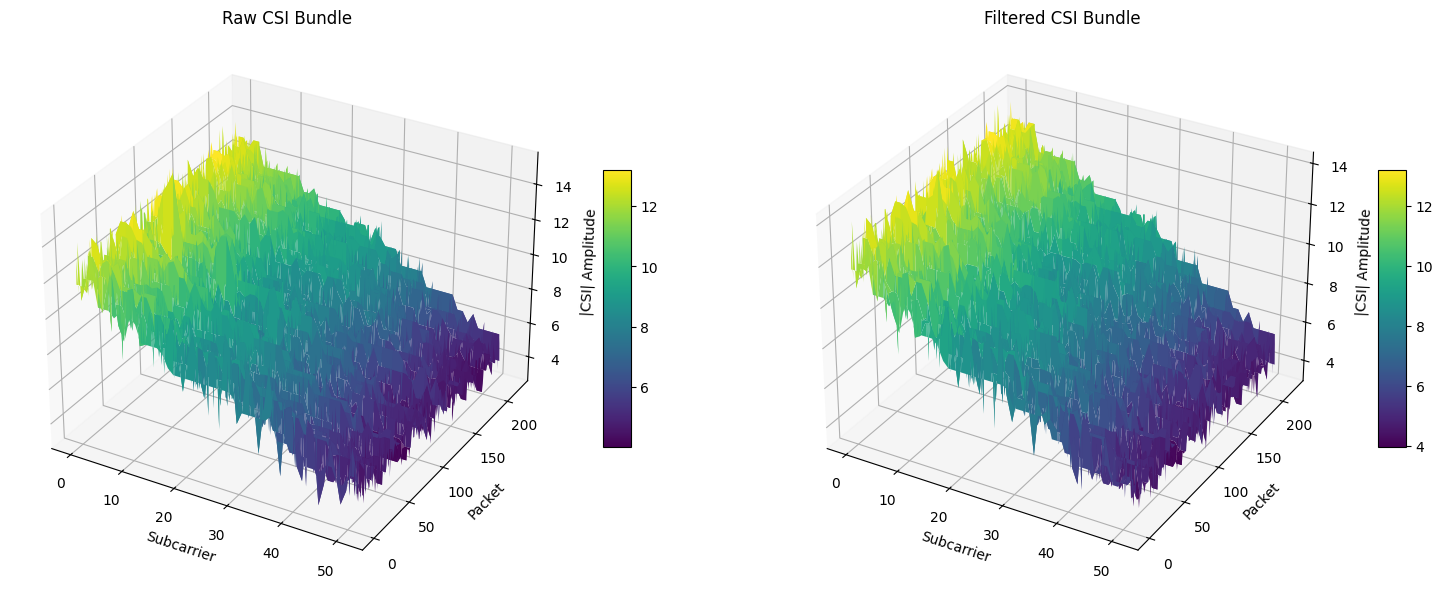

In [55]:
plot_csi_bundles_comparison_3d(bundles_tre_ferme_lltf_rx1_link1[0], Hampel_tre_ferme_lltf_rx1_link1[0])

In [56]:
def apply_savgol_to_bundle(bundle, sg_window=11, sg_order=2):
    """
    Applica il filtro Savitzky-Golay a ciascun subcarrier di un bundle.
    bundle: array (n_packets, n_subcarriers)
    """
    bundle_savgol = np.zeros_like(bundle)
    n_packets = bundle.shape[0]
    for j in range(bundle.shape[1]):
        # Assicura che window_length sia dispari e non maggiore di n_packets
        win = min(sg_window, n_packets if n_packets % 2 == 1 else n_packets-1)
        if win < sg_order+2: win = sg_order+2 | 1  # almeno ordine+2, dispari
        bundle_savgol[:, j] = savgol_filter(bundle[:, j], window_length=win, polyorder=sg_order, mode='interp')
    return bundle_savgol


In [ ]:
bundles_savgol_assenza_rx1_link1 = [apply_savgol_to_bundle(b) for b in Hampel_assenza_htltf_rx1_link1]
bundles_savgol_assenza_rx1_link2 = [apply_savgol_to_bundle(b) for b in Hampel_assenza_htltf_rx1_link2]
bundles_savgol_assenza_rx2_link1 = [apply_savgol_to_bundle(b) for b in Hampel_assenza_htltf_rx2_link1]
bundles_savgol_assenza_rx2_link2 = [apply_savgol_to_bundle(b) for b in Hampel_assenza_htltf_rx2_link2]

bundles_savgol_due_movimento_rx1_link1 = [apply_savgol_to_bundle(b) for b in Hampel_due_movimento_htltf_rx1_link1]
bundles_savgol_due_movimento_rx1_link2 = [apply_savgol_to_bundle(b) for b in Hampel_due_movimento_htltf_rx1_link2]
bundles_savgol_due_movimento_rx2_link1 = [apply_savgol_to_bundle(b) for b in Hampel_due_movimento_htltf_rx2_link1]
bundles_savgol_due_movimento_rx2_link2 = [apply_savgol_to_bundle(b) for b in Hampel_due_movimento_htltf_rx2_link2]

bundles_savgol_due_ferme_rx1_link1 = [apply_savgol_to_bundle(b) for b in Hampel_due_ferme_htltf_rx1_link1]
bundles_savgol_due_ferme_rx1_link2 = [apply_savgol_to_bundle(b) for b in Hampel_due_ferme_htltf_rx1_link2]
bundles_savgol_due_ferme_rx2_link1 = [apply_savgol_to_bundle(b) for b in Hampel_due_ferme_htltf_rx2_link1]
bundles_savgol_due_ferme_rx2_link2 = [apply_savgol_to_bundle(b) for b in Hampel_due_ferme_htltf_rx2_link2]

bundles_savgol_una_movimento_rx1_link1 = [apply_savgol_to_bundle(b) for b in Hampel_una_movimento_htltf_rx1_link1]
bundles_savgol_una_movimento_rx1_link2 = [apply_savgol_to_bundle(b) for b in Hampel_una_movimento_htltf_rx1_link2]
bundles_savgol_una_movimento_rx2_link1 = [apply_savgol_to_bundle(b) for b in Hampel_una_movimento_htltf_rx2_link1]
bundles_savgol_una_movimento_rx2_link2 = [apply_savgol_to_bundle(b) for b in Hampel_una_movimento_htltf_rx2_link2]

bundles_savgol_una_ferma_rx1_link1 = [apply_savgol_to_bundle(b) for b in Hampel_una_ferma_htltf_rx1_link1]
bundles_savgol_una_ferma_rx1_link2 = [apply_savgol_to_bundle(b) for b in Hampel_una_ferma_htltf_rx1_link2]
bundles_savgol_una_ferma_rx2_link1 = [apply_savgol_to_bundle(b) for b in Hampel_una_ferma_htltf_rx2_link1]
bundles_savgol_una_ferma_rx2_link2 = [apply_savgol_to_bundle(b) for b in Hampel_una_ferma_htltf_rx2_link2]

bundles_savgol_tre_ferme_rx1_link1 = [apply_savgol_to_bundle(b) for b in Hampel_tre_ferme_htltf_rx1_link1]
bundles_savgol_tre_ferme_rx1_link2 = [apply_savgol_to_bundle(b) for b in Hampel_tre_ferme_htltf_rx1_link2]
bundles_savgol_tre_ferme_rx2_link1 = [apply_savgol_to_bundle(b) for b in Hampel_tre_ferme_htltf_rx2_link1]
bundles_savgol_tre_ferme_rx2_link2 = [apply_savgol_to_bundle(b) for b in Hampel_tre_ferme_htltf_rx2_link2]

bundles_savgol_assenza_lltf_rx1_link1 = [apply_savgol_to_bundle(b) for b in Hampel_assenza_lltf_rx1_link1]
bundles_savgol_assenza_lltf_rx1_link2 = [apply_savgol_to_bundle(b) for b in Hampel_assenza_lltf_rx1_link2]
bundles_savgol_assenza_lltf_rx2_link1 = [apply_savgol_to_bundle(b) for b in Hampel_assenza_lltf_rx2_link1]
bundles_savgol_assenza_lltf_rx2_link2 = [apply_savgol_to_bundle(b) for b in Hampel_assenza_lltf_rx2_link2]

bundles_savgol_due_movimento_lltf_rx1_link1 = [apply_savgol_to_bundle(b) for b in Hampel_due_movimento_lltf_rx1_link1]
bundles_savgol_due_movimento_lltf_rx1_link2 = [apply_savgol_to_bundle(b) for b in Hampel_due_movimento_lltf_rx1_link2]
bundles_savgol_due_movimento_lltf_rx2_link1 =  [apply_savgol_to_bundle(b) for b in Hampel_due_movimento_lltf_rx2_link1]
bundles_savgol_due_movimento_lltf_rx2_link2 = [apply_savgol_to_bundle(b) for b in Hampel_due_movimento_lltf_rx2_link2]

bundles_savgol_due_ferme_lltf_rx1_link1 = [apply_savgol_to_bundle(b) for b in Hampel_due_ferme_lltf_rx1_link1]
bundles_savgol_due_ferme_lltf_rx1_link2 = [apply_savgol_to_bundle(b) for b in Hampel_due_ferme_lltf_rx1_link2]
bundles_savgol_due_ferme_lltf_rx2_link1 = [apply_savgol_to_bundle(b) for b in Hampel_due_ferme_lltf_rx2_link1]
bundles_savgol_due_ferme_lltf_rx2_link2 = [apply_savgol_to_bundle(b) for b in Hampel_due_ferme_lltf_rx2_link2]

bundles_savgol_una_movimento_lltf_rx1_link1 = [apply_savgol_to_bundle(b) for b in Hampel_una_movimento_lltf_rx1_link1]
bundles_savgol_una_movimento_lltf_rx1_link2 = [apply_savgol_to_bundle(b) for b in Hampel_una_movimento_lltf_rx1_link2]
bundles_savgol_una_movimento_lltf_rx2_link1 = [apply_savgol_to_bundle(b) for b in Hampel_una_movimento_lltf_rx2_link1]
bundles_savgol_una_movimento_lltf_rx2_link2 = [apply_savgol_to_bundle(b) for b in Hampel_una_movimento_lltf_rx2_link2]

bundles_savgol_una_ferma_lltf_rx1_link1 = [apply_savgol_to_bundle(b) for b in Hampel_una_ferma_lltf_rx1_link1]
bundles_savgol_una_ferma_lltf_rx1_link2 = [apply_savgol_to_bundle(b) for b in Hampel_una_ferma_lltf_rx1_link2]
bundles_savgol_una_ferma_lltf_rx2_link1 = [apply_savgol_to_bundle(b) for b in Hampel_una_ferma_lltf_rx2_link1]
bundles_savgol_una_ferma_lltf_rx2_link2 = [apply_savgol_to_bundle(b) for b in Hampel_una_ferma_lltf_rx2_link2]

bundles_savgol_tre_ferme_lltf_rx1_link1 = [apply_savgol_to_bundle(b) for b in Hampel_tre_ferme_lltf_rx1_link1]
bundles_savgol_tre_ferme_lltf_rx1_link2 = [apply_savgol_to_bundle(b) for b in Hampel_tre_ferme_lltf_rx1_link2]
bundles_savgol_tre_ferme_lltf_rx2_link1 = [apply_savgol_to_bundle(b) for b in Hampel_tre_ferme_lltf_rx2_link1]
bundles_savgol_tre_ferme_lltf_rx2_link2 = [apply_savgol_to_bundle(b) for b in Hampel_tre_ferme_lltf_rx2_link2]

In [61]:
def plot_all_csi_bundles_comparison_3d_triple(
        bundles_raw, bundles_hampel, bundles_savgol, 
        elev=30, azim=-60, cmap='viridis', 
        max_to_plot=5):
    """
    Visualizza affiancati tutti i bundle raw, hampel e hampel+savgol (fino a max_to_plot).
    Ogni bundle: array shape (n_packets, n_subcarriers)
    """
    n = min(len(bundles_raw), len(bundles_hampel), len(bundles_savgol), max_to_plot)
    fig = plt.figure(figsize=(18, 4 * n))
    for i in range(n):
        # RAW
        ax1 = fig.add_subplot(n, 3, 3*i+1, projection='3d')
        X1, Y1 = np.meshgrid(np.arange(bundles_raw[i].shape[1]), np.arange(bundles_raw[i].shape[0]))
        ax1.plot_surface(X1, Y1, bundles_raw[i], cmap=cmap, linewidth=0, antialiased=True)
        ax1.set_title(f'Raw Bundle {i}')
        ax1.set_xlabel('Subcarrier')
        ax1.set_ylabel('Packet')
        ax1.set_zlabel('|CSI|')
        ax1.view_init(elev=elev, azim=azim)

        # HAMPEL
        ax2 = fig.add_subplot(n, 3, 3*i+2, projection='3d')
        X2, Y2 = np.meshgrid(np.arange(bundles_hampel[i].shape[1]), np.arange(bundles_hampel[i].shape[0]))
        ax2.plot_surface(X2, Y2, bundles_hampel[i], cmap=cmap, linewidth=0, antialiased=True)
        ax2.set_title(f'Hampel Bundle {i}')
        ax2.set_xlabel('Subcarrier')
        ax2.set_ylabel('Packet')
        ax2.set_zlabel('|CSI|')
        ax2.view_init(elev=elev, azim=azim)

        # HAMPEL + SAVITZKY-GOLAY
        ax3 = fig.add_subplot(n, 3, 3*i+3, projection='3d')
        X3, Y3 = np.meshgrid(np.arange(bundles_savgol[i].shape[1]), np.arange(bundles_savgol[i].shape[0]))
        ax3.plot_surface(X3, Y3, bundles_savgol[i], cmap=cmap, linewidth=0, antialiased=True)
        ax3.set_title(f'Hampel + SavGol Bundle {i}')
        ax3.set_xlabel('Subcarrier')
        ax3.set_ylabel('Packet')
        ax3.set_zlabel('|CSI|')
        ax3.view_init(elev=elev, azim=azim)

    plt.tight_layout()
    plt.show()

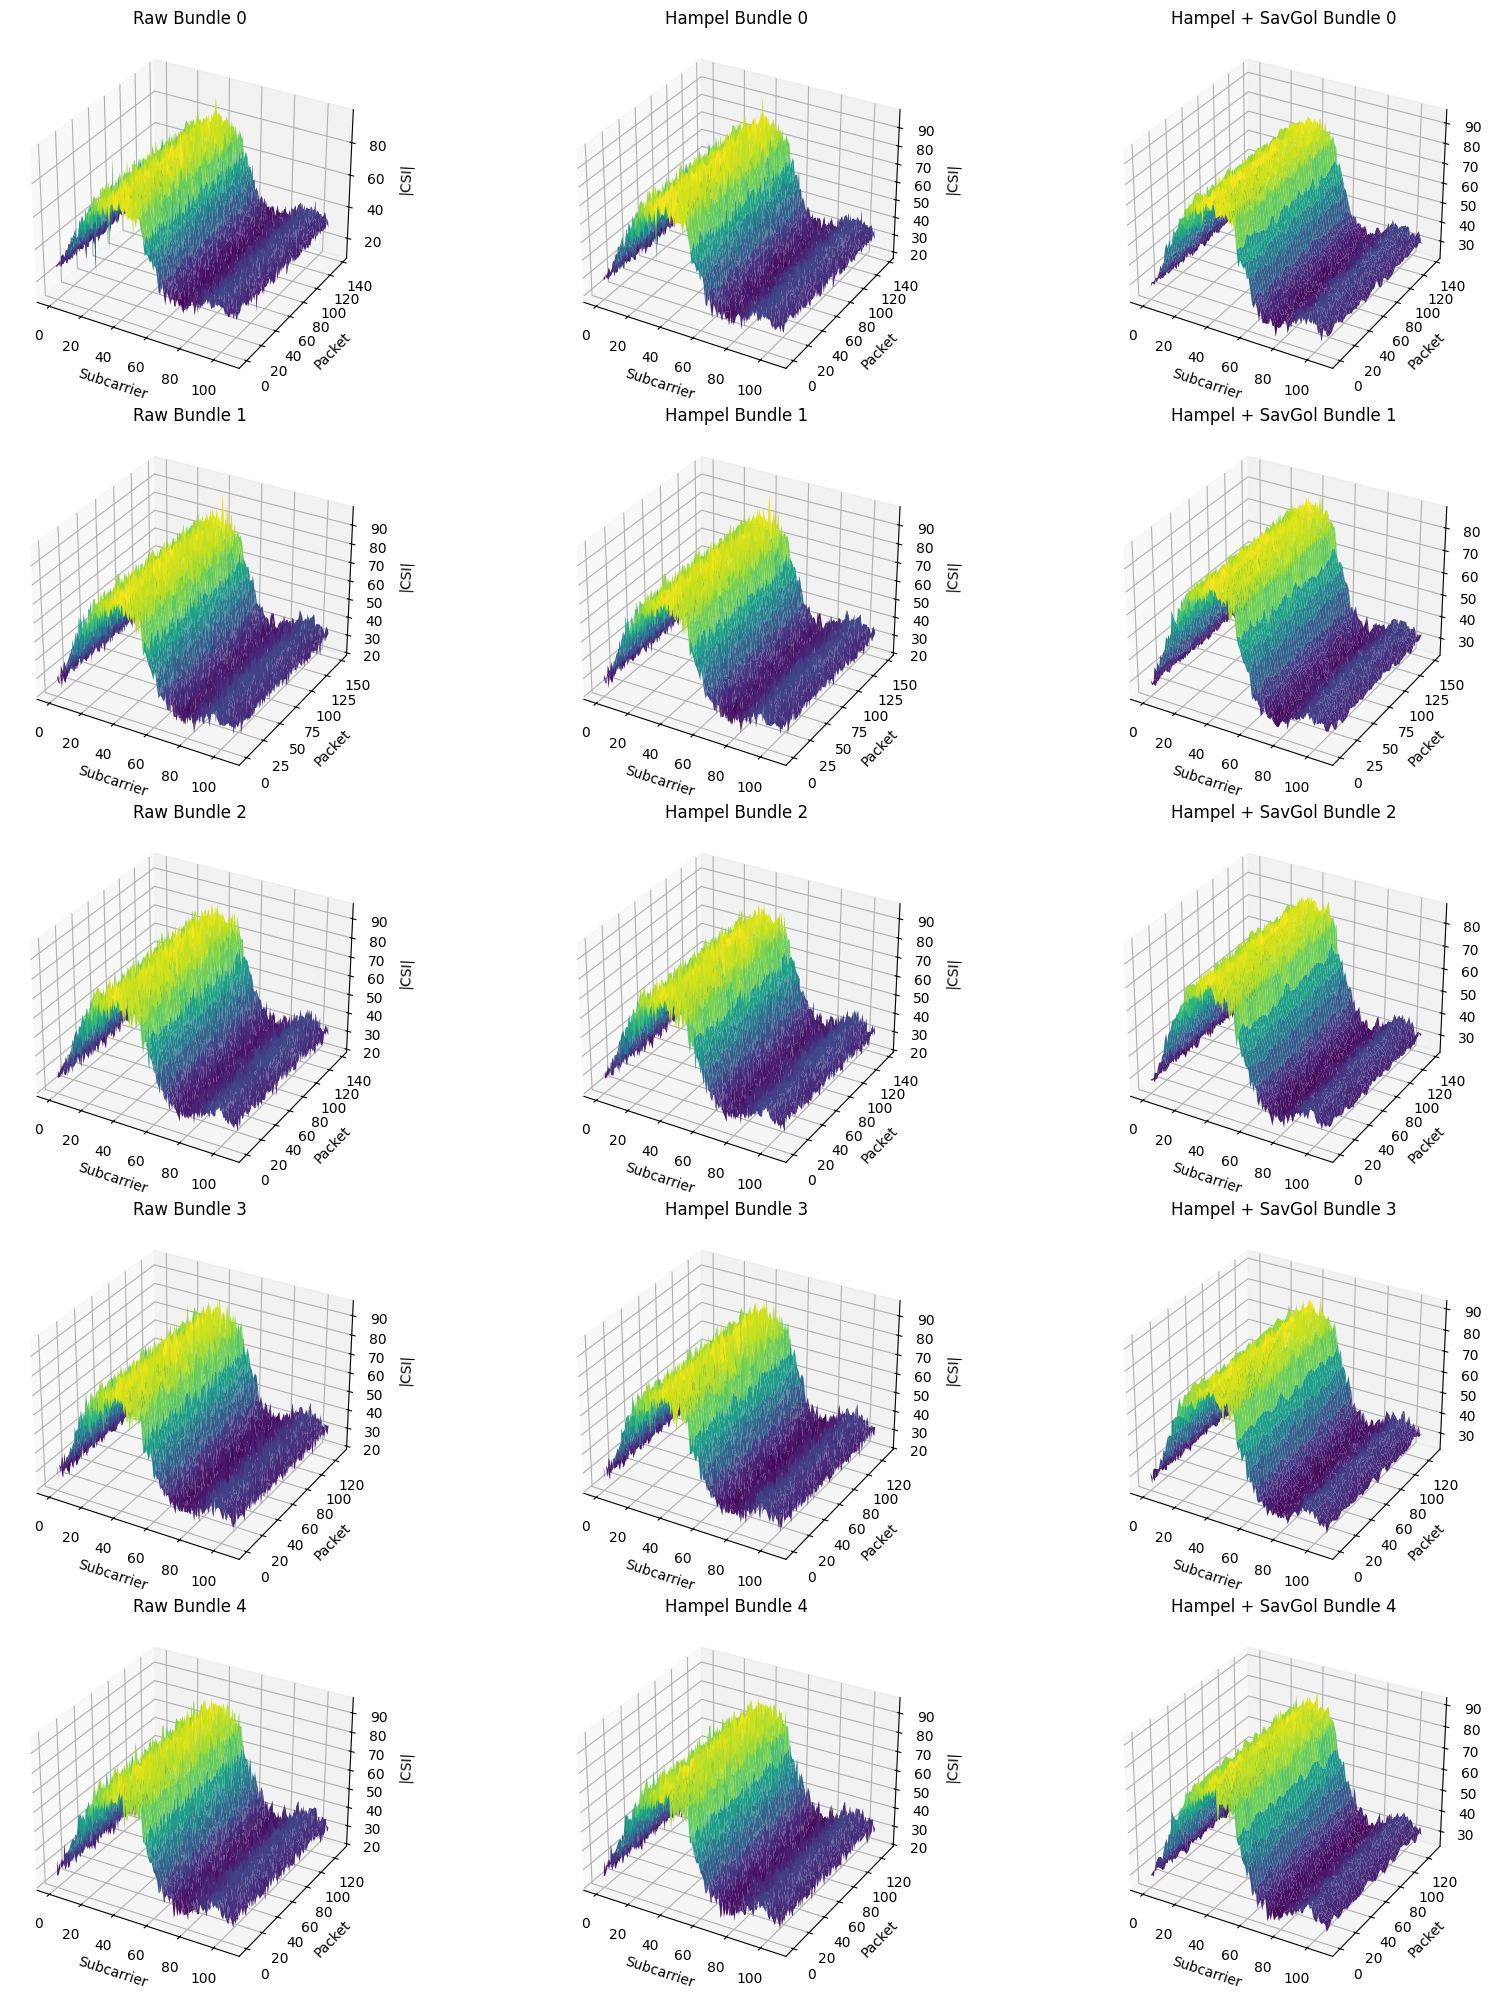

In [63]:
plot_all_csi_bundles_comparison_3d_triple(
    bundles_assenza_htltf_rx1_link2,
    Hampel_assenza_htltf_rx1_link2,
    bundles_savgol_assenza_rx1_link2
)

In [64]:
def plot_all_csi_bundles_comparison_2d(
        bundles_raw, bundles_hampel, bundles_savgol, 
        subcarrier=0, max_to_plot=5):
    """
    Visualizza in 2D (lineplot) le tracce temporali di un subcarrier per raw, hampel, hampel+savgol.
    Ogni plot: asse x = pacchetto, asse y = |CSI|
    """
    n = min(len(bundles_raw), len(bundles_hampel), len(bundles_savgol), max_to_plot)
    plt.figure(figsize=(10, 3 * n))
    for i in range(n):
        plt.subplot(n, 1, i+1)
        plt.plot(bundles_raw[i][:, subcarrier], label='Raw', color='C0', alpha=0.7)
        plt.plot(bundles_hampel[i][:, subcarrier], label='Hampel', color='C1', alpha=0.7)
        plt.plot(bundles_savgol[i][:, subcarrier], label='Hampel + SavGol', color='C2', alpha=0.7)
        plt.title(f'Bundle {i} - Subcarrier {subcarrier}')
        plt.xlabel('Packet Index')
        plt.ylabel('|CSI|')
        plt.legend()
        plt.tight_layout()
    plt.show()


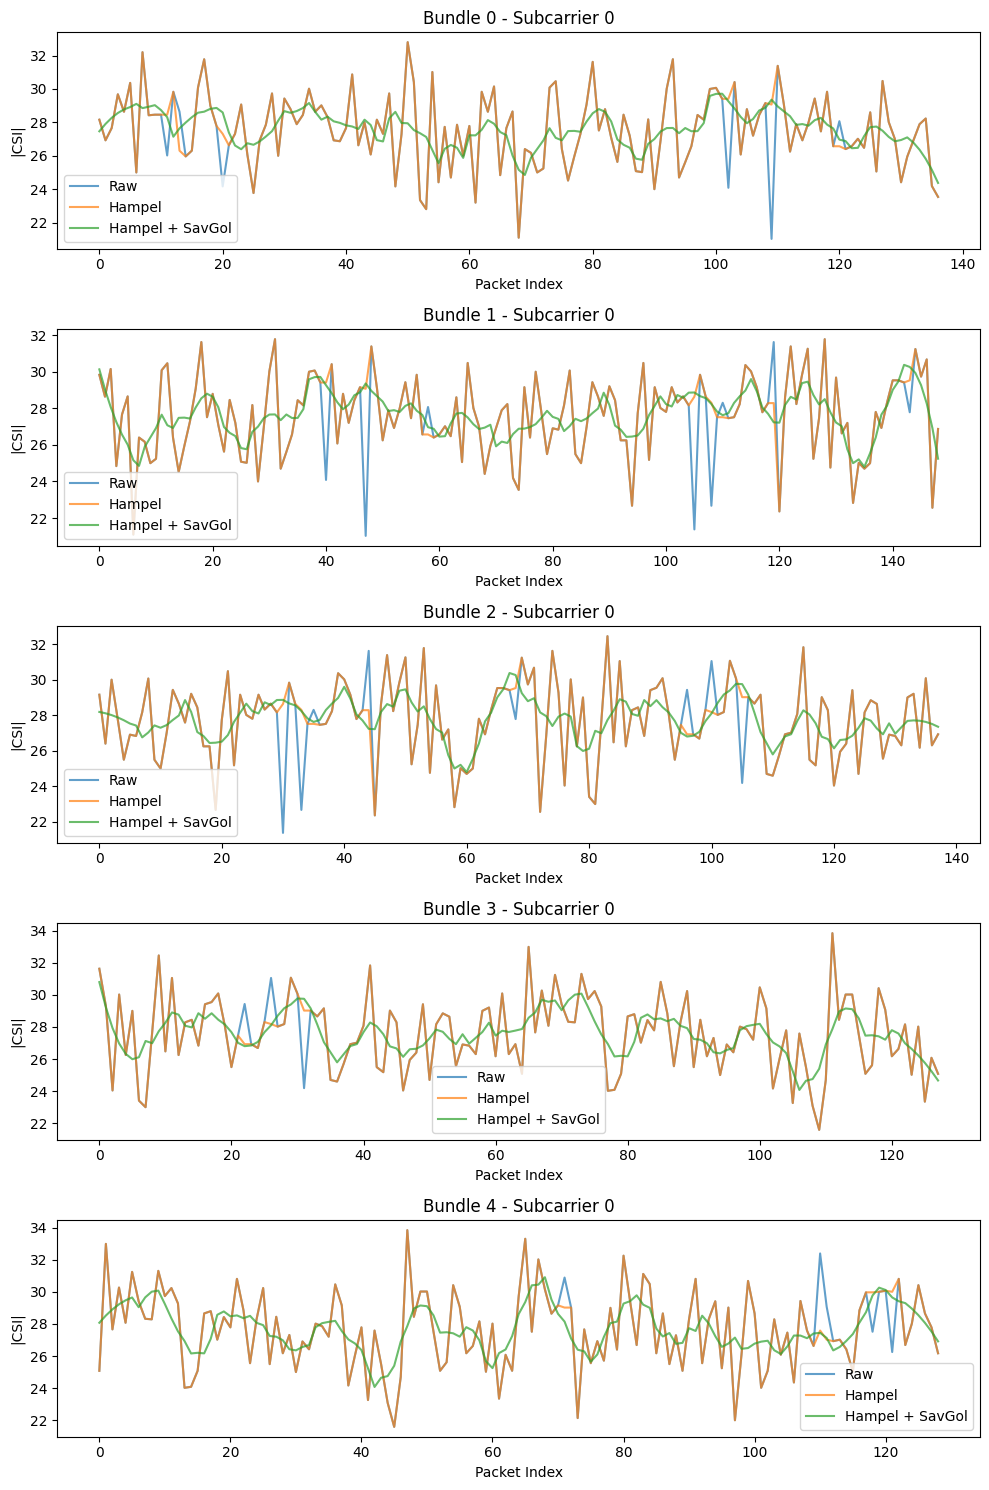

In [65]:
plot_all_csi_bundles_comparison_2d(
    bundles_assenza_htltf_rx1_link2,
    Hampel_assenza_htltf_rx1_link2,
    bundles_savgol_assenza_rx1_link2,subcarrier=0, max_to_plot=5
)

## Feature extraction

In [66]:
def extract_features_per_subcarrier(csi_matrix):
    """
    csi_matrix: array (N_win, N_subcarriers)
    Output: dict con feature vettoriali (shape (N_win, N_subcarriers))
    """
    feats = {}
    
    feats["std"] = np.std(csi_matrix, axis=0)   # per subcarrier
    feats["min"] = np.min(csi_matrix, axis=0)
    feats["max"] = np.max(csi_matrix, axis=0)
    feats["avg"] = np.mean(csi_matrix, axis=0)
    feats["qtl"] = np.percentile(csi_matrix, 25, axis=0)
    feats["qtu"] = np.percentile(csi_matrix, 75, axis=0)
    feats["iqr"] = feats["qtu"] - feats["qtl"]
    
    return feats


In [67]:
def extract_adj_feature_all_windows(csi_windows, N=2):
    """
    Calcola la feature 'adj' per ciascuna finestra CSI (come nel paper Wi-CaL).
    
    Parametri
    ----------
    csi_windows : list of np.ndarray
        Ogni elemento è una matrice (N_pkt, N_subcarriers)
    N : int
        Numero di sottocarrier adiacenti da considerare su ciascun lato

    Ritorna
    -------
    adj_all : list of np.ndarray
        Lista di vettori (uno per finestra), ciascuno lungo (N_subcarriers - 2*N)
    """
    adj_all = []
    for w, csi_matrix in enumerate(csi_windows):
        n_pkt, n_subc = csi_matrix.shape
        adj_values = []

        for j in range(N, n_subc - N):  # evitiamo i bordi
            xi_j = np.zeros(n_pkt)
            for n in range(1, N + 1):
                xi_j += np.abs(csi_matrix[:, j] - csi_matrix[:, j - n])
                xi_j += np.abs(csi_matrix[:, j] - csi_matrix[:, j + n])
            mu_j = np.mean(xi_j)
            adj_values.append(mu_j)

        adj_all.append(np.array(adj_values))
    return adj_all


In [68]:
def extract_euc_feature_all_windows(csi_windows):
    """
    Calcola la feature 'euc' (Euclidean distance tra pacchetti consecutivi)
    per ciascuna finestra CSI, come da paper Wi-CaL.

    Parametri
    ----------
    csi_windows : list of np.ndarray
        Ogni elemento è una matrice (N_pkt, N_subcarriers)

    Ritorna
    -------
    euc_all : list of float
        Lista di valori 'euc', uno per finestra
    """
    euc_all = []

    for w, csi_matrix in enumerate(csi_windows):
        if csi_matrix.shape[0] < 2:
            euc_all.append(np.nan)  # finestra troppo corta, eviti errore
            continue

        # Differenze tra pacchetti consecutivi
        diffs = np.diff(csi_matrix, axis=0)            # shape (N_pkt-1, N_subcarriers)
        norms = np.linalg.norm(diffs, axis=1)          # distanza euclidea per ogni coppia
        euc_val = np.median(norms)                     # mediana come nel paper

        euc_all.append(euc_val)

    return np.array(euc_all)


In [80]:
#caloclo la feature adj per ogni condizione e per ogni ricevitore_htltf
adj_assenza_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_savgol_assenza_rx1_link1, N=2)
df_adj_assenza_htltf_rx1_link1 = pd.DataFrame(adj_assenza_htltf_rx1_link1)
assenza_adj_htltf_rx1_link1 = df_adj_assenza_htltf_rx1_link1.values.tolist()

adj_assenza_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_savgol_assenza_rx2_link1, N=2)
df_adj_assenza_htltf_rx2_link1 = pd.DataFrame(adj_assenza_htltf_rx2_link1)
assenza_adj_htltf_rx2_link1 = df_adj_assenza_htltf_rx2_link1.values.tolist()

adj_assenza_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_savgol_assenza_rx1_link2, N=2)
df_adj_assenza_htltf_rx1_link2 = pd.DataFrame(adj_assenza_htltf_rx1_link2)
assenza_adj_htltf_rx1_link2 = df_adj_assenza_htltf_rx1_link2.values.tolist()

adj_assenza_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_savgol_assenza_rx2_link2, N=2)
df_adj_assenza_htltf_rx2_link2 = pd.DataFrame(adj_assenza_htltf_rx2_link2)
assenza_adj_htltf_rx2_link2 = df_adj_assenza_htltf_rx2_link2.values.tolist()

adj_una_ferma_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_savgol_una_ferma_rx1_link1, N=2)
df_adj_una_ferma_htltf_rx1_link1 = pd.DataFrame(adj_una_ferma_htltf_rx1_link1)
una_ferma_adj_htltf_rx1_link1 = df_adj_una_ferma_htltf_rx1_link1.values.tolist()

adj_una_ferma_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_savgol_una_ferma_rx2_link1, N=2)
df_adj_una_ferma_htltf_rx2_link1 = pd.DataFrame(adj_una_ferma_htltf_rx2_link1)
una_ferma_adj_htltf_rx2_link1 = df_adj_una_ferma_htltf_rx2_link1.values.tolist()

adj_una_ferma_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_savgol_una_ferma_rx1_link2, N=2)
df_adj_una_ferma_htltf_rx1_link2 = pd.DataFrame(adj_una_ferma_htltf_rx1_link2)
una_ferma_adj_htltf_rx1_link2 = df_adj_una_ferma_htltf_rx1_link2.values.tolist()

adj_una_ferma_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_savgol_una_ferma_rx2_link2, N=2)
df_adj_una_ferma_htltf_rx2_link2 = pd.DataFrame(adj_una_ferma_htltf_rx2_link2)
una_ferma_adj_htltf_rx2_link2 = df_adj_una_ferma_htltf_rx2_link2.values.tolist()

adj_una_movimento_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_savgol_una_movimento_rx1_link1, N=2)
df_adj_una_movimento_htltf_rx1_link1 = pd.DataFrame(adj_una_movimento_htltf_rx1_link1)
una_movimento_adj_htltf_rx1_link1 = df_adj_una_movimento_htltf_rx1_link1.values.tolist()

adj_una_movimento_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_savgol_una_movimento_rx2_link1, N=2)
df_adj_una_movimento_htltf_rx2_link1 = pd.DataFrame(adj_una_movimento_htltf_rx2_link1)
una_movimento_adj_htltf_rx2_link1 = df_adj_una_movimento_htltf_rx2_link1.values.tolist()

adj_una_movimento_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_savgol_una_movimento_rx1_link2, N=2)
df_adj_una_movimento_htltf_rx1_link2 = pd.DataFrame(adj_una_movimento_htltf_rx1_link2)
una_movimento_adj_htltf_rx1_link2 = df_adj_una_movimento_htltf_rx1_link2.values.tolist()

adj_una_movimento_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_savgol_una_movimento_rx2_link2, N=2)
df_adj_una_movimento_htltf_rx2_link2 = pd.DataFrame(adj_una_movimento_htltf_rx2_link2)
una_movimento_adj_htltf_rx2_link2 = df_adj_una_movimento_htltf_rx2_link2.values.tolist()

adj_due_ferme_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_savgol_due_ferme_rx1_link1, N=2)
df_adj_due_ferme_htltf_rx1_link1 = pd.DataFrame(adj_due_ferme_htltf_rx1_link1)
due_ferme_adj_htltf_rx1_link1 = df_adj_due_ferme_htltf_rx1_link1.values.tolist()

adj_due_ferme_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_savgol_due_ferme_rx2_link1, N=2)
df_adj_due_ferme_htltf_rx2_link1 = pd.DataFrame(adj_due_ferme_htltf_rx2_link1)
due_ferme_adj_htltf_rx2_link1 = df_adj_due_ferme_htltf_rx2_link1.values.tolist()

adj_due_ferme_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_savgol_due_ferme_rx1_link2, N=2)
df_adj_due_ferme_htltf_rx1_link2 = pd.DataFrame(adj_due_ferme_htltf_rx1_link2)
due_ferme_adj_htltf_rx1_link2 = df_adj_due_ferme_htltf_rx1_link2.values.tolist()

adj_due_ferme_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_savgol_due_ferme_rx2_link2, N=2)
df_adj_due_ferme_htltf_rx2_link2 = pd.DataFrame(adj_due_ferme_htltf_rx2_link2)
due_ferme_adj_htltf_rx2_link2 = df_adj_due_ferme_htltf_rx2_link2.values.tolist()

adj_due_movimento_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_savgol_due_movimento_rx1_link1, N=2)
df_adj_due_movimento_htltf_rx1_link1 = pd.DataFrame(adj_due_movimento_htltf_rx1_link1)
due_movimento_adj_htltf_rx1_link1 = df_adj_due_movimento_htltf_rx1_link1.values.tolist()

adj_due_movimento_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_savgol_due_movimento_rx2_link1, N=2)
df_adj_due_movimento_htltf_rx2_link1 = pd.DataFrame(adj_due_movimento_htltf_rx2_link1)
due_movimento_adj_htltf_rx2_link1 = df_adj_due_movimento_htltf_rx2_link1.values.tolist()

adj_due_movimento_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_savgol_due_movimento_rx1_link2, N=2)
df_adj_due_movimento_htltf_rx1_link2 = pd.DataFrame(adj_due_movimento_htltf_rx1_link2)
due_movimento_adj_htltf_rx1_link2 = df_adj_due_movimento_htltf_rx1_link2.values.tolist()

adj_due_movimento_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_savgol_due_movimento_rx2_link2, N=2)
df_adj_due_movimento_htltf_rx2_link2 = pd.DataFrame(adj_due_movimento_htltf_rx2_link2)
due_movimento_adj_htltf_rx2_link2 = df_adj_due_movimento_htltf_rx2_link2.values.tolist()

adj_tre_ferme_htltf_rx1_link1 = extract_adj_feature_all_windows(bundles_savgol_tre_ferme_rx1_link1, N=2)
df_adj_tre_ferme_htltf_rx1_link1 = pd.DataFrame(adj_tre_ferme_htltf_rx1_link1)
tre_ferme_adj_htltf_rx1_link1 = df_adj_tre_ferme_htltf_rx1_link1.values.tolist()

adj_tre_ferme_htltf_rx2_link1 = extract_adj_feature_all_windows(bundles_savgol_tre_ferme_rx2_link1, N=2)
df_adj_tre_ferme_htltf_rx2_link1 = pd.DataFrame(adj_tre_ferme_htltf_rx2_link1)
tre_ferme_adj_htltf_rx2_link1 = df_adj_tre_ferme_htltf_rx2_link1.values.tolist()

adj_tre_ferme_htltf_rx1_link2 = extract_adj_feature_all_windows(bundles_savgol_tre_ferme_rx1_link2, N=2)
df_adj_tre_ferme_htltf_rx1_link2 = pd.DataFrame(adj_tre_ferme_htltf_rx1_link2)
tre_ferme_adj_htltf_rx1_link2 = df_adj_tre_ferme_htltf_rx1_link2.values.tolist()

adj_tre_ferme_htltf_rx2_link2 = extract_adj_feature_all_windows(bundles_savgol_tre_ferme_rx2_link2, N=2)
df_adj_tre_ferme_htltf_rx2_link2 = pd.DataFrame(adj_tre_ferme_htltf_rx2_link2)
tre_ferme_adj_htltf_rx2_link2 = df_adj_tre_ferme_htltf_rx2_link2.values.tolist()


In [81]:
#caloclo la feature adj per ogni condizione e per ogni ricevitore_lltf
adj_assenza_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_savgol_assenza_lltf_rx1_link1, N=2)
df_adj_assenza_lltf_rx1_link1 = pd.DataFrame(adj_assenza_lltf_rx1_link1)
assenza_adj_lltf_rx1_link1 = df_adj_assenza_lltf_rx1_link1.values.tolist()

adj_assenza_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_savgol_assenza_lltf_rx2_link1, N=2)
df_adj_assenza_lltf_rx2_link1 = pd.DataFrame(adj_assenza_lltf_rx2_link1)
assenza_adj_lltf_rx2_link1 = df_adj_assenza_lltf_rx2_link1.values.tolist()

adj_assenza_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_savgol_assenza_lltf_rx1_link2, N=2)
df_adj_assenza_lltf_rx1_link2 = pd.DataFrame(adj_assenza_lltf_rx1_link2)
assenza_adj_lltf_rx1_link2 = df_adj_assenza_lltf_rx1_link2.values.tolist()

adj_assenza_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_savgol_assenza_lltf_rx2_link2, N=2)
df_adj_assenza_lltf_rx2_link2 = pd.DataFrame(adj_assenza_lltf_rx2_link2)
assenza_adj_lltf_rx2_link2 = df_adj_assenza_lltf_rx2_link2.values.tolist()

adj_una_ferma_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_savgol_una_ferma_lltf_rx1_link1, N=2)
df_adj_una_ferma_lltf_rx1_link1 = pd.DataFrame(adj_una_ferma_lltf_rx1_link1)
una_ferma_adj_lltf_rx1_link1 = df_adj_una_ferma_lltf_rx1_link1.values.tolist()

adj_una_ferma_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_savgol_una_ferma_lltf_rx2_link1, N=2)
df_adj_una_ferma_lltf_rx2_link1 = pd.DataFrame(adj_una_ferma_lltf_rx2_link1)
una_ferma_adj_lltf_rx2_link1 = df_adj_una_ferma_lltf_rx2_link1.values.tolist()

adj_una_ferma_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_savgol_una_ferma_lltf_rx1_link2, N=2)
df_adj_una_ferma_lltf_rx1_link2 = pd.DataFrame(adj_una_ferma_lltf_rx1_link2)
una_ferma_adj_lltf_rx1_link2 = df_adj_una_ferma_lltf_rx1_link2.values.tolist()

adj_una_ferma_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_savgol_una_ferma_lltf_rx2_link2, N=2)
df_adj_una_ferma_lltf_rx2_link2 = pd.DataFrame(adj_una_ferma_lltf_rx2_link2)
una_ferma_adj_lltf_rx2_link2 = df_adj_una_ferma_lltf_rx2_link2.values.tolist()

adj_una_movimento_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_savgol_una_movimento_lltf_rx1_link1, N=2)
df_adj_una_movimento_lltf_rx1_link1 = pd.DataFrame(adj_una_movimento_lltf_rx1_link1)
una_movimento_adj_lltf_rx1_link1 = df_adj_una_movimento_lltf_rx1_link1.values.tolist()

adj_una_movimento_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_savgol_una_movimento_lltf_rx2_link1, N=2)
df_adj_una_movimento_lltf_rx2_link1 = pd.DataFrame(adj_una_movimento_lltf_rx2_link1)
una_movimento_adj_lltf_rx2_link1 = df_adj_una_movimento_lltf_rx2_link1.values.tolist()

adj_una_movimento_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_savgol_una_movimento_lltf_rx1_link2, N=2)
df_adj_una_movimento_lltf_rx1_link2 = pd.DataFrame(adj_una_movimento_lltf_rx1_link2)
una_movimento_adj_lltf_rx1_link2 = df_adj_una_movimento_lltf_rx1_link2.values.tolist()

adj_una_movimento_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_savgol_una_movimento_lltf_rx2_link2, N=2)
df_adj_una_movimento_lltf_rx2_link2 = pd.DataFrame(adj_una_movimento_lltf_rx2_link2)
una_movimento_adj_lltf_rx2_link2 = df_adj_una_movimento_lltf_rx2_link2.values.tolist()

adj_due_ferme_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_savgol_due_ferme_lltf_rx1_link1, N=2)
df_adj_due_ferme_lltf_rx1_link1 = pd.DataFrame(adj_due_ferme_lltf_rx1_link1)
due_ferme_adj_lltf_rx1_link1 = df_adj_due_ferme_lltf_rx1_link1.values.tolist()

adj_due_ferme_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_savgol_due_ferme_lltf_rx2_link1, N=2)
df_adj_due_ferme_lltf_rx2_link1 = pd.DataFrame(adj_due_ferme_lltf_rx2_link1)
due_ferme_adj_lltf_rx2_link1 = df_adj_due_ferme_lltf_rx2_link1.values.tolist()

adj_due_ferme_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_savgol_due_ferme_lltf_rx1_link2, N=2)
df_adj_due_ferme_lltf_rx1_link2 = pd.DataFrame(adj_due_ferme_lltf_rx1_link2)
due_ferme_adj_lltf_rx1_link2 = df_adj_due_ferme_lltf_rx1_link2.values.tolist()

adj_due_ferme_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_savgol_due_ferme_lltf_rx2_link2, N=2)
df_adj_due_ferme_lltf_rx2_link2 = pd.DataFrame(adj_due_ferme_lltf_rx2_link2)
due_ferme_adj_lltf_rx2_link2 = df_adj_due_ferme_lltf_rx2_link2.values.tolist()

adj_due_movimento_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_savgol_due_movimento_lltf_rx1_link1, N=2)
df_adj_due_movimento_lltf_rx1_link1 = pd.DataFrame(adj_due_movimento_lltf_rx1_link1)
due_movimento_adj_lltf_rx1_link1 = df_adj_due_movimento_lltf_rx1_link1.values.tolist()

adj_due_movimento_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_savgol_due_movimento_lltf_rx2_link1, N=2)
df_adj_due_movimento_lltf_rx2_link1 = pd.DataFrame(adj_due_movimento_lltf_rx2_link1)
due_movimento_adj_lltf_rx2_link1 = df_adj_due_movimento_lltf_rx2_link1.values.tolist()

adj_due_movimento_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_savgol_due_movimento_lltf_rx1_link2, N=2)
df_adj_due_movimento_lltf_rx1_link2 = pd.DataFrame(adj_due_movimento_lltf_rx1_link2)
due_movimento_adj_lltf_rx1_link2 = df_adj_due_movimento_lltf_rx1_link2.values.tolist()

adj_due_movimento_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_savgol_due_movimento_lltf_rx2_link2, N=2)
df_adj_due_movimento_lltf_rx2_link2 = pd.DataFrame(adj_due_movimento_lltf_rx2_link2)
due_movimento_adj_lltf_rx2_link2 = df_adj_due_movimento_lltf_rx2_link2.values.tolist()

adj_tre_ferme_lltf_rx1_link1 = extract_adj_feature_all_windows(bundles_savgol_tre_ferme_lltf_rx1_link1, N=2)
df_adj_tre_ferme_lltf_rx1_link1 = pd.DataFrame(adj_tre_ferme_lltf_rx1_link1)
tre_ferme_adj_lltf_rx1_link1 = df_adj_tre_ferme_lltf_rx1_link1.values.tolist()

adj_tre_ferme_lltf_rx2_link1 = extract_adj_feature_all_windows(bundles_savgol_tre_ferme_lltf_rx2_link1, N=2)
df_adj_tre_ferme_lltf_rx2_link1 = pd.DataFrame(adj_tre_ferme_lltf_rx2_link1)
tre_ferme_adj_lltf_rx2_link1 = df_adj_tre_ferme_lltf_rx2_link1.values.tolist()

adj_tre_ferme_lltf_rx1_link2 = extract_adj_feature_all_windows(bundles_savgol_tre_ferme_lltf_rx1_link2, N=2)
df_adj_tre_ferme_lltf_rx1_link2 = pd.DataFrame(adj_tre_ferme_lltf_rx1_link2)
tre_ferme_adj_lltf_rx1_link2 = df_adj_tre_ferme_lltf_rx1_link2.values.tolist()

adj_tre_ferme_lltf_rx2_link2 = extract_adj_feature_all_windows(bundles_savgol_tre_ferme_lltf_rx2_link2, N=2)
df_adj_tre_ferme_lltf_rx2_link2 = pd.DataFrame(adj_tre_ferme_lltf_rx2_link2)
tre_ferme_adj_lltf_rx2_link2 = df_adj_tre_ferme_lltf_rx2_link2.values.tolist()


In [83]:
#caloclo la feature euc per ogni condizione e per ogni ricevitore_htltf
euc_assenza_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_savgol_assenza_rx1_link1)
df_euc_assenza_htltf_rx1_link1 = pd.DataFrame(euc_assenza_htltf_rx1_link1)
assenza_euc_htltf_rx1_link1 = df_euc_assenza_htltf_rx1_link1.values.tolist()

euc_assenza_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_savgol_assenza_rx2_link1)
df_euc_assenza_htltf_rx2_link1 = pd.DataFrame(euc_assenza_htltf_rx2_link1)
assenza_euc_htltf_rx2_link1 = df_euc_assenza_htltf_rx2_link1.values.tolist()

euc_assenza_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_savgol_assenza_rx1_link2)
df_euc_assenza_htltf_rx1_link2 = pd.DataFrame(euc_assenza_htltf_rx1_link2)
assenza_euc_htltf_rx1_link2 = df_euc_assenza_htltf_rx1_link2.values.tolist()

euc_assenza_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_savgol_assenza_rx2_link2)
df_euc_assenza_htltf_rx2_link2 = pd.DataFrame(euc_assenza_htltf_rx2_link2)
assenza_euc_htltf_rx2_link2 = df_euc_assenza_htltf_rx2_link2.values.tolist()

euc_una_ferma_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_savgol_una_ferma_rx1_link1)
df_euc_una_ferma_htltf_rx1_link1 = pd.DataFrame(euc_una_ferma_htltf_rx1_link1)
una_ferma_euc_htltf_rx1_link1 = df_euc_una_ferma_htltf_rx1_link1.values.tolist()

euc_una_ferma_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_savgol_una_ferma_rx2_link1)
df_euc_una_ferma_htltf_rx2_link1 = pd.DataFrame(euc_una_ferma_htltf_rx2_link1)
una_ferma_euc_htltf_rx2_link1 = df_euc_una_ferma_htltf_rx2_link1.values.tolist()

euc_una_ferma_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_savgol_una_ferma_rx1_link2)
df_euc_una_ferma_htltf_rx1_link2 = pd.DataFrame(euc_una_ferma_htltf_rx1_link2)
una_ferma_euc_htltf_rx1_link2 = df_euc_una_ferma_htltf_rx1_link2.values.tolist()

euc_una_ferma_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_savgol_una_ferma_rx2_link2)
df_euc_una_ferma_htltf_rx2_link2 = pd.DataFrame(euc_una_ferma_htltf_rx2_link2)
una_ferma_euc_htltf_rx2_link2 = df_euc_una_ferma_htltf_rx2_link2.values.tolist()

euc_una_movimento_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_savgol_una_movimento_rx1_link1)
df_euc_una_movimento_htltf_rx1_link1 = pd.DataFrame(euc_una_movimento_htltf_rx1_link1)
una_movimento_euc_htltf_rx1_link1 = df_euc_una_movimento_htltf_rx1_link1.values.tolist()

euc_una_movimento_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_savgol_una_movimento_rx2_link1)
df_euc_una_movimento_htltf_rx2_link1 = pd.DataFrame(euc_una_movimento_htltf_rx2_link1)
una_movimento_euc_htltf_rx2_link1 = df_euc_una_movimento_htltf_rx2_link1.values.tolist()

euc_una_movimento_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_savgol_una_movimento_rx1_link2)
df_euc_una_movimento_htltf_rx1_link2 = pd.DataFrame(euc_una_movimento_htltf_rx1_link2)
una_movimento_euc_htltf_rx1_link2 = df_euc_una_movimento_htltf_rx1_link2.values.tolist()

euc_una_movimento_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_savgol_una_movimento_rx2_link2)
df_euc_una_movimento_htltf_rx2_link2 = pd.DataFrame(euc_una_movimento_htltf_rx2_link2)
una_movimento_euc_htltf_rx2_link2 = df_euc_una_movimento_htltf_rx2_link2.values.tolist()

euc_due_ferme_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_savgol_due_ferme_rx1_link1)
df_euc_due_ferme_htltf_rx1_link1 = pd.DataFrame(euc_due_ferme_htltf_rx1_link1)
due_ferme_euc_htltf_rx1_link1 = df_euc_due_ferme_htltf_rx1_link1.values.tolist()

euc_due_ferme_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_savgol_due_ferme_rx2_link1)
df_euc_due_ferme_htltf_rx2_link1 = pd.DataFrame(euc_due_ferme_htltf_rx2_link1)
due_ferme_euc_htltf_rx2_link1 = df_euc_due_ferme_htltf_rx2_link1.values.tolist()

euc_due_ferme_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_savgol_due_ferme_rx1_link2)
df_euc_due_ferme_htltf_rx1_link2 = pd.DataFrame(euc_due_ferme_htltf_rx1_link2)
due_ferme_euc_htltf_rx1_link2 = df_euc_due_ferme_htltf_rx1_link2.values.tolist()

euc_due_ferme_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_savgol_due_ferme_rx2_link2)
df_euc_due_ferme_htltf_rx2_link2 = pd.DataFrame(euc_due_ferme_htltf_rx2_link2)
due_ferme_euc_htltf_rx2_link2 = df_euc_due_ferme_htltf_rx2_link2.values.tolist()

euc_due_movimento_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_savgol_due_movimento_rx1_link1)
df_euc_due_movimento_htltf_rx1_link1 = pd.DataFrame(euc_due_movimento_htltf_rx1_link1)
due_movimento_euc_htltf_rx1_link1 = df_euc_due_movimento_htltf_rx1_link1.values.tolist()

euc_due_movimento_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_savgol_due_movimento_rx2_link1)
df_euc_due_movimento_htltf_rx2_link1 = pd.DataFrame(euc_due_movimento_htltf_rx2_link1)
due_movimento_euc_htltf_rx2_link1 = df_euc_due_movimento_htltf_rx2_link1.values.tolist()

euc_due_movimento_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_savgol_due_movimento_rx1_link2)
df_euc_due_movimento_htltf_rx1_link2 = pd.DataFrame(euc_due_movimento_htltf_rx1_link2)
due_movimento_euc_htltf_rx1_link2 = df_euc_due_movimento_htltf_rx1_link2.values.tolist()

euc_due_movimento_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_savgol_due_movimento_rx2_link2)
df_euc_due_movimento_htltf_rx2_link2 = pd.DataFrame(euc_due_movimento_htltf_rx2_link2)
due_movimento_euc_htltf_rx2_link2 = df_euc_due_movimento_htltf_rx2_link2.values.tolist()

euc_tre_ferme_htltf_rx1_link1 = extract_euc_feature_all_windows(bundles_savgol_tre_ferme_rx1_link1)
df_euc_tre_ferme_htltf_rx1_link1 = pd.DataFrame(euc_tre_ferme_htltf_rx1_link1)
tre_ferme_euc_htltf_rx1_link1 = df_euc_tre_ferme_htltf_rx1_link1.values.tolist()

euc_tre_ferme_htltf_rx2_link1 = extract_euc_feature_all_windows(bundles_savgol_tre_ferme_rx2_link1)
df_euc_tre_ferme_htltf_rx2_link1 = pd.DataFrame(euc_tre_ferme_htltf_rx2_link1)
tre_ferme_euc_htltf_rx2_link1 = df_euc_tre_ferme_htltf_rx2_link1.values.tolist()

euc_tre_ferme_htltf_rx1_link2 = extract_euc_feature_all_windows(bundles_savgol_tre_ferme_rx1_link2)
df_euc_tre_ferme_htltf_rx1_link2 = pd.DataFrame(euc_tre_ferme_htltf_rx1_link2)
tre_ferme_euc_htltf_rx1_link2 = df_euc_tre_ferme_htltf_rx1_link2.values.tolist()

euc_tre_ferme_htltf_rx2_link2 = extract_euc_feature_all_windows(bundles_savgol_tre_ferme_rx2_link2)
df_euc_tre_ferme_htltf_rx2_link2 = pd.DataFrame(euc_tre_ferme_htltf_rx2_link2)
tre_ferme_euc_htltf_rx2_link2 = df_euc_tre_ferme_htltf_rx2_link2.values.tolist()


In [ ]:
#caloclo la feature euc per ogni condizione e per ogni ricevitore_lltf
euc_assenza_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_savgol_assenza_lltf_rx1_link1)
df_euc_assenza_lltf_rx1_link1 = pd.DataFrame(euc_assenza_lltf_rx1_link1)
assenza_euc_lltf_rx1_link1 = df_euc_assenza_lltf_rx1_link1.values.tolist()

euc_assenza_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_savgol_assenza_lltf_rx2_link1)
df_euc_assenza_lltf_rx2_link1 = pd.DataFrame(euc_assenza_lltf_rx2_link1)
assenza_euc_lltf_rx2_link1 = df_euc_assenza_lltf_rx2_link1.values.tolist()

euc_assenza_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_savgol_assenza_lltf_rx1_link2)
df_euc_assenza_lltf_rx1_link2 = pd.DataFrame(euc_assenza_lltf_rx1_link2)
assenza_euc_lltf_rx1_link2 = df_euc_assenza_lltf_rx1_link2.values.tolist()

euc_assenza_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_savgol_assenza_lltf_rx2_link2)
df_euc_assenza_lltf_rx2_link2 = pd.DataFrame(euc_assenza_lltf_rx2_link2)
assenza_euc_lltf_rx2_link2 = df_euc_assenza_lltf_rx2_link2.values.tolist()

euc_una_ferma_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_savgol_una_ferma_lltf_rx1_link1)
df_euc_una_ferma_lltf_rx1_link1 = pd.DataFrame(euc_una_ferma_lltf_rx1_link1)
una_ferma_euc_lltf_rx1_link1 = df_euc_una_ferma_lltf_rx1_link1.values.tolist()

euc_una_ferma_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_savgol_una_ferma_lltf_rx2_link1)
df_euc_una_ferma_lltf_rx2_link1 = pd.DataFrame(euc_una_ferma_lltf_rx2_link1)
una_ferma_euc_lltf_rx2_link1 = df_euc_una_ferma_lltf_rx2_link1.values.tolist()

euc_una_ferma_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_savgol_una_ferma_lltf_rx1_link2)
df_euc_una_ferma_lltf_rx1_link2 = pd.DataFrame(euc_una_ferma_lltf_rx1_link2)
una_ferma_euc_lltf_rx1_link2 = df_euc_una_ferma_lltf_rx1_link2.values.tolist()

euc_una_ferma_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_savgol_una_ferma_lltf_rx2_link2)
df_euc_una_ferma_lltf_rx2_link2 = pd.DataFrame(euc_una_ferma_lltf_rx2_link2)
una_ferma_euc_lltf_rx2_link2 = df_euc_una_ferma_lltf_rx2_link2.values.tolist()

euc_una_movimento_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_savgol_una_movimento_lltf_rx1_link1)
df_euc_una_movimento_lltf_rx1_link1 = pd.DataFrame(euc_una_movimento_lltf_rx1_link1)
una_movimento_euc_lltf_rx1_link1 = df_euc_una_movimento_lltf_rx1_link1.values.tolist()

euc_una_movimento_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_savgol_una_movimento_lltf_rx2_link1)
df_euc_una_movimento_lltf_rx2_link1 = pd.DataFrame(euc_una_movimento_lltf_rx2_link1)
una_movimento_euc_lltf_rx2_link1 = df_euc_una_movimento_lltf_rx2_link1.values.tolist()

euc_una_movimento_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_savgol_una_movimento_lltf_rx1_link2)
df_euc_una_movimento_lltf_rx1_link2 = pd.DataFrame(euc_una_movimento_lltf_rx1_link2)
una_movimento_euc_lltf_rx1_link2 = df_euc_una_movimento_lltf_rx1_link2.values.tolist()

euc_una_movimento_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_savgol_una_movimento_lltf_rx2_link2)
df_euc_una_movimento_lltf_rx2_link2 = pd.DataFrame(euc_una_movimento_lltf_rx2_link2)
una_movimento_euc_lltf_rx2_link2 = df_euc_una_movimento_lltf_rx2_link2.values.tolist()

euc_due_ferme_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_savgol_due_ferme_lltf_rx1_link1)
df_euc_due_ferme_lltf_rx1_link1 = pd.DataFrame(euc_due_ferme_lltf_rx1_link1)
due_ferme_euc_lltf_rx1_link1 = df_euc_due_ferme_lltf_rx1_link1.values.tolist()

euc_due_ferme_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_savgol_due_ferme_lltf_rx2_link1)
df_euc_due_ferme_lltf_rx2_link1 = pd.DataFrame(euc_due_ferme_lltf_rx2_link1)
due_ferme_euc_lltf_rx2_link1 = df_euc_due_ferme_lltf_rx2_link1.values.tolist()

euc_due_ferme_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_savgol_due_ferme_lltf_rx1_link2)
df_euc_due_ferme_lltf_rx1_link2 = pd.DataFrame(euc_due_ferme_lltf_rx1_link2)
due_ferme_euc_lltf_rx1_link2 = df_euc_due_ferme_lltf_rx1_link2.values.tolist()

euc_due_ferme_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_savgol_due_ferme_lltf_rx2_link2)
df_euc_due_ferme_lltf_rx2_link2 = pd.DataFrame(euc_due_ferme_lltf_rx2_link2)
due_ferme_euc_lltf_rx2_link2 = df_euc_due_ferme_lltf_rx2_link2.values.tolist()

euc_due_movimento_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_savgol_due_movimento_lltf_rx1_link1)
df_euc_due_movimento_lltf_rx1_link1 = pd.DataFrame(euc_due_movimento_lltf_rx1_link1)
due_movimento_euc_lltf_rx1_link1 = df_euc_due_movimento_lltf_rx1_link1.values.tolist()

euc_due_movimento_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_savgol_due_movimento_lltf_rx2_link1)
df_euc_due_movimento_lltf_rx2_link1 = pd.DataFrame(euc_due_movimento_lltf_rx2_link1)
due_movimento_euc_lltf_rx2_link1 = df_euc_due_movimento_lltf_rx2_link1.values.tolist()

euc_due_movimento_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_savgol_due_movimento_lltf_rx1_link2)
df_euc_due_movimento_lltf_rx1_link2 = pd.DataFrame(euc_due_movimento_lltf_rx1_link2)
due_movimento_euc_lltf_rx1_link2 = df_euc_due_movimento_lltf_rx1_link2.values.tolist()

euc_due_movimento_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_savgol_due_movimento_lltf_rx2_link2)
df_euc_due_movimento_lltf_rx2_link2 = pd.DataFrame(euc_due_movimento_lltf_rx2_link2)
due_movimento_euc_lltf_rx2_link2 = df_euc_due_movimento_lltf_rx2_link2.values.tolist()

euc_tre_ferme_lltf_rx1_link1 = extract_euc_feature_all_windows(bundles_savgol_tre_ferme_lltf_rx1_link1)
df_euc_tre_ferme_lltf_rx1_link1 = pd.DataFrame(euc_tre_ferme_lltf_rx1_link1)
tre_ferme_euc_lltf_rx1_link1 = df_euc_tre_ferme_lltf_rx1_link1.values.tolist()

euc_tre_ferme_lltf_rx2_link1 = extract_euc_feature_all_windows(bundles_savgol_tre_ferme_lltf_rx2_link1)
df_euc_tre_ferme_lltf_rx2_link1 = pd.DataFrame(euc_tre_ferme_lltf_rx2_link1)
tre_ferme_euc_lltf_rx2_link1 = df_euc_tre_ferme_lltf_rx2_link1.values.tolist()

euc_tre_ferme_lltf_rx1_link2 = extract_euc_feature_all_windows(bundles_savgol_tre_ferme_lltf_rx1_link2)
df_euc_tre_ferme_lltf_rx1_link2 = pd.DataFrame(euc_tre_ferme_lltf_rx1_link2)
tre_ferme_euc_lltf_rx1_link2 = df_euc_tre_ferme_lltf_rx1_link2.values.tolist()

euc_tre_ferme_lltf_rx2_link2 = extract_euc_feature_all_windows(bundles_savgol_tre_ferme_lltf_rx2_link2)
df_euc_tre_ferme_lltf_rx2_link2 = pd.DataFrame(euc_tre_ferme_lltf_rx2_link2)
tre_ferme_euc_lltf_rx2_link2 = df_euc_tre_ferme_lltf_rx2_link2.values.tolist()


In [93]:
features_assenza_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_assenza_lltf_rx1_link1]
df_features_assenza_lltf_rx1_link1 = pd.DataFrame(features_assenza_lltf_rx1_link1)
df_features_assenza_lltf_rx1_link1["adj"] = assenza_adj_lltf_rx1_link1

features_assenza_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_assenza_lltf_rx2_link1]
df_features_assenza_lltf_rx2_link1 = pd.DataFrame(features_assenza_lltf_rx2_link1)
df_features_assenza_lltf_rx2_link1["adj"] = assenza_adj_lltf_rx2_link1

features_assenza_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_assenza_lltf_rx2_link2]
df_features_assenza_lltf_rx2_link2 = pd.DataFrame(features_assenza_lltf_rx2_link2)
df_features_assenza_lltf_rx2_link2["adj"] = assenza_adj_lltf_rx2_link2

features_assenza_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_assenza_lltf_rx1_link2]
df_features_assenza_lltf_rx1_link2 = pd.DataFrame(features_assenza_lltf_rx1_link2)
df_features_assenza_lltf_rx1_link2["adj"] = assenza_adj_lltf_rx1_link2 

features_una_ferma_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_ferma_lltf_rx1_link1]
df_features_una_ferma_lltf_rx1_link1 = pd.DataFrame(features_una_ferma_lltf_rx1_link1)
df_features_una_ferma_lltf_rx1_link1["adj"] = una_ferma_adj_lltf_rx1_link1

features_una_ferma_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_ferma_lltf_rx2_link1]
df_features_una_ferma_lltf_rx2_link1 = pd.DataFrame(features_una_ferma_lltf_rx2_link1)
df_features_una_ferma_lltf_rx2_link1["adj"] = una_ferma_adj_lltf_rx2_link1

features_una_ferma_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_ferma_lltf_rx2_link2]
df_features_una_ferma_lltf_rx2_link2 = pd.DataFrame(features_una_ferma_lltf_rx2_link2)
df_features_una_ferma_lltf_rx2_link2["adj"] = una_ferma_adj_lltf_rx2_link2

features_una_ferma_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_ferma_lltf_rx1_link2]
df_features_una_ferma_lltf_rx1_link2 = pd.DataFrame(features_una_ferma_lltf_rx1_link2)
df_features_una_ferma_lltf_rx1_link2["adj"] = una_ferma_adj_lltf_rx1_link2 

features_una_movimento_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_movimento_lltf_rx1_link1]
df_features_una_movimento_lltf_rx1_link1 = pd.DataFrame(features_una_movimento_lltf_rx1_link1)
df_features_una_movimento_lltf_rx1_link1["adj"] = una_movimento_adj_lltf_rx1_link1

features_una_movimento_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_movimento_lltf_rx2_link1]
df_features_una_movimento_lltf_rx2_link1 = pd.DataFrame(features_una_movimento_lltf_rx2_link1)
df_features_una_movimento_lltf_rx2_link1["adj"] = una_movimento_adj_lltf_rx2_link1

features_una_movimento_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_movimento_lltf_rx2_link2]
df_features_una_movimento_lltf_rx2_link2 = pd.DataFrame(features_una_movimento_lltf_rx2_link2)
df_features_una_movimento_lltf_rx2_link2["adj"] = una_movimento_adj_lltf_rx2_link2

features_una_movimento_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_movimento_lltf_rx1_link2]
df_features_una_movimento_lltf_rx1_link2 = pd.DataFrame(features_una_movimento_lltf_rx1_link2)
df_features_una_movimento_lltf_rx1_link2["adj"] = una_movimento_adj_lltf_rx1_link2 

features_due_movimento_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_movimento_lltf_rx1_link1]
df_features_due_movimento_lltf_rx1_link1 = pd.DataFrame(features_due_movimento_lltf_rx1_link1)
df_features_due_movimento_lltf_rx1_link1["adj"] = due_movimento_adj_lltf_rx1_link1

features_due_movimento_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_movimento_lltf_rx2_link1]
df_features_due_movimento_lltf_rx2_link1 = pd.DataFrame(features_due_movimento_lltf_rx2_link1)
df_features_due_movimento_lltf_rx2_link1["adj"] = due_movimento_adj_lltf_rx2_link1

features_due_movimento_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_movimento_lltf_rx2_link2]
df_features_due_movimento_lltf_rx2_link2 = pd.DataFrame(features_due_movimento_lltf_rx2_link2)
df_features_due_movimento_lltf_rx2_link2["adj"] = due_movimento_adj_lltf_rx2_link2

features_due_movimento_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_movimento_lltf_rx1_link2]
df_features_due_movimento_lltf_rx1_link2 = pd.DataFrame(features_due_movimento_lltf_rx1_link2)
df_features_due_movimento_lltf_rx1_link2["adj"] = due_movimento_adj_lltf_rx1_link2 

features_due_ferme_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_ferme_lltf_rx1_link1]
df_features_due_ferme_lltf_rx1_link1 = pd.DataFrame(features_due_ferme_lltf_rx1_link1)
df_features_due_ferme_lltf_rx1_link1["adj"] = due_ferme_adj_lltf_rx1_link1

features_due_ferme_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_ferme_lltf_rx2_link1]
df_features_due_ferme_lltf_rx2_link1 = pd.DataFrame(features_due_ferme_lltf_rx2_link1)
df_features_due_ferme_lltf_rx2_link1["adj"] = due_ferme_adj_lltf_rx2_link1

features_due_ferme_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_ferme_lltf_rx2_link2]
df_features_due_ferme_lltf_rx2_link2 = pd.DataFrame(features_due_ferme_lltf_rx2_link2)
df_features_due_ferme_lltf_rx2_link2["adj"] = due_ferme_adj_lltf_rx2_link2

features_due_ferme_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_ferme_lltf_rx1_link2]
df_features_due_ferme_lltf_rx1_link2 = pd.DataFrame(features_due_ferme_lltf_rx1_link2)
df_features_due_ferme_lltf_rx1_link2["adj"] = due_ferme_adj_lltf_rx1_link2 

features_tre_ferme_lltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_tre_ferme_lltf_rx1_link1]
df_features_tre_ferme_lltf_rx1_link1 = pd.DataFrame(features_tre_ferme_lltf_rx1_link1)
df_features_tre_ferme_lltf_rx1_link1["adj"] = tre_ferme_adj_lltf_rx1_link1

features_tre_ferme_lltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_tre_ferme_lltf_rx2_link1]
df_features_tre_ferme_lltf_rx2_link1 = pd.DataFrame(features_tre_ferme_lltf_rx2_link1)
df_features_tre_ferme_lltf_rx2_link1["adj"] = tre_ferme_adj_lltf_rx2_link1

features_tre_ferme_lltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_tre_ferme_lltf_rx2_link2]
df_features_tre_ferme_lltf_rx2_link2 = pd.DataFrame(features_tre_ferme_lltf_rx2_link2)
df_features_tre_ferme_lltf_rx2_link2["adj"] = tre_ferme_adj_lltf_rx2_link2

features_tre_ferme_lltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_tre_ferme_lltf_rx1_link2]
df_features_tre_ferme_lltf_rx1_link2 = pd.DataFrame(features_tre_ferme_lltf_rx1_link2)
df_features_tre_ferme_lltf_rx1_link2["adj"] = tre_ferme_adj_lltf_rx1_link2 


In [95]:
features_assenza_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_assenza_rx1_link1]
df_features_assenza_htltf_rx1_link1 = pd.DataFrame(features_assenza_htltf_rx1_link1)
df_features_assenza_htltf_rx1_link1["adj"] = assenza_adj_htltf_rx1_link1

features_assenza_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_assenza_rx2_link1]
df_features_assenza_htltf_rx2_link1 = pd.DataFrame(features_assenza_htltf_rx2_link1)
df_features_assenza_htltf_rx2_link1["adj"] = assenza_adj_htltf_rx2_link1

features_assenza_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_assenza_rx2_link2]
df_features_assenza_htltf_rx2_link2 = pd.DataFrame(features_assenza_htltf_rx2_link2)
df_features_assenza_htltf_rx2_link2["adj"] = assenza_adj_htltf_rx2_link2

features_assenza_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_assenza_rx1_link2]
df_features_assenza_htltf_rx1_link2 = pd.DataFrame(features_assenza_htltf_rx1_link2)
df_features_assenza_htltf_rx1_link2["adj"] = assenza_adj_htltf_rx1_link2 

features_una_ferma_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_ferma_rx1_link1]
df_features_una_ferma_htltf_rx1_link1 = pd.DataFrame(features_una_ferma_htltf_rx1_link1)
df_features_una_ferma_htltf_rx1_link1["adj"] = una_ferma_adj_htltf_rx1_link1

features_una_ferma_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_ferma_rx2_link1]
df_features_una_ferma_htltf_rx2_link1 = pd.DataFrame(features_una_ferma_htltf_rx2_link1)
df_features_una_ferma_htltf_rx2_link1["adj"] = una_ferma_adj_htltf_rx2_link1

features_una_ferma_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_ferma_rx2_link2]
df_features_una_ferma_htltf_rx2_link2 = pd.DataFrame(features_una_ferma_htltf_rx2_link2)
df_features_una_ferma_htltf_rx2_link2["adj"] = una_ferma_adj_htltf_rx2_link2

features_una_ferma_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_ferma_rx1_link2]
df_features_una_ferma_htltf_rx1_link2 = pd.DataFrame(features_una_ferma_htltf_rx1_link2)
df_features_una_ferma_htltf_rx1_link2["adj"] = una_ferma_adj_htltf_rx1_link2 

features_una_movimento_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_movimento_rx1_link1]
df_features_una_movimento_htltf_rx1_link1 = pd.DataFrame(features_una_movimento_htltf_rx1_link1)
df_features_una_movimento_htltf_rx1_link1["adj"] = una_movimento_adj_htltf_rx1_link1

features_una_movimento_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_movimento_rx2_link1]
df_features_una_movimento_htltf_rx2_link1 = pd.DataFrame(features_una_movimento_htltf_rx2_link1)
df_features_una_movimento_htltf_rx2_link1["adj"] = una_movimento_adj_htltf_rx2_link1

features_una_movimento_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_movimento_rx2_link2]
df_features_una_movimento_htltf_rx2_link2 = pd.DataFrame(features_una_movimento_htltf_rx2_link2)
df_features_una_movimento_htltf_rx2_link2["adj"] = una_movimento_adj_htltf_rx2_link2

features_una_movimento_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_una_movimento_rx1_link2]
df_features_una_movimento_htltf_rx1_link2 = pd.DataFrame(features_una_movimento_htltf_rx1_link2)
df_features_una_movimento_htltf_rx1_link2["adj"] = una_movimento_adj_htltf_rx1_link2 

features_due_movimento_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_movimento_rx1_link1]
df_features_due_movimento_htltf_rx1_link1 = pd.DataFrame(features_due_movimento_htltf_rx1_link1)
df_features_due_movimento_htltf_rx1_link1["adj"] = due_movimento_adj_htltf_rx1_link1

features_due_movimento_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_movimento_rx2_link1]
df_features_due_movimento_htltf_rx2_link1 = pd.DataFrame(features_due_movimento_htltf_rx2_link1)
df_features_due_movimento_htltf_rx2_link1["adj"] = due_movimento_adj_htltf_rx2_link1

features_due_movimento_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_movimento_rx2_link2]
df_features_due_movimento_htltf_rx2_link2 = pd.DataFrame(features_due_movimento_htltf_rx2_link2)
df_features_due_movimento_htltf_rx2_link2["adj"] = due_movimento_adj_htltf_rx2_link2

features_due_movimento_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_movimento_rx1_link2]
df_features_due_movimento_htltf_rx1_link2 = pd.DataFrame(features_due_movimento_htltf_rx1_link2)
df_features_due_movimento_htltf_rx1_link2["adj"] = due_movimento_adj_htltf_rx1_link2 

features_due_ferme_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_ferme_rx1_link1]
df_features_due_ferme_htltf_rx1_link1 = pd.DataFrame(features_due_ferme_htltf_rx1_link1)
df_features_due_ferme_htltf_rx1_link1["adj"] = due_ferme_adj_htltf_rx1_link1

features_due_ferme_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_ferme_rx2_link1]
df_features_due_ferme_htltf_rx2_link1 = pd.DataFrame(features_due_ferme_htltf_rx2_link1)
df_features_due_ferme_htltf_rx2_link1["adj"] = due_ferme_adj_htltf_rx2_link1

features_due_ferme_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_ferme_rx2_link2]
df_features_due_ferme_htltf_rx2_link2 = pd.DataFrame(features_due_ferme_htltf_rx2_link2)
df_features_due_ferme_htltf_rx2_link2["adj"] = due_ferme_adj_htltf_rx2_link2

features_due_ferme_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_due_ferme_rx1_link2]
df_features_due_ferme_htltf_rx1_link2 = pd.DataFrame(features_due_ferme_htltf_rx1_link2)
df_features_due_ferme_htltf_rx1_link2["adj"] = due_ferme_adj_htltf_rx1_link2 

features_tre_ferme_htltf_rx1_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_tre_ferme_rx1_link1]
df_features_tre_ferme_htltf_rx1_link1 = pd.DataFrame(features_tre_ferme_htltf_rx1_link1)
df_features_tre_ferme_htltf_rx1_link1["adj"] = tre_ferme_adj_htltf_rx1_link1

features_tre_ferme_htltf_rx2_link1 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_tre_ferme_rx2_link1]
df_features_tre_ferme_htltf_rx2_link1 = pd.DataFrame(features_tre_ferme_htltf_rx2_link1)
df_features_tre_ferme_htltf_rx2_link1["adj"] = tre_ferme_adj_htltf_rx2_link1

features_tre_ferme_htltf_rx2_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_tre_ferme_rx2_link2]
df_features_tre_ferme_htltf_rx2_link2 = pd.DataFrame(features_tre_ferme_htltf_rx2_link2)
df_features_tre_ferme_htltf_rx2_link2["adj"] = tre_ferme_adj_htltf_rx2_link2

features_tre_ferme_htltf_rx1_link2 = [extract_features_per_subcarrier(mat) for mat in bundles_savgol_tre_ferme_rx1_link2]
df_features_tre_ferme_htltf_rx1_link2 = pd.DataFrame(features_tre_ferme_htltf_rx1_link2)
df_features_tre_ferme_htltf_rx1_link2["adj"] = tre_ferme_adj_htltf_rx1_link2 


In [98]:
def build_two_feature_matrix(df1, col1, df2, col2, df3, col3, df4, col4):
    """
    df1, df2: DataFrame con le feature
    col1: nome colonna da prendere da df1
    col2: nome colonna da prendere da df2
    col3:
    
    Ritorna: DataFrame con 4 colonne, tagliato alla lunghezza minima
    """
    min_len = min(len(df1), len(df2), len(df3),len(df4))
    
    col_a = df1[col1].iloc[:min_len].reset_index(drop=True).rename(f"{col1}_1")
    col_b = df2[col2].iloc[:min_len].reset_index(drop=True).rename(f"{col2}_2")
    col_c = df1[col3].iloc[:min_len].reset_index(drop=True).rename(f"{col3}_3")
    col_d = df2[col4].iloc[:min_len].reset_index(drop=True).rename(f"{col4}_4")
    
    return pd.concat([col_a, col_b, col_c, col_d], axis=1)

In [ ]:
matrice_std_tre_ferme_htltf= build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "std", df_features_tre_ferme_htltf_rx1_link2, "std",df_features_tre_ferme_htltf_rx2_link1, "std", df_features_tre_ferme_htltf_rx2_link2 , "std")


In [111]:
matrice_min_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "min", df_features_assenza_htltf_rx1_link2, "min",df_features_assenza_htltf_rx2_link1, "min", df_features_assenza_htltf_rx2_link2 , "min")
matrice_max_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "max", df_features_assenza_htltf_rx1_link2, "max",df_features_assenza_htltf_rx2_link1, "max", df_features_assenza_htltf_rx2_link2 , "max")
matrice_qtl_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "qtl", df_features_assenza_htltf_rx1_link2, "qtl",df_features_assenza_htltf_rx2_link1, "qtl", df_features_assenza_htltf_rx2_link2 , "qtl")
matrice_qtu_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "qtu", df_features_assenza_htltf_rx1_link2, "qtu",df_features_assenza_htltf_rx2_link1, "qtu", df_features_assenza_htltf_rx2_link2 , "qtu")
matrice_avg_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "avg", df_features_assenza_htltf_rx1_link2, "avg",df_features_assenza_htltf_rx2_link1, "avg", df_features_assenza_htltf_rx2_link2 , "avg")
matrice_iqr_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "iqr", df_features_assenza_htltf_rx1_link2, "iqr",df_features_assenza_htltf_rx2_link1, "iqr", df_features_assenza_htltf_rx2_link2 , "iqr")
matrice_adj_assenza_htltf = build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "adj", df_features_assenza_htltf_rx1_link2, "adj",df_features_assenza_htltf_rx2_link1, "adj", df_features_assenza_htltf_rx2_link2 , "adj")
matrice_std_assenza_htltf= build_two_feature_matrix(df_features_assenza_htltf_rx1_link1, "std", df_features_assenza_htltf_rx1_link2, "std",df_features_assenza_htltf_rx2_link1, "std", df_features_assenza_htltf_rx2_link2 , "std")

matrice_min_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "min", df_features_una_movimento_htltf_rx1_link2, "min",df_features_una_movimento_htltf_rx2_link1, "min", df_features_una_movimento_htltf_rx2_link2 , "min")
matrice_max_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "max", df_features_una_movimento_htltf_rx1_link2, "max",df_features_una_movimento_htltf_rx2_link1, "max", df_features_una_movimento_htltf_rx2_link2 , "max")
matrice_qtl_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "qtl", df_features_una_movimento_htltf_rx1_link2, "qtl",df_features_una_movimento_htltf_rx2_link1, "qtl", df_features_una_movimento_htltf_rx2_link2 , "qtl")
matrice_qtu_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "qtu", df_features_una_movimento_htltf_rx1_link2, "qtu",df_features_una_movimento_htltf_rx2_link1, "qtu", df_features_una_movimento_htltf_rx2_link2 , "qtu")
matrice_avg_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "avg", df_features_una_movimento_htltf_rx1_link2, "avg",df_features_una_movimento_htltf_rx2_link1, "avg", df_features_una_movimento_htltf_rx2_link2 , "avg")
matrice_iqr_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "iqr", df_features_una_movimento_htltf_rx1_link2, "iqr",df_features_una_movimento_htltf_rx2_link1, "iqr", df_features_una_movimento_htltf_rx2_link2 , "iqr")
matrice_adj_una_movimento_htltf = build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "adj", df_features_una_movimento_htltf_rx1_link2, "adj",df_features_una_movimento_htltf_rx2_link1, "adj", df_features_una_movimento_htltf_rx2_link2 , "adj")
matrice_std_una_movimento_htltf= build_two_feature_matrix(df_features_una_movimento_htltf_rx1_link1, "std", df_features_una_movimento_htltf_rx1_link2, "std",df_features_una_movimento_htltf_rx2_link1, "std", df_features_una_movimento_htltf_rx2_link2 , "std")

matrice_min_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "min", df_features_una_ferma_htltf_rx1_link2, "min",df_features_una_ferma_htltf_rx2_link1, "min", df_features_una_ferma_htltf_rx2_link2 , "min")
matrice_max_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "max", df_features_una_ferma_htltf_rx1_link2, "max",df_features_una_ferma_htltf_rx2_link1, "max", df_features_una_ferma_htltf_rx2_link2 , "max")
matrice_qtl_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "qtl", df_features_una_ferma_htltf_rx1_link2, "qtl",df_features_una_ferma_htltf_rx2_link1, "qtl", df_features_una_ferma_htltf_rx2_link2 , "qtl")
matrice_qtu_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "qtu", df_features_una_ferma_htltf_rx1_link2, "qtu",df_features_una_ferma_htltf_rx2_link1, "qtu", df_features_una_ferma_htltf_rx2_link2 , "qtu")
matrice_avg_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "avg", df_features_una_ferma_htltf_rx1_link2, "avg",df_features_una_ferma_htltf_rx2_link1, "avg", df_features_una_ferma_htltf_rx2_link2 , "avg")
matrice_iqr_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "iqr", df_features_una_ferma_htltf_rx1_link2, "iqr",df_features_una_ferma_htltf_rx2_link1, "iqr", df_features_una_ferma_htltf_rx2_link2 , "iqr")
matrice_adj_una_ferma_htltf = build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "adj", df_features_una_ferma_htltf_rx1_link2, "adj",df_features_una_ferma_htltf_rx2_link1, "adj", df_features_una_ferma_htltf_rx2_link2 , "adj")
matrice_std_una_ferma_htltf= build_two_feature_matrix(df_features_una_ferma_htltf_rx1_link1, "std", df_features_una_ferma_htltf_rx1_link2, "std",df_features_una_ferma_htltf_rx2_link1, "std", df_features_una_ferma_htltf_rx2_link2 , "std")

matrice_min_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "min", df_features_due_ferme_htltf_rx1_link2, "min",df_features_due_ferme_htltf_rx2_link1, "min", df_features_due_ferme_htltf_rx2_link2 , "min")
matrice_max_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "max", df_features_due_ferme_htltf_rx1_link2, "max",df_features_due_ferme_htltf_rx2_link1, "max", df_features_due_ferme_htltf_rx2_link2 , "max")
matrice_qtl_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "qtl", df_features_due_ferme_htltf_rx1_link2, "qtl",df_features_due_ferme_htltf_rx2_link1, "qtl", df_features_due_ferme_htltf_rx2_link2 , "qtl")
matrice_qtu_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "qtu", df_features_due_ferme_htltf_rx1_link2, "qtu",df_features_due_ferme_htltf_rx2_link1, "qtu", df_features_due_ferme_htltf_rx2_link2 , "qtu")
matrice_avg_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "avg", df_features_due_ferme_htltf_rx1_link2, "avg",df_features_due_ferme_htltf_rx2_link1, "avg", df_features_due_ferme_htltf_rx2_link2 , "avg")
matrice_iqr_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "iqr", df_features_due_ferme_htltf_rx1_link2, "iqr",df_features_due_ferme_htltf_rx2_link1, "iqr", df_features_due_ferme_htltf_rx2_link2 , "iqr")
matrice_adj_due_ferme_htltf = build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "adj", df_features_due_ferme_htltf_rx1_link2, "adj",df_features_due_ferme_htltf_rx2_link1, "adj", df_features_due_ferme_htltf_rx2_link2 , "adj")
matrice_std_due_ferme_htltf= build_two_feature_matrix(df_features_due_ferme_htltf_rx1_link1, "std", df_features_due_ferme_htltf_rx1_link2, "std",df_features_due_ferme_htltf_rx2_link1, "std", df_features_due_ferme_htltf_rx2_link2 , "std")

matrice_min_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "min", df_features_due_movimento_htltf_rx1_link2, "min",df_features_due_movimento_htltf_rx2_link1, "min", df_features_due_movimento_htltf_rx2_link2 , "min")
matrice_max_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "max", df_features_due_movimento_htltf_rx1_link2, "max",df_features_due_movimento_htltf_rx2_link1, "max", df_features_due_movimento_htltf_rx2_link2 , "max")
matrice_qtl_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "qtl", df_features_due_movimento_htltf_rx1_link2, "qtl",df_features_due_movimento_htltf_rx2_link1, "qtl", df_features_due_movimento_htltf_rx2_link2 , "qtl")
matrice_qtu_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "qtu", df_features_due_movimento_htltf_rx1_link2, "qtu",df_features_due_movimento_htltf_rx2_link1, "qtu", df_features_due_movimento_htltf_rx2_link2 , "qtu")
matrice_avg_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "avg", df_features_due_movimento_htltf_rx1_link2, "avg",df_features_due_movimento_htltf_rx2_link1, "avg", df_features_due_movimento_htltf_rx2_link2 , "avg")
matrice_iqr_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "iqr", df_features_due_movimento_htltf_rx1_link2, "iqr",df_features_due_movimento_htltf_rx2_link1, "iqr", df_features_due_movimento_htltf_rx2_link2 , "iqr")
matrice_adj_due_movimento_htltf = build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "adj", df_features_due_movimento_htltf_rx1_link2, "adj",df_features_due_movimento_htltf_rx2_link1, "adj", df_features_due_movimento_htltf_rx2_link2 , "adj")
matrice_std_due_movimento_htltf= build_two_feature_matrix(df_features_due_movimento_htltf_rx1_link1, "std", df_features_due_movimento_htltf_rx1_link2, "std",df_features_due_movimento_htltf_rx2_link1, "std", df_features_due_movimento_htltf_rx2_link2 , "std")

matrice_min_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "min", df_features_tre_ferme_htltf_rx1_link2, "min",df_features_tre_ferme_htltf_rx2_link1, "min", df_features_tre_ferme_htltf_rx2_link2 , "min")
matrice_max_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "max", df_features_tre_ferme_htltf_rx1_link2, "max",df_features_tre_ferme_htltf_rx2_link1, "max", df_features_tre_ferme_htltf_rx2_link2 , "max")
matrice_qtl_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "qtl", df_features_tre_ferme_htltf_rx1_link2, "qtl",df_features_tre_ferme_htltf_rx2_link1, "qtl", df_features_tre_ferme_htltf_rx2_link2 , "qtl")
matrice_qtu_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "qtu", df_features_tre_ferme_htltf_rx1_link2, "qtu",df_features_tre_ferme_htltf_rx2_link1, "qtu", df_features_tre_ferme_htltf_rx2_link2 , "qtu")
matrice_avg_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "avg", df_features_tre_ferme_htltf_rx1_link2, "avg",df_features_tre_ferme_htltf_rx2_link1, "avg", df_features_tre_ferme_htltf_rx2_link2 , "avg")
matrice_iqr_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "iqr", df_features_tre_ferme_htltf_rx1_link2, "iqr",df_features_tre_ferme_htltf_rx2_link1, "iqr", df_features_tre_ferme_htltf_rx2_link2 , "iqr")
matrice_adj_tre_ferme_htltf = build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "adj", df_features_tre_ferme_htltf_rx1_link2, "adj",df_features_tre_ferme_htltf_rx2_link1, "adj", df_features_tre_ferme_htltf_rx2_link2 , "adj")
matrice_std_tre_ferme_htltf= build_two_feature_matrix(df_features_tre_ferme_htltf_rx1_link1, "std", df_features_tre_ferme_htltf_rx1_link2, "std",df_features_tre_ferme_htltf_rx2_link1, "std", df_features_tre_ferme_htltf_rx2_link2 , "std")



In [112]:
matrice_min_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "min", df_features_assenza_lltf_rx1_link2, "min",df_features_assenza_lltf_rx2_link1, "min", df_features_assenza_lltf_rx2_link2 , "min")
matrice_max_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "max", df_features_assenza_lltf_rx1_link2, "max",df_features_assenza_lltf_rx2_link1, "max", df_features_assenza_lltf_rx2_link2 , "max")
matrice_qtl_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "qtl", df_features_assenza_lltf_rx1_link2, "qtl",df_features_assenza_lltf_rx2_link1, "qtl", df_features_assenza_lltf_rx2_link2 , "qtl")
matrice_qtu_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "qtu", df_features_assenza_lltf_rx1_link2, "qtu",df_features_assenza_lltf_rx2_link1, "qtu", df_features_assenza_lltf_rx2_link2 , "qtu")
matrice_avg_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "avg", df_features_assenza_lltf_rx1_link2, "avg",df_features_assenza_lltf_rx2_link1, "avg", df_features_assenza_lltf_rx2_link2 , "avg")
matrice_iqr_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "iqr", df_features_assenza_lltf_rx1_link2, "iqr",df_features_assenza_lltf_rx2_link1, "iqr", df_features_assenza_lltf_rx2_link2 , "iqr")
matrice_adj_assenza_lltf = build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "adj", df_features_assenza_lltf_rx1_link2, "adj",df_features_assenza_lltf_rx2_link1, "adj", df_features_assenza_lltf_rx2_link2 , "adj")
matrice_std_assenza_lltf= build_two_feature_matrix(df_features_assenza_lltf_rx1_link1, "std", df_features_assenza_lltf_rx1_link2, "std",df_features_assenza_lltf_rx2_link1, "std", df_features_assenza_lltf_rx2_link2 , "std")

matrice_min_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "min", df_features_una_movimento_lltf_rx1_link2, "min",df_features_una_movimento_lltf_rx2_link1, "min", df_features_una_movimento_lltf_rx2_link2 , "min")
matrice_max_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "max", df_features_una_movimento_lltf_rx1_link2, "max",df_features_una_movimento_lltf_rx2_link1, "max", df_features_una_movimento_lltf_rx2_link2 , "max")
matrice_qtl_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "qtl", df_features_una_movimento_lltf_rx1_link2, "qtl",df_features_una_movimento_lltf_rx2_link1, "qtl", df_features_una_movimento_lltf_rx2_link2 , "qtl")
matrice_qtu_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "qtu", df_features_una_movimento_lltf_rx1_link2, "qtu",df_features_una_movimento_lltf_rx2_link1, "qtu", df_features_una_movimento_lltf_rx2_link2 , "qtu")
matrice_avg_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "avg", df_features_una_movimento_lltf_rx1_link2, "avg",df_features_una_movimento_lltf_rx2_link1, "avg", df_features_una_movimento_lltf_rx2_link2 , "avg")
matrice_iqr_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "iqr", df_features_una_movimento_lltf_rx1_link2, "iqr",df_features_una_movimento_lltf_rx2_link1, "iqr", df_features_una_movimento_lltf_rx2_link2 , "iqr")
matrice_adj_una_movimento_lltf = build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "adj", df_features_una_movimento_lltf_rx1_link2, "adj",df_features_una_movimento_lltf_rx2_link1, "adj", df_features_una_movimento_lltf_rx2_link2 , "adj")
matrice_std_una_movimento_lltf= build_two_feature_matrix(df_features_una_movimento_lltf_rx1_link1, "std", df_features_una_movimento_lltf_rx1_link2, "std",df_features_una_movimento_lltf_rx2_link1, "std", df_features_una_movimento_lltf_rx2_link2 , "std")

matrice_min_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "min", df_features_una_ferma_lltf_rx1_link2, "min",df_features_una_ferma_lltf_rx2_link1, "min", df_features_una_ferma_lltf_rx2_link2 , "min")
matrice_max_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "max", df_features_una_ferma_lltf_rx1_link2, "max",df_features_una_ferma_lltf_rx2_link1, "max", df_features_una_ferma_lltf_rx2_link2 , "max")
matrice_qtl_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "qtl", df_features_una_ferma_lltf_rx1_link2, "qtl",df_features_una_ferma_lltf_rx2_link1, "qtl", df_features_una_ferma_lltf_rx2_link2 , "qtl")
matrice_qtu_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "qtu", df_features_una_ferma_lltf_rx1_link2, "qtu",df_features_una_ferma_lltf_rx2_link1, "qtu", df_features_una_ferma_lltf_rx2_link2 , "qtu")
matrice_avg_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "avg", df_features_una_ferma_lltf_rx1_link2, "avg",df_features_una_ferma_lltf_rx2_link1, "avg", df_features_una_ferma_lltf_rx2_link2 , "avg")
matrice_iqr_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "iqr", df_features_una_ferma_lltf_rx1_link2, "iqr",df_features_una_ferma_lltf_rx2_link1, "iqr", df_features_una_ferma_lltf_rx2_link2 , "iqr")
matrice_adj_una_ferma_lltf = build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "adj", df_features_una_ferma_lltf_rx1_link2, "adj",df_features_una_ferma_lltf_rx2_link1, "adj", df_features_una_ferma_lltf_rx2_link2 , "adj")
matrice_std_una_ferma_lltf= build_two_feature_matrix(df_features_una_ferma_lltf_rx1_link1, "std", df_features_una_ferma_lltf_rx1_link2, "std",df_features_una_ferma_lltf_rx2_link1, "std", df_features_una_ferma_lltf_rx2_link2 , "std")

matrice_min_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "min", df_features_due_ferme_lltf_rx1_link2, "min",df_features_due_ferme_lltf_rx2_link1, "min", df_features_due_ferme_lltf_rx2_link2 , "min")
matrice_max_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "max", df_features_due_ferme_lltf_rx1_link2, "max",df_features_due_ferme_lltf_rx2_link1, "max", df_features_due_ferme_lltf_rx2_link2 , "max")
matrice_qtl_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "qtl", df_features_due_ferme_lltf_rx1_link2, "qtl",df_features_due_ferme_lltf_rx2_link1, "qtl", df_features_due_ferme_lltf_rx2_link2 , "qtl")
matrice_qtu_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "qtu", df_features_due_ferme_lltf_rx1_link2, "qtu",df_features_due_ferme_lltf_rx2_link1, "qtu", df_features_due_ferme_lltf_rx2_link2 , "qtu")
matrice_avg_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "avg", df_features_due_ferme_lltf_rx1_link2, "avg",df_features_due_ferme_lltf_rx2_link1, "avg", df_features_due_ferme_lltf_rx2_link2 , "avg")
matrice_iqr_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "iqr", df_features_due_ferme_lltf_rx1_link2, "iqr",df_features_due_ferme_lltf_rx2_link1, "iqr", df_features_due_ferme_lltf_rx2_link2 , "iqr")
matrice_adj_due_ferme_lltf = build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "adj", df_features_due_ferme_lltf_rx1_link2, "adj",df_features_due_ferme_lltf_rx2_link1, "adj", df_features_due_ferme_lltf_rx2_link2 , "adj")
matrice_std_due_ferme_lltf= build_two_feature_matrix(df_features_due_ferme_lltf_rx1_link1, "std", df_features_due_ferme_lltf_rx1_link2, "std",df_features_due_ferme_lltf_rx2_link1, "std", df_features_due_ferme_lltf_rx2_link2 , "std")

matrice_min_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "min", df_features_due_movimento_lltf_rx1_link2, "min",df_features_due_movimento_lltf_rx2_link1, "min", df_features_due_movimento_lltf_rx2_link2 , "min")
matrice_max_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "max", df_features_due_movimento_lltf_rx1_link2, "max",df_features_due_movimento_lltf_rx2_link1, "max", df_features_due_movimento_lltf_rx2_link2 , "max")
matrice_qtl_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "qtl", df_features_due_movimento_lltf_rx1_link2, "qtl",df_features_due_movimento_lltf_rx2_link1, "qtl", df_features_due_movimento_lltf_rx2_link2 , "qtl")
matrice_qtu_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "qtu", df_features_due_movimento_lltf_rx1_link2, "qtu",df_features_due_movimento_lltf_rx2_link1, "qtu", df_features_due_movimento_lltf_rx2_link2 , "qtu")
matrice_avg_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "avg", df_features_due_movimento_lltf_rx1_link2, "avg",df_features_due_movimento_lltf_rx2_link1, "avg", df_features_due_movimento_lltf_rx2_link2 , "avg")
matrice_iqr_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "iqr", df_features_due_movimento_lltf_rx1_link2, "iqr",df_features_due_movimento_lltf_rx2_link1, "iqr", df_features_due_movimento_lltf_rx2_link2 , "iqr")
matrice_adj_due_movimento_lltf = build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "adj", df_features_due_movimento_lltf_rx1_link2, "adj",df_features_due_movimento_lltf_rx2_link1, "adj", df_features_due_movimento_lltf_rx2_link2 , "adj")
matrice_std_due_movimento_lltf= build_two_feature_matrix(df_features_due_movimento_lltf_rx1_link1, "std", df_features_due_movimento_lltf_rx1_link2, "std",df_features_due_movimento_lltf_rx2_link1, "std", df_features_due_movimento_lltf_rx2_link2 , "std")

matrice_min_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "min", df_features_tre_ferme_lltf_rx1_link2, "min",df_features_tre_ferme_lltf_rx2_link1, "min", df_features_tre_ferme_lltf_rx2_link2 , "min")
matrice_max_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "max", df_features_tre_ferme_lltf_rx1_link2, "max",df_features_tre_ferme_lltf_rx2_link1, "max", df_features_tre_ferme_lltf_rx2_link2 , "max")
matrice_qtl_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "qtl", df_features_tre_ferme_lltf_rx1_link2, "qtl",df_features_tre_ferme_lltf_rx2_link1, "qtl", df_features_tre_ferme_lltf_rx2_link2 , "qtl")
matrice_qtu_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "qtu", df_features_tre_ferme_lltf_rx1_link2, "qtu",df_features_tre_ferme_lltf_rx2_link1, "qtu", df_features_tre_ferme_lltf_rx2_link2 , "qtu")
matrice_avg_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "avg", df_features_tre_ferme_lltf_rx1_link2, "avg",df_features_tre_ferme_lltf_rx2_link1, "avg", df_features_tre_ferme_lltf_rx2_link2 , "avg")
matrice_iqr_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "iqr", df_features_tre_ferme_lltf_rx1_link2, "iqr",df_features_tre_ferme_lltf_rx2_link1, "iqr", df_features_tre_ferme_lltf_rx2_link2 , "iqr")
matrice_adj_tre_ferme_lltf = build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "adj", df_features_tre_ferme_lltf_rx1_link2, "adj",df_features_tre_ferme_lltf_rx2_link1, "adj", df_features_tre_ferme_lltf_rx2_link2 , "adj")
matrice_std_tre_ferme_lltf= build_two_feature_matrix(df_features_tre_ferme_lltf_rx1_link1, "std", df_features_tre_ferme_lltf_rx1_link2, "std",df_features_tre_ferme_lltf_rx2_link1, "std", df_features_tre_ferme_lltf_rx2_link2 , "std")



In [113]:
def rename_and_concat(df1, df2,df3,df4, suffix1="_link1", suffix2="_link2",suffix3="_link3", suffix4="_link4"):
    """
    Rinomina le colonne dei dataset aggiungendo un suffisso
    e concatena i due dataset orizzontalmente prendendo il minimo numero di righe.

    Parametri
    ---------
    df1 : pd.DataFrame
        Primo dataset.
    df2 : pd.DataFrame
        Secondo dataset.
    suffix1 : str
        Suffisso da aggiungere alle colonne di df1.
    suffix2 : str
        Suffisso da aggiungere alle colonne di df2.

    Ritorna
    -------
    df_concat : pd.DataFrame
        Dataset concatenato con colonne rinominate e righe allineate.
    """
    # Trova la lunghezza minima
    n_min = min(len(df1), len(df2), len(df3),len(df4))
    
    # Trunca i due dataset alla stessa lunghezza
    df1 = df1.iloc[:n_min].reset_index(drop=True)
    df2 = df2.iloc[:n_min].reset_index(drop=True)
    df3 = df3.iloc[:n_min].reset_index(drop=True)
    df4 = df4.iloc[:n_min].reset_index(drop=True)
    
    # Gestione della colonna target (solo una)
    target = None
    if "target" in df1.columns:
        target = df1["target"]
        df1 = df1.drop(columns=["target"])
    if "target" in df2.columns:
        df2 = df2.drop(columns=["target"])
    if "target"in df3.columns:
        df3 = df3.drop(columns=["target"])
    if "target"in df4.columns:
        df4 = df4.drop(columns=["target"])    

    # Rinomina le colonne mantenendo i vecchi nomi
    df1_renamed = df1.rename(columns=lambda c: f"{c}{suffix1}")
    df2_renamed = df2.rename(columns=lambda c: f"{c}{suffix2}")
    df3_renamed = df3.rename(columns=lambda c: f"{c}{suffix3}")
    df4_renamed = df4.rename(columns=lambda c: f"{c}{suffix4}")
    
    # Concatena
    df_concat = pd.concat([df1_renamed, df2_renamed, df3_renamed, df4_renamed], axis=1)
    
    # Aggiungi di nuovo il target se c'era
    if target is not None:
        df_concat["target"] = target.reset_index(drop=True)
    
    return df_concat


In [114]:
matrice_euc_assenza_lltf = rename_and_concat(df_euc_assenza_lltf_rx1_link1, df_euc_assenza_lltf_rx1_link2, df_euc_assenza_lltf_rx2_link1, df_euc_assenza_lltf_rx2_link2)
matrice_euc_una_ferma_lltf = rename_and_concat(df_euc_una_ferma_lltf_rx1_link1, df_euc_una_ferma_lltf_rx1_link2, df_euc_una_ferma_lltf_rx2_link1, df_euc_una_ferma_lltf_rx2_link2)
matrice_euc_una_movimento_lltf = rename_and_concat(df_euc_una_movimento_lltf_rx1_link1, df_euc_una_movimento_lltf_rx1_link2, df_euc_una_movimento_lltf_rx2_link1, df_euc_una_movimento_lltf_rx2_link2)
matrice_euc_due_ferme_lltf = rename_and_concat(df_euc_due_ferme_lltf_rx1_link1, df_euc_due_ferme_lltf_rx1_link2, df_euc_due_ferme_lltf_rx2_link1, df_euc_due_ferme_lltf_rx2_link2)
matrice_euc_due_movimento_lltf = rename_and_concat(df_euc_due_movimento_lltf_rx1_link1, df_euc_due_movimento_lltf_rx1_link2, df_euc_due_movimento_lltf_rx2_link1, df_euc_due_movimento_lltf_rx2_link2)
matrice_euc_tre_ferme_lltf = rename_and_concat(df_euc_tre_ferme_lltf_rx1_link1, df_euc_tre_ferme_lltf_rx1_link2, df_euc_tre_ferme_lltf_rx2_link1, df_euc_tre_ferme_lltf_rx2_link2)

In [115]:
matrice_euc_assenza_htltf = rename_and_concat(df_euc_assenza_htltf_rx1_link1, df_euc_assenza_htltf_rx1_link2, df_euc_assenza_htltf_rx2_link1, df_euc_assenza_htltf_rx2_link2)
matrice_euc_una_ferma_htltf = rename_and_concat(df_euc_una_ferma_htltf_rx1_link1, df_euc_una_ferma_htltf_rx1_link2, df_euc_una_ferma_htltf_rx2_link1, df_euc_una_ferma_htltf_rx2_link2)
matrice_euc_una_movimento_htltf = rename_and_concat(df_euc_una_movimento_htltf_rx1_link1, df_euc_una_movimento_htltf_rx1_link2, df_euc_una_movimento_htltf_rx2_link1, df_euc_una_movimento_htltf_rx2_link2)
matrice_euc_due_ferme_htltf = rename_and_concat(df_euc_due_ferme_htltf_rx1_link1, df_euc_due_ferme_htltf_rx1_link2, df_euc_due_ferme_htltf_rx2_link1, df_euc_due_ferme_htltf_rx2_link2)
matrice_euc_due_movimento_htltf = rename_and_concat(df_euc_due_movimento_htltf_rx1_link1, df_euc_due_movimento_htltf_rx1_link2, df_euc_due_movimento_htltf_rx2_link1, df_euc_due_movimento_htltf_rx2_link2)
matrice_euc_tre_ferme_htltf = rename_and_concat(df_euc_tre_ferme_htltf_rx1_link1, df_euc_tre_ferme_htltf_rx1_link2, df_euc_tre_ferme_htltf_rx2_link1, df_euc_tre_ferme_htltf_rx2_link2)

# creazione dataset

In [192]:
matrice_assenza_lltf = pd.concat([
    matrice_min_assenza_lltf,
    matrice_max_assenza_lltf,
    matrice_std_assenza_lltf,
    matrice_avg_assenza_lltf,
    matrice_qtl_assenza_lltf,
    matrice_qtu_assenza_lltf,
    matrice_iqr_assenza_lltf,
    matrice_adj_assenza_lltf,
    matrice_euc_assenza_lltf
], axis=1)

matrice_assenza_lltf["target"] = 0

matrice_una_ferma_lltf = pd.concat([
    matrice_min_una_ferma_lltf,
    matrice_max_una_ferma_lltf,
    matrice_std_una_ferma_lltf,
    matrice_avg_una_ferma_lltf,
    matrice_qtl_una_ferma_lltf,
    matrice_qtu_una_ferma_lltf,
    matrice_iqr_una_ferma_lltf,
    matrice_adj_una_ferma_lltf,
    matrice_euc_una_ferma_lltf
], axis=1)

matrice_una_ferma_lltf["target"] = 1

matrice_una_movimento_lltf = pd.concat([
    matrice_min_una_movimento_lltf,
    matrice_max_una_movimento_lltf,
    matrice_std_una_movimento_lltf,
    matrice_avg_una_movimento_lltf,
    matrice_qtl_una_movimento_lltf,
    matrice_qtu_una_movimento_lltf,
    matrice_iqr_una_movimento_lltf,
    matrice_adj_una_movimento_lltf,
    matrice_euc_una_movimento_lltf
], axis=1)

matrice_una_movimento_lltf["target"] = 1

matrice_due_ferme_lltf = pd.concat([
    matrice_min_due_ferme_lltf,
    matrice_max_due_ferme_lltf,
    matrice_std_due_ferme_lltf,
    matrice_avg_due_ferme_lltf,
    matrice_qtl_due_ferme_lltf,
    matrice_qtu_due_ferme_lltf,
    matrice_iqr_due_ferme_lltf,
    matrice_adj_due_ferme_lltf,
    matrice_euc_due_ferme_lltf
], axis=1)

matrice_due_ferme_lltf["target"] = 2

matrice_due_movimento_lltf = pd.concat([
    matrice_min_due_movimento_lltf,
    matrice_max_due_movimento_lltf,
    matrice_std_due_movimento_lltf,
    matrice_avg_due_movimento_lltf,
    matrice_qtl_due_movimento_lltf,
    matrice_qtu_due_movimento_lltf,
    matrice_iqr_due_movimento_lltf,
    matrice_adj_due_movimento_lltf,
    matrice_euc_due_movimento_lltf
], axis=1)

matrice_due_movimento_lltf["target"] = 2

matrice_tre_ferme_lltf = pd.concat([
    matrice_min_tre_ferme_lltf,
    matrice_max_tre_ferme_lltf,
    matrice_std_tre_ferme_lltf,
    matrice_avg_tre_ferme_lltf,
    matrice_qtl_tre_ferme_lltf,
    matrice_qtu_tre_ferme_lltf,
    matrice_iqr_tre_ferme_lltf,
    matrice_adj_tre_ferme_lltf,
    matrice_euc_tre_ferme_lltf
], axis=1)

matrice_tre_ferme_lltf["target"] = 3


In [172]:
matrice_assenza_htltf = pd.concat([
    matrice_min_assenza_htltf,
    matrice_max_assenza_htltf,
    matrice_std_assenza_htltf,
    matrice_avg_assenza_htltf,
    matrice_qtl_assenza_htltf,
    matrice_qtu_assenza_htltf,
    matrice_iqr_assenza_htltf,
    matrice_adj_assenza_htltf,
    matrice_euc_assenza_htltf
], axis=1)

matrice_assenza_htltf["target"] = 0

matrice_una_ferma_htltf = pd.concat([
    matrice_min_una_ferma_htltf,
    matrice_max_una_ferma_htltf,
    matrice_std_una_ferma_htltf,
    matrice_avg_una_ferma_htltf,
    matrice_qtl_una_ferma_htltf,
    matrice_qtu_una_ferma_htltf,
    matrice_iqr_una_ferma_htltf,
    matrice_adj_una_ferma_htltf,
    matrice_euc_una_ferma_htltf
], axis=1)

matrice_una_ferma_htltf["target"] = 1

matrice_una_movimento_htltf = pd.concat([
    matrice_min_una_movimento_htltf,
    matrice_max_una_movimento_htltf,
    matrice_std_una_movimento_htltf,
    matrice_avg_una_movimento_htltf,
    matrice_qtl_una_movimento_htltf,
    matrice_qtu_una_movimento_htltf,
    matrice_iqr_una_movimento_htltf,
    matrice_adj_una_movimento_htltf,
    matrice_euc_una_movimento_htltf
], axis=1)

matrice_una_movimento_htltf["target"] = 1

matrice_due_ferme_htltf = pd.concat([
    matrice_min_due_ferme_htltf,
    matrice_max_due_ferme_htltf,
    matrice_std_due_ferme_htltf,
    matrice_avg_due_ferme_htltf,
    matrice_qtl_due_ferme_htltf,
    matrice_qtu_due_ferme_htltf,
    matrice_iqr_due_ferme_htltf,
    matrice_adj_due_ferme_htltf,
    matrice_euc_due_ferme_htltf
], axis=1)

matrice_due_ferme_htltf["target"] = 2

matrice_due_movimento_htltf = pd.concat([
    matrice_min_due_movimento_htltf,
    matrice_max_due_movimento_htltf,
    matrice_std_due_movimento_htltf,
    matrice_avg_due_movimento_htltf,
    matrice_qtl_due_movimento_htltf,
    matrice_qtu_due_movimento_htltf,
    matrice_iqr_due_movimento_htltf,
    matrice_adj_due_movimento_htltf,
    matrice_euc_due_movimento_htltf
], axis=1)

matrice_due_movimento_htltf["target"] = 2

matrice_tre_ferme_htltf = pd.concat([
    matrice_min_tre_ferme_htltf,
    matrice_max_tre_ferme_htltf,
    matrice_std_tre_ferme_htltf,
    matrice_avg_tre_ferme_htltf,
    matrice_qtl_tre_ferme_htltf,
    matrice_qtu_tre_ferme_htltf,
    matrice_iqr_tre_ferme_htltf,    
    matrice_adj_tre_ferme_htltf,
    matrice_euc_tre_ferme_htltf
], axis=1)
matrice_tre_ferme_htltf["target"] = 3


In [193]:
dataset_finale_lltf = pd.concat([
    matrice_assenza_lltf,
    matrice_una_ferma_lltf,
    matrice_una_movimento_lltf,
    matrice_due_ferme_lltf,
    matrice_due_movimento_lltf,
    matrice_tre_ferme_lltf
], axis=0).reset_index(drop=True)

dataset_finale_htltf = pd.concat([
    matrice_assenza_htltf,
    matrice_una_ferma_htltf,
    matrice_una_movimento_htltf,
    matrice_due_ferme_htltf,
    matrice_due_movimento_htltf,   
    matrice_tre_ferme_htltf
], axis=0).reset_index(drop=True)



In [174]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)


In [175]:
def expand_feature_column(df, colname):
    """Trasforma una colonna di liste/array in più colonne numeriche."""
    expanded = pd.DataFrame(df[colname].to_list())
    expanded.columns = [f"{colname}_{i}" for i in range(expanded.shape[1])]
    return expanded


In [176]:
# Funzione per espandere una colonna contenente liste o array
def expand_feature_column(df, colname):
    """
    Trasforma una colonna di liste (una lista per riga) in più colonne numeriche.
    """
    expanded = pd.DataFrame(df[colname].to_list())
    expanded.columns = [f"{colname}_{i}" for i in range(expanded.shape[1])]
    return expanded

# Lista di feature da espandere per ciascun link
base_features = ['std', 'min', 'max', 'avg', 'qtl', 'qtu', 'iqr', 'adj']
n_links = 4  # numero di link totali

# Generiamo dinamicamente i nomi delle colonne da espandere
features_to_expand = [f"{feat}_{link}" for feat in base_features for link in range(1, n_links + 1)]



In [196]:
# Applichiamo l’espansione
expanded_features_lltf = [expand_feature_column(dataset_finale_lltf, f) for f in features_to_expand]
expanded_features_lltf = pd.concat(expanded_features_lltf, axis=1)

# Aggiungiamo i valori scalari (es. euc di ciascun link)
for link in range(1, n_links + 1):
    expanded_features_lltf[f"0_link{link}"] = dataset_finale_lltf[f"0_link{link}"]

# Aggiungiamo il target
expanded_features_lltf["target"] = dataset_finale_lltf["target"]


In [178]:
# Applichiamo l’espansione
expanded_features_htltf = [expand_feature_column(dataset_finale_htltf, f) for f in features_to_expand]
expanded_features_htltf = pd.concat(expanded_features_htltf, axis=1)

# Aggiungiamo i valori scalari (es. euc di ciascun link)
for link in range(1, n_links + 1):
    expanded_features_htltf[f"0_link{link}"] = dataset_finale_htltf[f"0_link{link}"]

# Aggiungiamo il target
expanded_features_htltf["target"] = dataset_finale_htltf["target"]


In [ ]:
# =======================================================
# Funzione adattata per il tuo dataset completo
# =======================================================
def plot_cdf_models(dataset, target_col="target"):
    """
    Calcola e visualizza le curve CDF dell'errore di conteggio
    (LR, RFR, XGBR, LGBMR).
    
    Parametri:
        dataset: pd.DataFrame — contiene tutte le feature + colonna target
        target_col: str — nome della colonna target
    """
    # Definizione modelli del paper
    models = {
        "LR": LinearRegression(),
        "RFR": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBR": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
        "LGBMR": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }
    results = []
    # Divisione X / y
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    # Suddivisione train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Normalizzazione (solo per Linear Regression)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    plt.figure(figsize=(7,5))

    # Addestramento e calcolo curve CDF
    for name, model in models.items():
        if name == "LR":
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # -------------------
        # Calcolo metriche
        # -------------------
        errors = np.abs(y_pred - y_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        bias = np.mean(y_pred - y_test)
        r2 = r2_score(y_test, y_pred)

        acc_0 = np.mean(errors <= 0) * 100
        acc_1 = np.mean(errors <= 1) * 100
        acc_2 = np.mean(errors <= 2) * 100

        sorted_err = np.sort(errors)
        cdf = np.arange(1, len(errors) + 1) / len(errors)

        plt.plot(sorted_err, cdf, linewidth=1.5, label=f"{name} (MAE={mae:.2f})")
        # -------------------
        # Salviamo i risultati per la tabella
        # -------------------
        results.append({
            "Model": name,
            "MAE": mae,
            "RMSE": rmse,
            "Bias": bias,
            "R²": r2,
            "Acc@0": acc_0,
            "Acc@±1": acc_1,
            "Acc@±2": acc_2
        })

        

    # -------------------
    # Tabella finale
    # -------------------
    results_df = pd.DataFrame(results)
    results_df = results_df.set_index("Model").round(4)

    display(results_df)


    plt.title("CDF of Counting Error ")
    plt.xlabel("Counting Error |y_pred - y_true|")
    plt.ylabel("CDF")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084709 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420926
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 1652
[LightGBM] [Info] Start training from score 1.565426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


MAE    RMSE    Bias      R²    Acc@0    Acc@±1    Acc@±2
Model                                                             
LR     0.3578  0.4724 -0.0067  0.7748   0.0000   95.2381   99.7199
RFR    0.0398  0.1110 -0.0039  0.9876  56.0224  100.0000  100.0000
XGBR   0.0315  0.1632 -0.0009  0.9731   0.0000   99.4398  100.0000
LGBMR  0.0502  0.1164 -0.0029  0.9863   0.0000  100.0000  100.0000

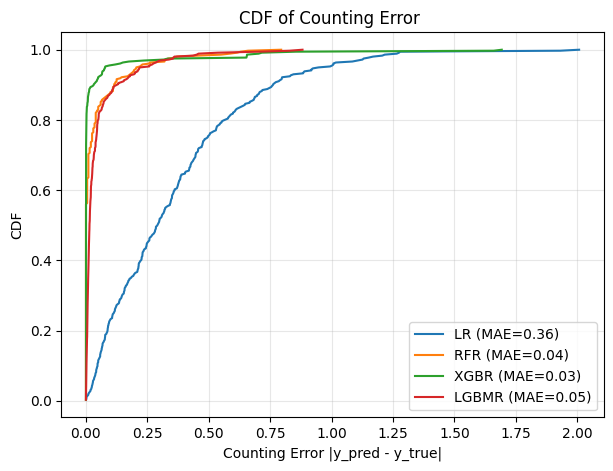

In [199]:
plot_cdf_models(expanded_features_lltf, target_col="target")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.300166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 877530
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 3444
[LightGBM] [Info] Start training from score 1.539551
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

MAE    RMSE    Bias      R²    Acc@0   Acc@±1    Acc@±2
Model                                                            
LR     0.1988  0.2637  0.0032  0.9314   0.0000  99.7245  100.0000
RFR    0.0126  0.1136 -0.0050  0.9873  89.5317  99.7245   99.7245
XGBR   0.0300  0.2145 -0.0052  0.9546   0.0000  99.1736   99.7245
LGBMR  0.0138  0.1892 -0.0028  0.9647   0.0000  99.4490   99.7245

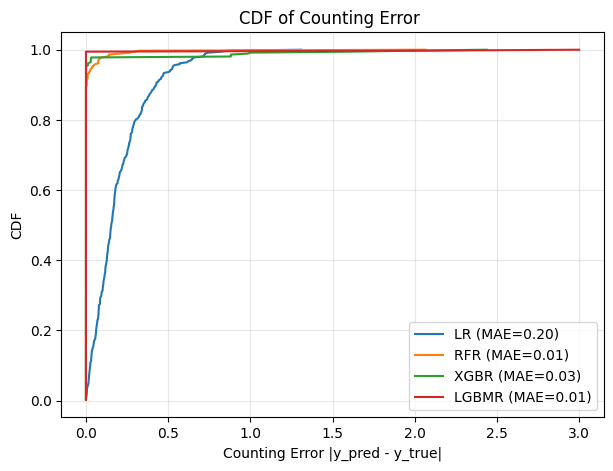

In [181]:
plot_cdf_models(expanded_features_htltf, target_col="target")


In [182]:
# ===========================================================
# Funzione per calcolare CDF per un dataset e un modello
# ===========================================================
def compute_cdf_for_dataset(dataset, model_name, target_col="target"):
    models = {
        "LR": LinearRegression(),
        "RFR": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBR": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
        "LGBMR": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Normalizzazione solo per Linear Regression
    if model_name == "LR":
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    model = models[model_name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    errors = np.abs(y_pred - y_test)
    mae = mean_absolute_error(y_test, y_pred)

    sorted_err = np.sort(errors)
    cdf = np.arange(1, len(errors) + 1) / len(errors)

    return sorted_err, cdf, mae


# ===========================================================
# Funzione per plottare LLTF vs HT-LTF
# ===========================================================
def plot_cdf_comparison(dataset_lltf, dataset_htltf, model_name="RFR", target_col="target"):
    err_lltf, cdf_lltf, mae_lltf = compute_cdf_for_dataset(dataset_lltf, model_name, target_col)
    err_htltf, cdf_htltf, mae_htltf = compute_cdf_for_dataset(dataset_htltf, model_name, target_col)

    plt.figure(figsize=(7,5))
    plt.plot(err_lltf, cdf_lltf, color="tab:blue", linewidth=1.8,
             label=f"LLTF (MAE={mae_lltf:.2f})")
    plt.plot(err_htltf, cdf_htltf, color="tab:orange", linewidth=1.8,
             label=f"HT-LTF (MAE={mae_htltf:.2f})")

    plt.title(f"CDF of Counting Error ({model_name})")
    plt.xlabel("Counting Error |y_pred - y_true|")
    plt.ylabel("CDF")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

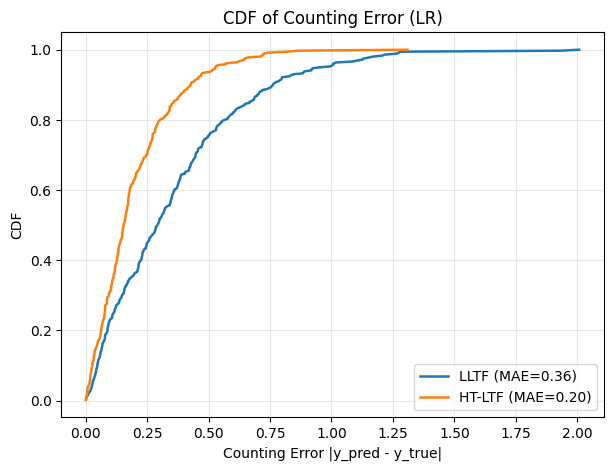

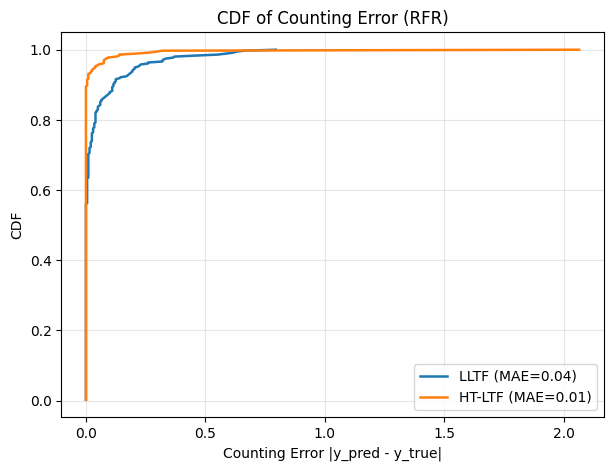

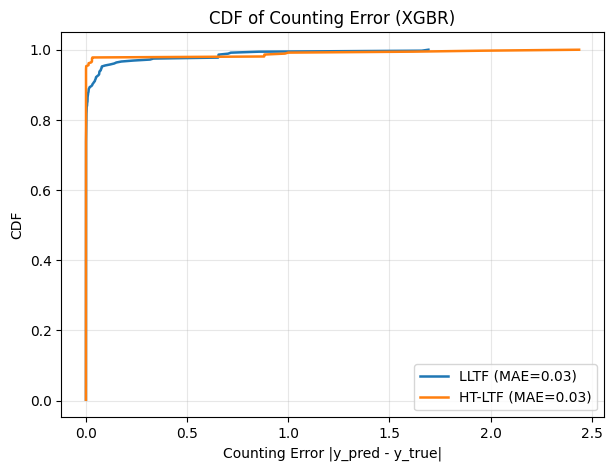

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420926
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 1652
[LightGBM] [Info] Start training from score 1.565426
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.217938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 877530
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 3444
[LightGBM] [Info] Start training from score 1.539551
[LightGBM] [

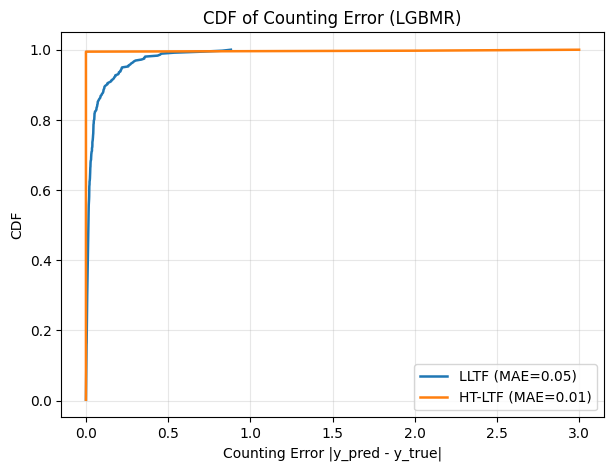

In [200]:
plot_cdf_comparison(expanded_features_lltf, expanded_features_htltf, model_name="LR")
plot_cdf_comparison(expanded_features_lltf, expanded_features_htltf, model_name="RFR")
plot_cdf_comparison(expanded_features_lltf, expanded_features_htltf, model_name="XGBR")
plot_cdf_comparison(expanded_features_lltf, expanded_features_htltf, model_name="LGBMR")


In [ ]:
def feature_group_importance(dataset, target_col="target"):
    """
    Valuta l'utilità di ciascun gruppo di feature (std, avg, iqr, adj, euc, ecc.)
    addestrando un modello separato per ogni gruppo.
    Restituisce un DataFrame con MAE per gruppo.
    """
    groups = {
        "STD": dataset.filter(like="std_"),
        "MIN": dataset.filter(like="min_"),
        "MAX": dataset.filter(like="max_"),
        "AVG": dataset.filter(like="avg_"),
        "QTL": dataset.filter(like="qtl_"),
        "QTU": dataset.filter(like="qtu_"),
        "IQR": dataset.filter(like="iqr_"),
        "ADJ": dataset.filter(like="adj_"),
        "EUC": dataset[["euc"]] if "euc" in dataset.columns else None
    }

    y = dataset[target_col]
    results = {}

    for name, X in groups.items():
        if X is None or X.empty:
            continue

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model = RandomForestRegressor(n_estimators=200, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)

        results[name] = mae

    results_df = pd.DataFrame.from_dict(results, orient="index", columns=["MAE"]).sort_values(by="MAE")
    return results_df


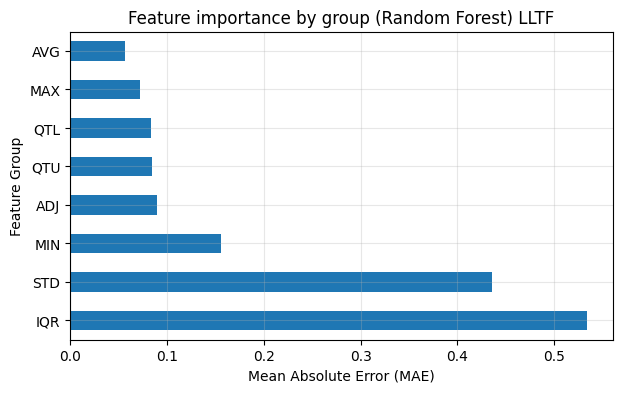

In [ ]:
results_lltf = feature_group_importance(expanded_features_lltf, target_col="target")
results_lltf.plot(kind="barh", figsize=(7,4), legend=False, color="tab:blue")
plt.gca().invert_yaxis()
plt.title("Feature importance by group (Random Forest) LLTF")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Feature Group")
plt.grid(True, alpha=0.3)
plt.show()


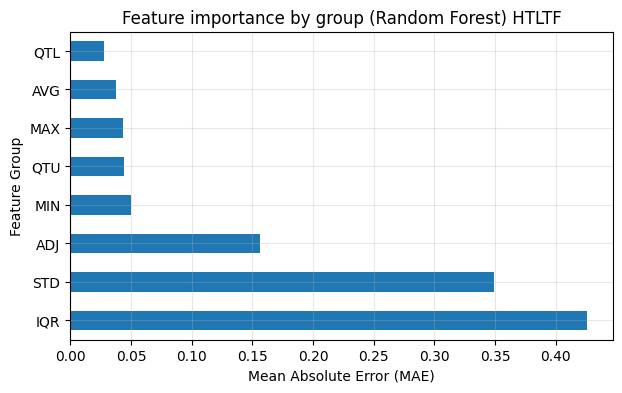

In [ ]:
results_htltf = feature_group_importance(expanded_features_htltf, target_col="target")
results_htltf.plot(kind="barh", figsize=(7,4), legend=False, color="tab:blue")
plt.gca().invert_yaxis()
plt.title("Feature importance by group (Random Forest) HTLTF")
plt.xlabel("Mean Absolute Error (MAE)")
plt.ylabel("Feature Group")
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# =======================================================
# Funzione: calcola feature importance per più modelli
# =======================================================
def compute_feature_importances(dataset, target_col="target", top_n=15):
    """
    Calcola e confronta l'importanza delle feature per RandomForest, XGBoost e LightGBM.
    Restituisce i 15 attributi più importanti mediati tra i modelli.
    """
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    # Suddivisione train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
        "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    importances = {}
    feature_names = X.columns

    for name, model in models.items():
        model.fit(X_train, y_train)

        if name == "XGBoost":
            imp = model.feature_importances_ / np.sum(model.feature_importances_)
        elif name == "LightGBM":
            imp = model.feature_importances_ / np.sum(model.feature_importances_)
        else:
            imp = model.feature_importances_ / np.sum(model.feature_importances_)

        importances[name] = imp

    # Costruiamo DataFrame con le importanze
    imp_df = pd.DataFrame(importances, index=feature_names)
    imp_df["mean_importance"] = imp_df.mean(axis=1)

    # Selezioniamo le feature più importanti
    top_features = imp_df.sort_values("mean_importance", ascending=False).head(top_n)
    return top_features


# =======================================================
# Funzione: visualizza graficamente
# =======================================================
def plot_feature_importances(top_features):
    plt.figure(figsize=(9, 5))
    top_features[["RandomForest", "XGBoost", "LightGBM"]].plot(kind="barh", figsize=(10, 6))
    plt.gca().invert_yaxis()
    plt.title("Feature Importance Comparison (RandomForest / XGBoost / LightGBM)")
    plt.xlabel("Normalized Importance")
    plt.ylabel("Feature")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.120273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 421116
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 1652
[LightGBM] [Info] Start training from score 2.608643
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


<Figure size 900x500 with 0 Axes>

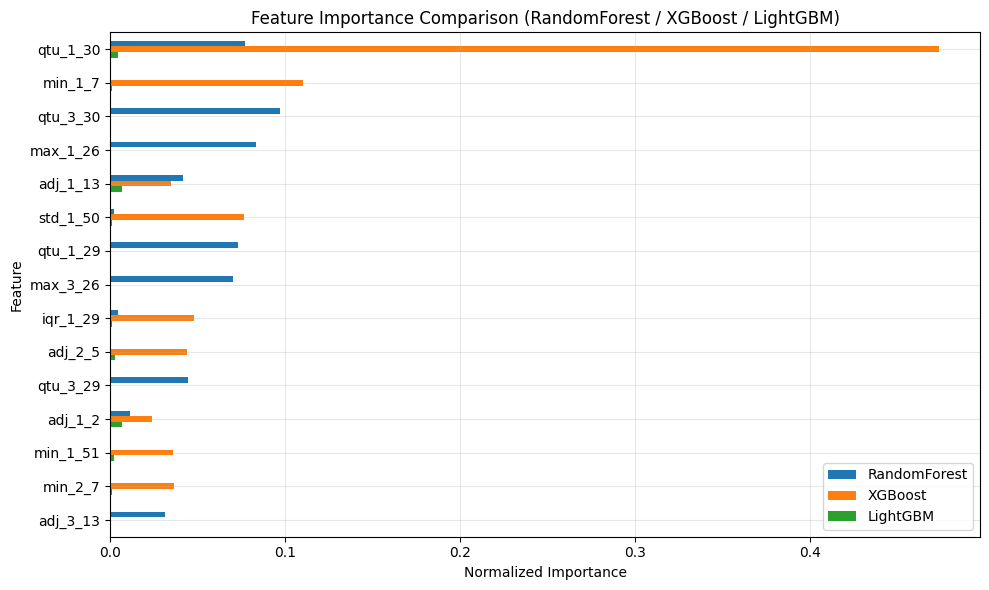

In [ ]:
top_features_lltf = compute_feature_importances(expanded_features_lltf, target_col="target", top_n=15)
plot_feature_importances(top_features_lltf)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.187247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 877888
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 3444
[LightGBM] [Info] Start training from score 2.569067
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

<Figure size 900x500 with 0 Axes>

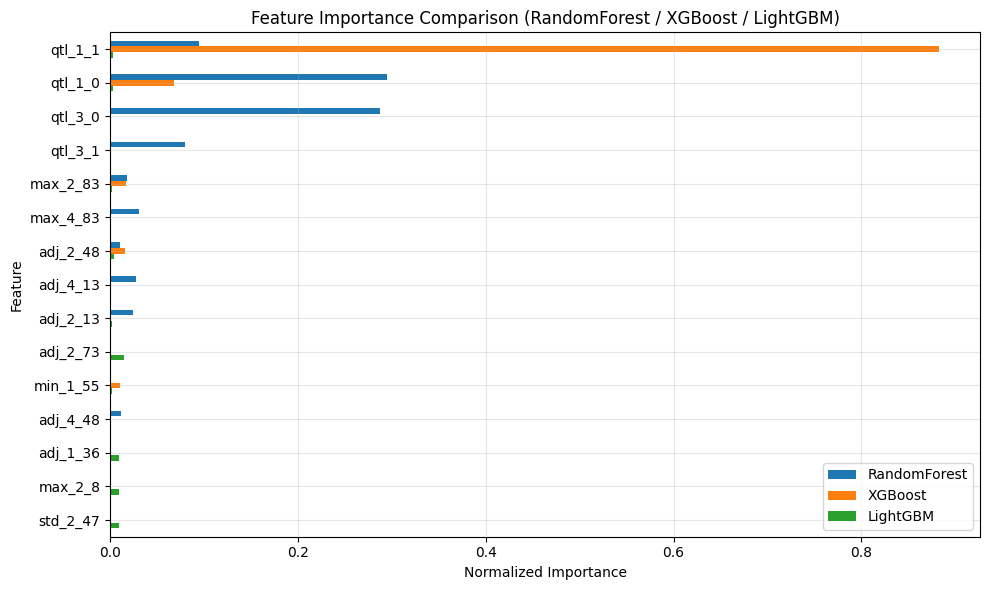

In [ ]:
top_features_htltf = compute_feature_importances(expanded_features_htltf, target_col="target", top_n=15)
plot_feature_importances(top_features_htltf)


# Classificazione

In [184]:
# ================================================================
# Funzione: addestra i modelli di classificazione del paper
# ================================================================
def train_classifiers(dataset, target_col="target"):
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        "SVM (RBF)": SVC(kernel="rbf", C=10, gamma="scale"),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
        "GBDT": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc

        print(f"\n=== {name} ===")
        print(classification_report(y_test, y_pred, digits=3))

        # Confusion matrix
        plt.figure(figsize=(5,4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", cmap="Blues")
        plt.title(f"Confusion Matrix - {name}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

    # Tabella riassuntiva accuracies
    results_df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"]).sort_values("Accuracy", ascending=False)
    print("\n📊 Summary of accuracies:")
    print(results_df)
    return results_df


==== LLTF CLASSIFICATION ====

=== SVM (RBF) ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        60
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     1.000     1.000        73

    accuracy                          1.000       357
   macro avg      1.000     1.000     1.000       357
weighted avg      1.000     1.000     1.000       357



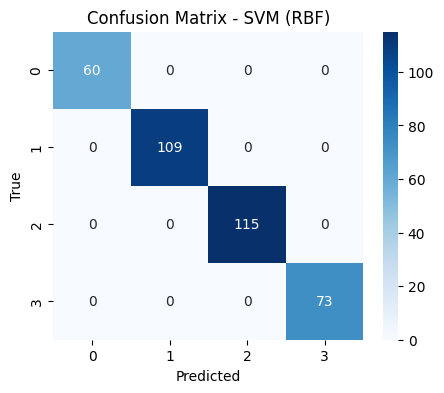


=== KNN ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        60
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     1.000     1.000        73

    accuracy                          1.000       357
   macro avg      1.000     1.000     1.000       357
weighted avg      1.000     1.000     1.000       357



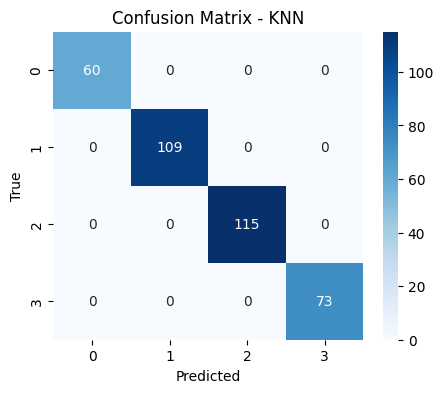


=== RandomForest ===
              precision    recall  f1-score   support

           0      0.984     1.000     0.992        60
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     0.986     0.993        73

    accuracy                          0.997       357
   macro avg      0.996     0.997     0.996       357
weighted avg      0.997     0.997     0.997       357



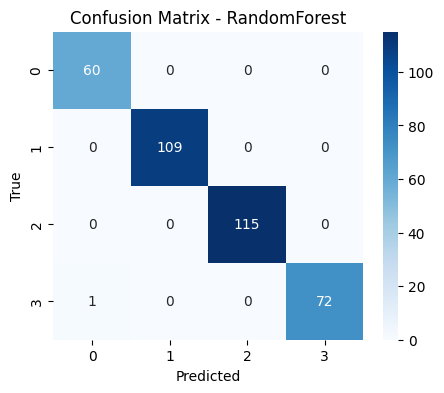

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:50:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        60
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     1.000     1.000        73

    accuracy                          1.000       357
   macro avg      1.000     1.000     1.000       357
weighted avg      1.000     1.000     1.000       357



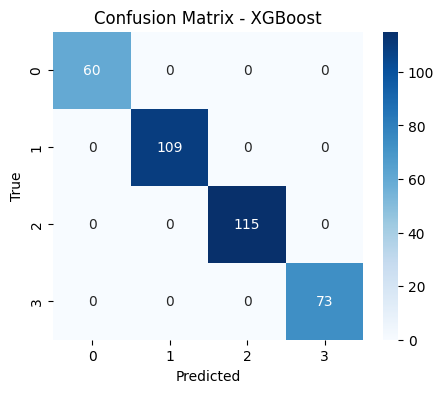

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 421084
[LightGBM] [Info] Number of data points in the train set: 833, number of used features: 1652
[LightGBM] [Info] Start training from score -1.790560
[LightGBM] [Info] Start training from score -1.187699
[LightGBM] [Info] Start training from score -1.126612
[LightGBM] [Info] Start training from score -1.589235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


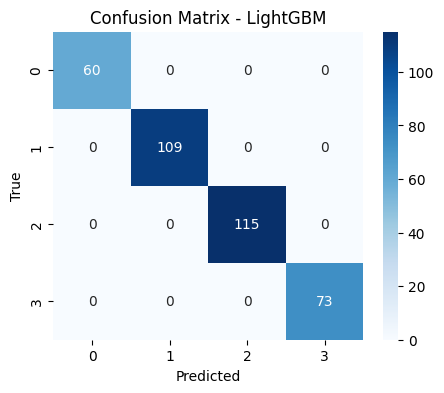

KeyboardInterrupt: 

In [197]:
print("==== LLTF CLASSIFICATION ====")
acc_lltf = train_classifiers(expanded_features_lltf)


==== HT-LTF CLASSIFICATION ====

=== SVM (RBF) ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     1.000     1.000        73

    accuracy                          1.000       363
   macro avg      1.000     1.000     1.000       363
weighted avg      1.000     1.000     1.000       363



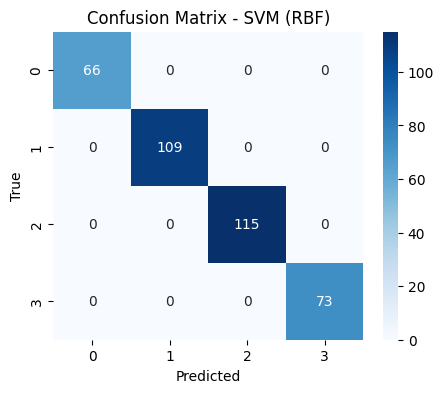


=== KNN ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000       109
           2      0.991     1.000     0.996       115
           3      1.000     0.986     0.993        73

    accuracy                          0.997       363
   macro avg      0.998     0.997     0.997       363
weighted avg      0.997     0.997     0.997       363



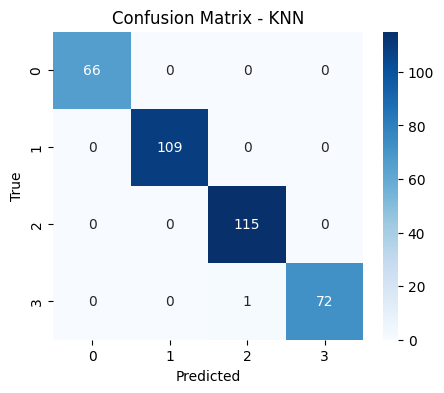


=== RandomForest ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     1.000     1.000        73

    accuracy                          1.000       363
   macro avg      1.000     1.000     1.000       363
weighted avg      1.000     1.000     1.000       363



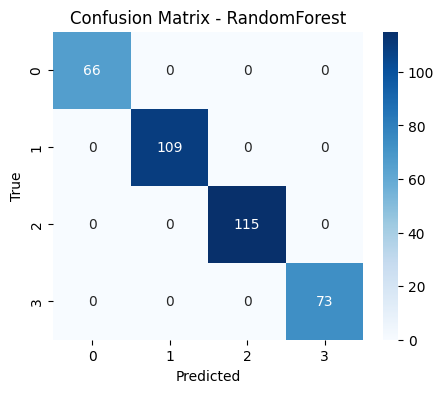

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [11:20:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     1.000     1.000        73

    accuracy                          1.000       363
   macro avg      1.000     1.000     1.000       363
weighted avg      1.000     1.000     1.000       363



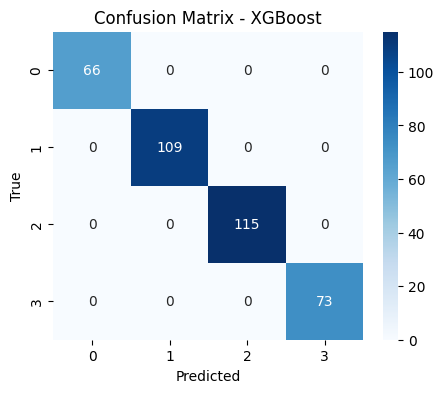

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.191200 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 877850
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 3444
[LightGBM] [Info] Start training from score -1.711263
[LightGBM] [Info] Start training from score -1.204366
[LightGBM] [Info] Start training from score -1.143279
[LightGBM] [Info] Start training from score -1.605902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

c:\Users\mariu\Desktop\Borsa\Tesi\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== LightGBM ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     1.000     1.000        73

    accuracy                          1.000       363
   macro avg      1.000     1.000     1.000       363
weighted avg      1.000     1.000     1.000       363



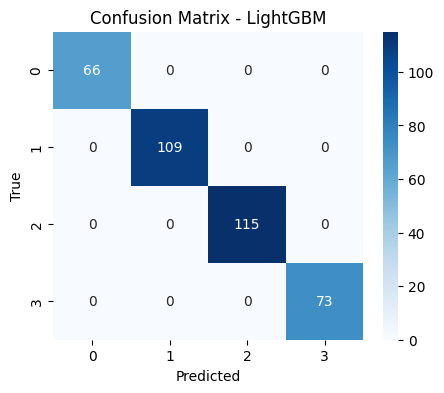


=== GBDT ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        66
           1      1.000     1.000     1.000       109
           2      1.000     1.000     1.000       115
           3      1.000     1.000     1.000        73

    accuracy                          1.000       363
   macro avg      1.000     1.000     1.000       363
weighted avg      1.000     1.000     1.000       363



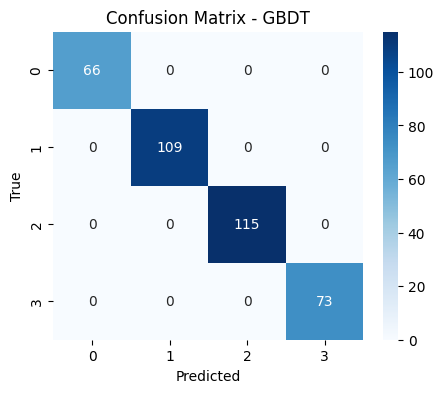


📊 Summary of accuracies:
          Model  Accuracy
0     SVM (RBF)  1.000000
2  RandomForest  1.000000
4      LightGBM  1.000000
3       XGBoost  1.000000
5          GBDT  1.000000
1           KNN  0.997245


In [ ]:
print("\n==== HT-LTF CLASSIFICATION ====")
acc_htltf = train_classifiers(expanded_features_htltf)


# k-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline

In [ ]:
# ===============================================================
# Funzione: esegue k-Fold CV 
# ===============================================================
def kfold_cross_validation(dataset, target_col="target", n_splits=5):
    """
    Esegue k-Fold Cross Validation per LR, RFR, XGBR e LGBMR.
    Restituisce media e std del MAE per ogni modello.
    """
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    # Definizione modelli
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42, n_jobs=-1),
        "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
    results = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("regressor", model)
        ])
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        scores = cross_val_score(pipeline, X, y, cv=kf, scoring=mae_scorer, n_jobs=-1)
        mae_mean = -scores.mean()
        mae_std = scores.std()
        results[name] = (mae_mean, mae_std)
        print(f"{name:20s} → MAE medio = {mae_mean:.4f} ± {mae_std:.4f}")

    results_df = pd.DataFrame(results, index=["MAE_mean", "MAE_std"]).T
    return results_df

In [ ]:
print("===== K-FOLD CROSS-VALIDATION: LLTF =====")
cv_results_lltf = kfold_cross_validation(expanded_features_lltf, target_col="target", n_splits=5)

print("\n===== K-FOLD CROSS-VALIDATION: HT-LTF =====")
cv_results_htltf = kfold_cross_validation(expanded_features_htltf, target_col="target", n_splits=5)


===== K-FOLD CROSS-VALIDATION: LLTF =====
Linear Regression    → MAE medio = 0.4598 ± 0.0271
Random Forest        → MAE medio = 0.0612 ± 0.0145
XGBoost              → MAE medio = 0.0727 ± 0.0260
LightGBM             → MAE medio = 0.0774 ± 0.0143

===== K-FOLD CROSS-VALIDATION: HT-LTF =====
Linear Regression    → MAE medio = 0.3971 ± 0.0136
Random Forest        → MAE medio = 0.0196 ± 0.0075
XGBoost              → MAE medio = 0.0279 ± 0.0175
LightGBM             → MAE medio = 0.0351 ± 0.0144


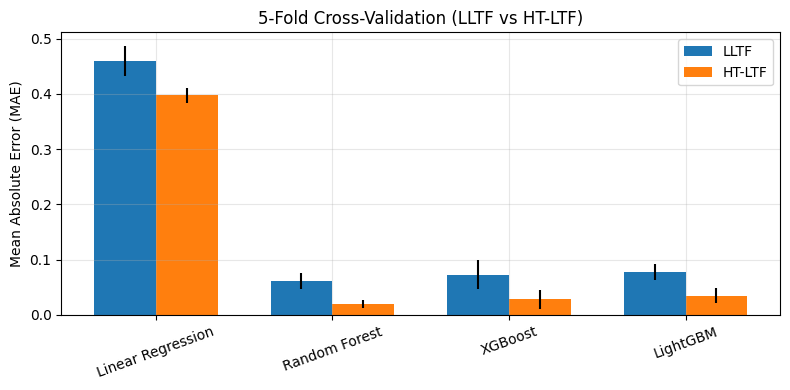

In [ ]:
plt.figure(figsize=(8,4))
x = np.arange(len(cv_results_lltf.index))
width = 0.35

plt.bar(x - width/2, cv_results_lltf["MAE_mean"], width, yerr=cv_results_lltf["MAE_std"], label="LLTF")
plt.bar(x + width/2, cv_results_htltf["MAE_mean"], width, yerr=cv_results_htltf["MAE_std"], label="HT-LTF")

plt.xticks(x, cv_results_lltf.index, rotation=20)
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("5-Fold Cross-Validation (LLTF vs HT-LTF)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# =======================================================
# Funzione per k-Fold CV dei modelli di classificazione
# =======================================================
def kfold_classification_cv(dataset, target_col="target", n_splits=5):
    """
    Esegue k-Fold Cross Validation per i modelli di classificazione.
    Ritorna accuracy media e deviazione standard per ogni modello.
    """
    X = dataset.drop(columns=[target_col])
    y = dataset[target_col]

    models = {
        "SVM (RBF)": SVC(kernel="rbf", C=10, gamma="scale"),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
        "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric="mlogloss"),
        "LightGBM": LGBMClassifier(n_estimators=200, learning_rate=0.1, random_state=42),
        "GBDT": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
    }

    accuracy_scorer = make_scorer(accuracy_score)
    results = {}

    for name, model in models.items():
        pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("classifier", model)
        ])
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        scores = cross_val_score(pipeline, X, y, cv=kf, scoring=accuracy_scorer, n_jobs=-1)
        acc_mean = scores.mean()
        acc_std = scores.std()
        results[name] = (acc_mean, acc_std)
        print(f"{name:20s} → Accuracy media = {acc_mean:.4f} ± {acc_std:.4f}")

    results_df = pd.DataFrame(results, index=["Accuracy_mean", "Accuracy_std"]).T
    return results_df

In [ ]:
print("===== K-FOLD CLASSIFICATION: LLTF =====")
cv_class_lltf = kfold_classification_cv(expanded_features_lltf, target_col="target")

print("\n===== K-FOLD CLASSIFICATION: HT-LTF =====")
cv_class_htltf = kfold_classification_cv(expanded_features_htltf, target_col="target")

===== K-FOLD CLASSIFICATION: LLTF =====
SVM (RBF)            → Accuracy media = 0.9992 ± 0.0017
KNN                  → Accuracy media = 0.9983 ± 0.0021
Random Forest        → Accuracy media = 0.9983 ± 0.0021
XGBoost              → Accuracy media = 0.9958 ± 0.0046
LightGBM             → Accuracy media = 0.9992 ± 0.0017
GBDT                 → Accuracy media = 0.9958 ± 0.0065

===== K-FOLD CLASSIFICATION: HT-LTF =====
SVM (RBF)            → Accuracy media = 1.0000 ± 0.0000
KNN                  → Accuracy media = 1.0000 ± 0.0000
Random Forest        → Accuracy media = 1.0000 ± 0.0000
XGBoost              → Accuracy media = 0.9967 ± 0.0017
LightGBM             → Accuracy media = 0.9983 ± 0.0020
GBDT                 → Accuracy media = 0.9967 ± 0.0066


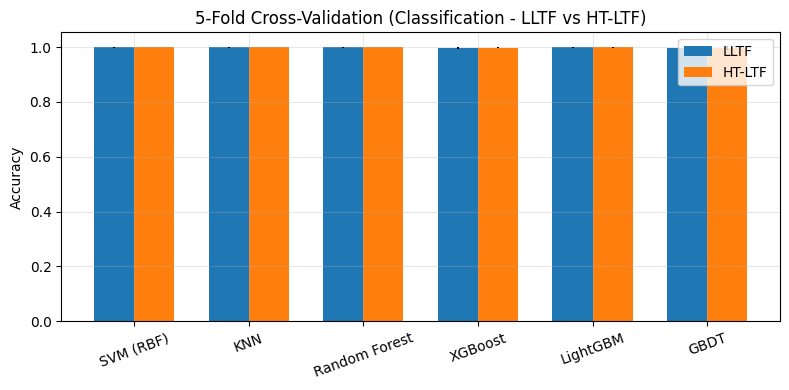

In [ ]:
plt.figure(figsize=(8,4))
x = np.arange(len(cv_class_lltf.index))
width = 0.35

plt.bar(x - width/2, cv_class_lltf["Accuracy_mean"], width, yerr=cv_class_lltf["Accuracy_std"], label="LLTF")
plt.bar(x + width/2, cv_class_htltf["Accuracy_mean"], width, yerr=cv_class_htltf["Accuracy_std"], label="HT-LTF")

plt.xticks(x, cv_class_lltf.index, rotation=20)
plt.ylabel("Accuracy")
plt.title("5-Fold Cross-Validation (Classification - LLTF vs HT-LTF)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
